# Partie 1 : Analyse exploratoire des données

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
df = pd.read_csv('football.csv')
df

,id,date,home_team,away_team,rank_change_home,rank_change_away,home_goals_mean,home_goals_mean_l5,home_goals_suf_mean,home_goals_suf_mean_l5,home_rank_mean,home_rank_mean_l5,home_points_mean,home_points_mean_l5,away_goals_mean,away_goals_mean_l5,away_goals_suf_mean,away_goals_suf_mean_l5,away_rank_mean,away_rank_mean_l5,away_points_mean,away_points_mean_l5,target,match_type
0,2221,2021-09-09,Brazil,Peru,-1.0,-5.0,2.028571,0.8,0.371429,0.4,33.057143,25.4,140.67,55.02,1.027778,1.4,1.583333,1.6,24.388889,21.2,8.16,31.28,0,Friendly
1,507,2019-05-29,Comoros,Mauritius,5.0,NaN,1.166667,1.2,1.666667,1.8,76.833333,82.8,19.00,11.00,1.200000,1.2,1.200000,1.2,159.800000,159.8,-6.00,-6.00,0,Friendly
2,1545,2020-11-18,Serbia,Russia,-1.0,NaN,1.608696,1.2,1.347826,1.2,54.130435,44.0,30.00,3.00,2.136364,0.8,1.045455,1.2,65.681818,62.0,70.00,-5.00,0,Friendly
3,2067,2021-09-01,Senegal,Togo,-1.0,NaN,1.482759,1.4,0.620690,0.8,97.551724,113.6,44.45,0.00,0.857143,0.8,1.214286,1.2,104.500000,82.0,-31.86,-22.86,0,Friendly
4,4448,2024-03-22,Peru,Nicaragua,-2.0,NaN,0.968750,0.2,1.265625,1.6,31.531250,34.8,-2.43,-28.63,1.600000,3.0,1.244444,0.2,132.200000,169.4,-21.30,23.59,0,Competition
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,2020,2021-07-12,Jamaica,Suriname,0.0,NaN,2.000000,1.0,1.090909,2.0,103.909091,71.0,32.65,-8.35,3.181818,3.4,NaN,1.0,154.636364,153.6,53.43,37.43,0,Friendly
3773,696,2019-06-28,Colombia,Chile,1.0,NaN,1.909091,2.0,0.545455,0.0,33.000000,39.4,17.00,7.00,1.545455,1.8,1.272727,0.8,39.090909,44.2,-9.00,-4.00,1,Friendly
3774,2325,2021-10-11,Mozambique,Cameroon,3.0,4.0,1.000000,0.6,1.153846,1.6,113.538462,103.2,-17.41,-2.96,1.086957,1.2,0.478261,0.2,88.260870,86.2,-11.54,-22.54,1,Friendly
3775,3301,2022-11-19,Colombia,Paraguay,0.0,NaN,1.319149,2.4,0.872340,0.6,31.957447,62.6,41.07,18.18,0.909091,0.8,1.272727,0.6,34.886364,31.2,-28.23,5.47,0,Competition


In [63]:
df.dtypes


id                          int64
date                       object
home_team                  object
away_team                  object
rank_change_home          float64
rank_change_away          float64
home_goals_mean           float64
home_goals_mean_l5        float64
home_goals_suf_mean       float64
home_goals_suf_mean_l5    float64
home_rank_mean            float64
home_rank_mean_l5         float64
home_points_mean          float64
home_points_mean_l5       float64
away_goals_mean           float64
away_goals_mean_l5        float64
away_goals_suf_mean       float64
away_goals_suf_mean_l5    float64
away_rank_mean            float64
away_rank_mean_l5         float64
away_points_mean          float64
away_points_mean_l5       float64
target                      int64
match_type                 object
dtype: object

In [64]:
# # correlation id vs target 
# sns.heatmap(df[['id', 'target']].corr(), annot=True, cmap='coolwarm')
# plt.show()
# pas de correlation entre id et target

In [65]:

df = df.drop(columns = 'id')
df

,date,home_team,away_team,rank_change_home,rank_change_away,home_goals_mean,home_goals_mean_l5,home_goals_suf_mean,home_goals_suf_mean_l5,home_rank_mean,home_rank_mean_l5,home_points_mean,home_points_mean_l5,away_goals_mean,away_goals_mean_l5,away_goals_suf_mean,away_goals_suf_mean_l5,away_rank_mean,away_rank_mean_l5,away_points_mean,away_points_mean_l5,target,match_type
0,2021-09-09,Brazil,Peru,-1.0,-5.0,2.028571,0.8,0.371429,0.4,33.057143,25.4,140.67,55.02,1.027778,1.4,1.583333,1.6,24.388889,21.2,8.16,31.28,0,Friendly
1,2019-05-29,Comoros,Mauritius,5.0,NaN,1.166667,1.2,1.666667,1.8,76.833333,82.8,19.00,11.00,1.200000,1.2,1.200000,1.2,159.800000,159.8,-6.00,-6.00,0,Friendly
2,2020-11-18,Serbia,Russia,-1.0,NaN,1.608696,1.2,1.347826,1.2,54.130435,44.0,30.00,3.00,2.136364,0.8,1.045455,1.2,65.681818,62.0,70.00,-5.00,0,Friendly
3,2021-09-01,Senegal,Togo,-1.0,NaN,1.482759,1.4,0.620690,0.8,97.551724,113.6,44.45,0.00,0.857143,0.8,1.214286,1.2,104.500000,82.0,-31.86,-22.86,0,Friendly
4,2024-03-22,Peru,Nicaragua,-2.0,NaN,0.968750,0.2,1.265625,1.6,31.531250,34.8,-2.43,-28.63,1.600000,3.0,1.244444,0.2,132.200000,169.4,-21.30,23.59,0,Competition
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,2021-07-12,Jamaica,Suriname,0.0,NaN,2.000000,1.0,1.090909,2.0,103.909091,71.0,32.65,-8.35,3.181818,3.4,NaN,1.0,154.636364,153.6,53.43,37.43,0,Friendly
3773,2019-06-28,Colombia,Chile,1.0,NaN,1.909091,2.0,0.545455,0.0,33.000000,39.4,17.00,7.00,1.545455,1.8,1.272727,0.8,39.090909,44.2,-9.00,-4.00,1,Friendly
3774,2021-10-11,Mozambique,Cameroon,3.0,4.0,1.000000,0.6,1.153846,1.6,113.538462,103.2,-17.41,-2.96,1.086957,1.2,0.478261,0.2,88.260870,86.2,-11.54,-22.54,1,Friendly
3775,2022-11-19,Colombia,Paraguay,0.0,NaN,1.319149,2.4,0.872340,0.6,31.957447,62.6,41.07,18.18,0.909091,0.8,1.272727,0.6,34.886364,31.2,-28.23,5.47,0,Competition


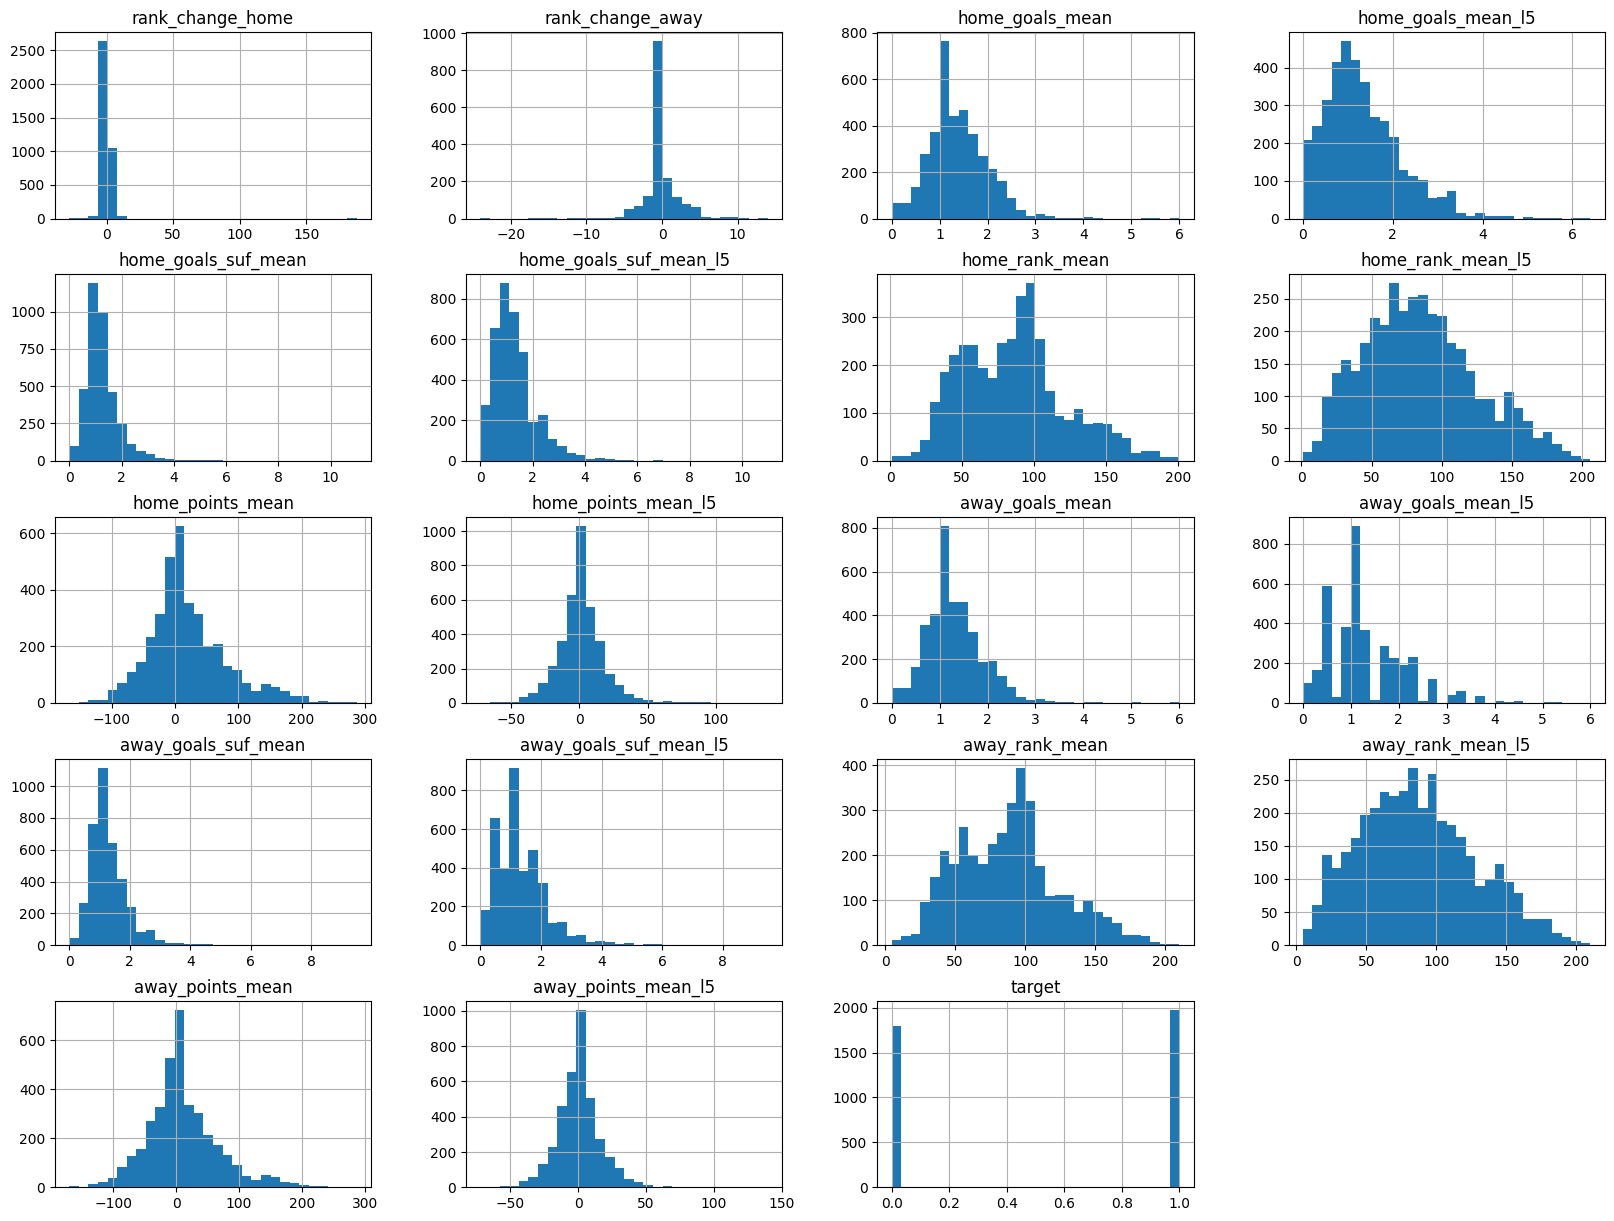

In [66]:
# Visualiation de la distribution des donnees numeriques
df.hist(bins=30, figsize=(20, 15))
plt.show()


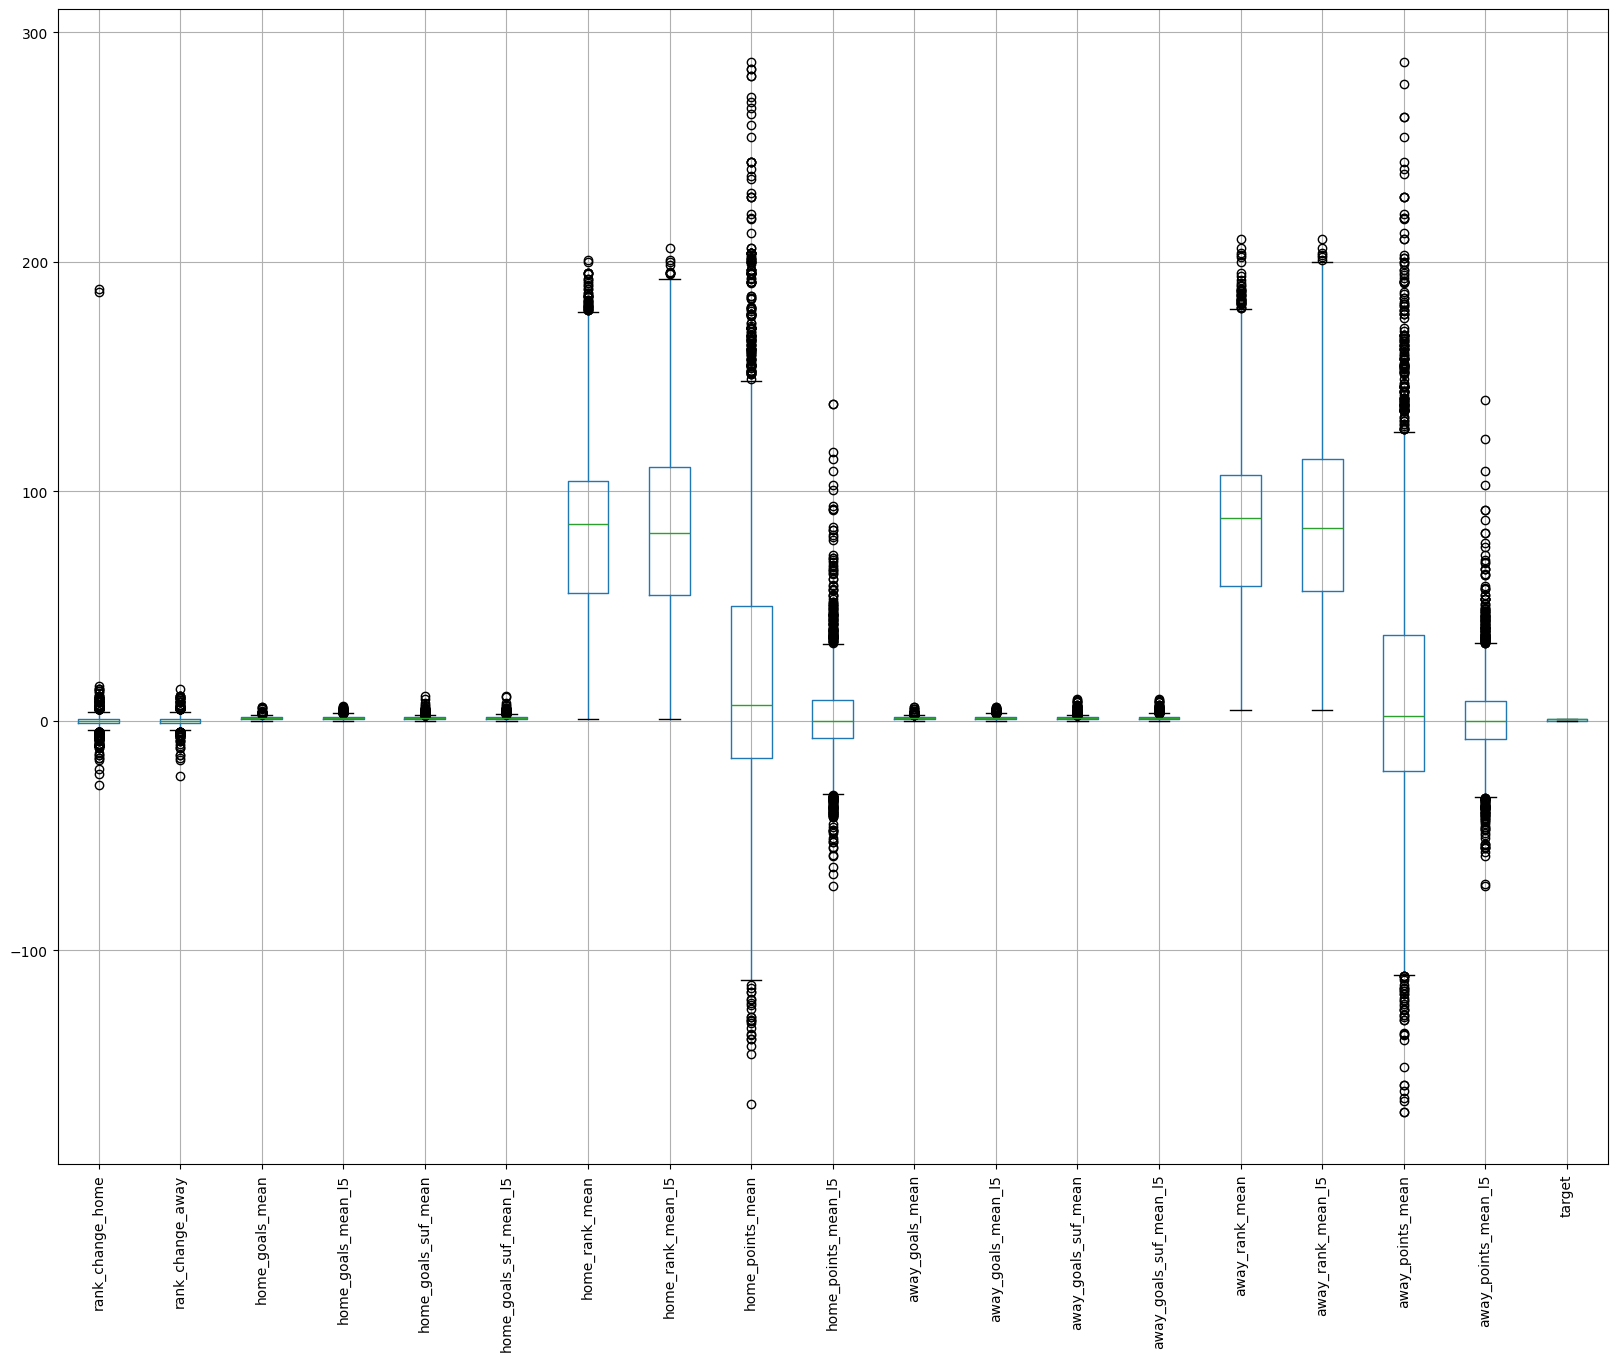

In [67]:
#Visualisation de la dispersion des donnees numeriques avec des boites a moustaches
plt.figure(figsize=(20, 15))
df.boxplot()
plt.xticks(rotation=90)
plt.show()
# On remarque une forte presence de valeurs aberrantes dans les donnees 

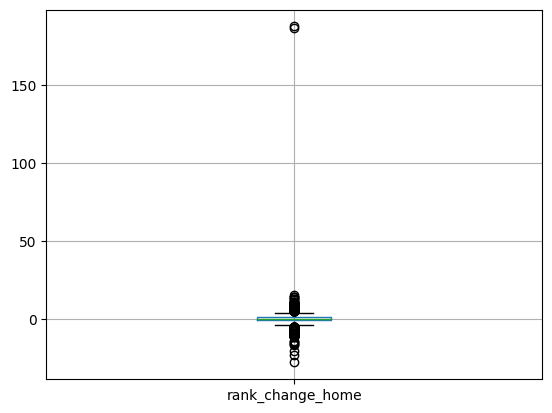

In [68]:
df[['rank_change_home']].boxplot()
plt.show()
# imputer les valeurs aberrantes

<Axes: >

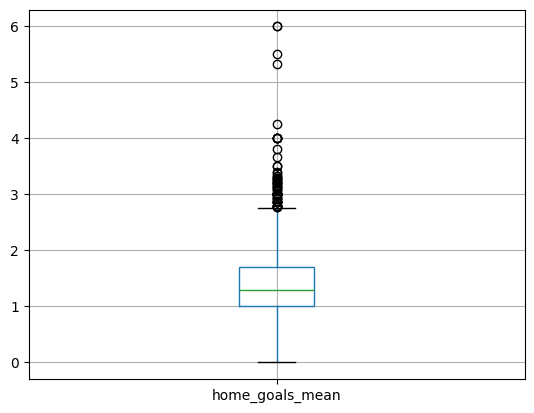

In [69]:
df[['home_goals_mean']].boxplot()
# On remarque une forte presence de valeurs aberrantes , une imputation partielle est donc necessaire

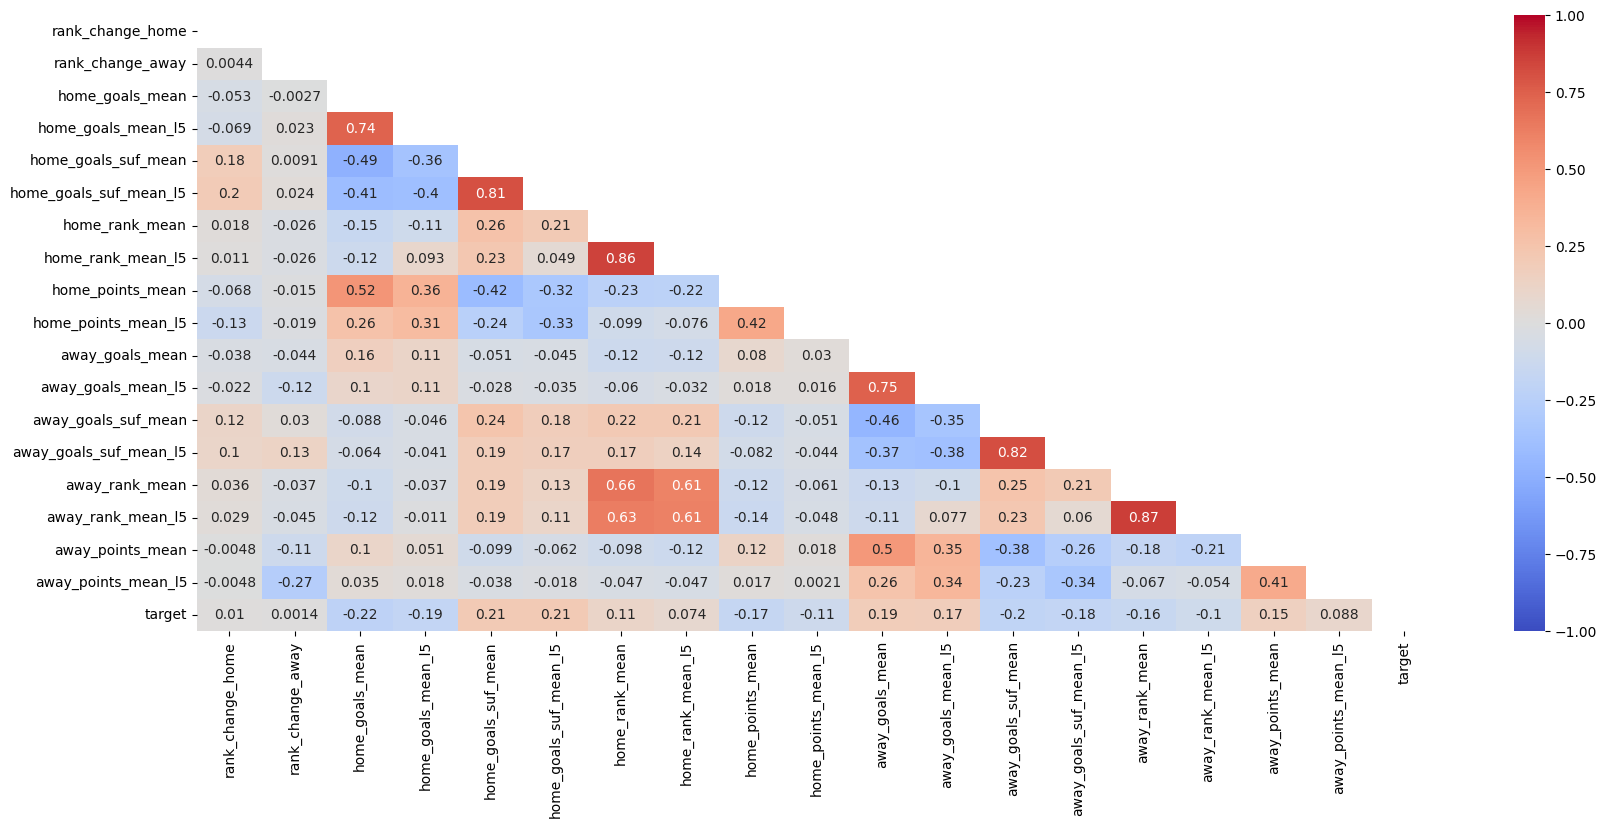

In [70]:
# Matrice de corrélation
plt.figure(figsize=(20, 8))
matrice = df[['rank_change_home', 'rank_change_away', 'home_goals_mean','home_goals_mean_l5','home_goals_suf_mean',
              'home_goals_suf_mean_l5','home_rank_mean','home_rank_mean_l5','home_points_mean',
              'home_points_mean_l5','away_goals_mean','away_goals_mean_l5','away_goals_suf_mean',
              'away_goals_suf_mean_l5','away_rank_mean','away_rank_mean_l5','away_points_mean','away_points_mean_l5', 'target']].corr()
sns.heatmap(matrice, vmin=-1, vmax=1, annot=True, cmap='coolwarm', mask=np.triu(matrice))
plt.show()

In [71]:
# On peut observer differentes tendances sur nos donnees notamment:
# - Une correlation positive tres elevee entre les variables home_goals_mean et home_goals_mean_l5
# - Une correlation positive entre les variables away_rank_mean et away_rank_mean_l5
# - Une correlation negative entre les variables away_rank_mean et away_points_mean

In [72]:
df.describe()

,rank_change_home,rank_change_away,home_goals_mean,home_goals_mean_l5,home_goals_suf_mean,home_goals_suf_mean_l5,home_rank_mean,home_rank_mean_l5,home_points_mean,home_points_mean_l5,away_goals_mean,away_goals_mean_l5,away_goals_suf_mean,away_goals_suf_mean_l5,away_rank_mean,away_rank_mean_l5,away_points_mean,away_points_mean_l5,target
count,3777.000000,1735.000000,3777.000000,3777.000000,3753.000000,3777.000000,3777.000000,3777.000000,3763.000000,3777.000000,3777.000000,3777.000000,3760.000000,3777.000000,3777.000000,3777.000000,3777.000000,3777.000000,3777.000000
mean,0.079958,0.042651,1.363972,1.356985,1.250658,1.290778,85.690572,84.750613,20.283917,1.424337,1.305654,1.303954,1.320218,1.343800,88.096724,87.014606,10.293439,0.740582,0.523167
std,4.990718,2.428546,0.605170,0.834692,0.683486,0.867303,36.061328,40.272798,62.542519,17.099149,0.601565,0.818420,0.737387,0.907621,36.338822,40.854255,57.171734,16.789257,0.499529
min,-28.000000,-24.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-166.940000,-72.040000,0.000000,0.000000,0.000000,0.000000,4.750000,4.750000,-170.340000,-72.040000,0.000000
25%,-1.000000,-1.000000,1.000000,0.800000,0.857143,0.800000,55.818182,54.800000,-16.000000,-7.400000,0.923077,0.800000,0.910308,0.800000,58.964286,56.600000,-21.890000,-8.120000,0.000000
50%,0.000000,0.000000,1.285714,1.200000,1.125000,1.200000,85.842105,81.800000,7.000000,0.000000,1.212121,1.200000,1.181818,1.200000,88.583333,84.000000,2.000000,0.000000,1.000000
75%,1.000000,1.000000,1.704545,1.800000,1.500000,1.600000,104.707317,110.600000,49.960000,9.130000,1.625000,1.800000,1.576923,1.800000,107.333333,114.200000,37.570000,8.710000,1.000000
max,188.000000,14.000000,6.000000,6.400000,11.000000,11.000000,201.000000,206.200000,287.290000,138.000000,6.000000,6.000000,9.500000,9.500000,210.000000,210.000000,287.290000,140.000000,1.000000


In [73]:
df.isnull().sum()
# rank_change_away a un nombre anormalement eleve de valeurs manquantes 

date                         0
home_team                    0
away_team                    0
rank_change_home             0
rank_change_away          2042
home_goals_mean              0
home_goals_mean_l5           0
home_goals_suf_mean         24
home_goals_suf_mean_l5       0
home_rank_mean               0
home_rank_mean_l5            0
home_points_mean            14
home_points_mean_l5          0
away_goals_mean              0
away_goals_mean_l5           0
away_goals_suf_mean         17
away_goals_suf_mean_l5       0
away_rank_mean               0
away_rank_mean_l5            0
away_points_mean             0
away_points_mean_l5          0
target                       0
match_type                   0
dtype: int64

# Partie 2 : Prétraitement

1. Valeurs manquantes (imputation, suppression, etc.)

In [74]:
df

,date,home_team,away_team,rank_change_home,rank_change_away,home_goals_mean,home_goals_mean_l5,home_goals_suf_mean,home_goals_suf_mean_l5,home_rank_mean,home_rank_mean_l5,home_points_mean,home_points_mean_l5,away_goals_mean,away_goals_mean_l5,away_goals_suf_mean,away_goals_suf_mean_l5,away_rank_mean,away_rank_mean_l5,away_points_mean,away_points_mean_l5,target,match_type
0,2021-09-09,Brazil,Peru,-1.0,-5.0,2.028571,0.8,0.371429,0.4,33.057143,25.4,140.67,55.02,1.027778,1.4,1.583333,1.6,24.388889,21.2,8.16,31.28,0,Friendly
1,2019-05-29,Comoros,Mauritius,5.0,NaN,1.166667,1.2,1.666667,1.8,76.833333,82.8,19.00,11.00,1.200000,1.2,1.200000,1.2,159.800000,159.8,-6.00,-6.00,0,Friendly
2,2020-11-18,Serbia,Russia,-1.0,NaN,1.608696,1.2,1.347826,1.2,54.130435,44.0,30.00,3.00,2.136364,0.8,1.045455,1.2,65.681818,62.0,70.00,-5.00,0,Friendly
3,2021-09-01,Senegal,Togo,-1.0,NaN,1.482759,1.4,0.620690,0.8,97.551724,113.6,44.45,0.00,0.857143,0.8,1.214286,1.2,104.500000,82.0,-31.86,-22.86,0,Friendly
4,2024-03-22,Peru,Nicaragua,-2.0,NaN,0.968750,0.2,1.265625,1.6,31.531250,34.8,-2.43,-28.63,1.600000,3.0,1.244444,0.2,132.200000,169.4,-21.30,23.59,0,Competition
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,2021-07-12,Jamaica,Suriname,0.0,NaN,2.000000,1.0,1.090909,2.0,103.909091,71.0,32.65,-8.35,3.181818,3.4,NaN,1.0,154.636364,153.6,53.43,37.43,0,Friendly
3773,2019-06-28,Colombia,Chile,1.0,NaN,1.909091,2.0,0.545455,0.0,33.000000,39.4,17.00,7.00,1.545455,1.8,1.272727,0.8,39.090909,44.2,-9.00,-4.00,1,Friendly
3774,2021-10-11,Mozambique,Cameroon,3.0,4.0,1.000000,0.6,1.153846,1.6,113.538462,103.2,-17.41,-2.96,1.086957,1.2,0.478261,0.2,88.260870,86.2,-11.54,-22.54,1,Friendly
3775,2022-11-19,Colombia,Paraguay,0.0,NaN,1.319149,2.4,0.872340,0.6,31.957447,62.6,41.07,18.18,0.909091,0.8,1.272727,0.6,34.886364,31.2,-28.23,5.47,0,Competition


In [75]:
df['home_goals_suf_mean'].describe()
# df[['home_goals_suf_mean']].boxplot()
# Les valeurs aberrantes sont tres elevees , ce qui tire la moyenne vers le quartile superieur; La mediane est donc plus representative de la tendance centrale des donnees
df['home_goals_suf_mean'] = df['home_goals_suf_mean'].fillna(df['home_goals_suf_mean'].median())

In [76]:
df['rank_change_away'].describe()
# la distribution est plutot symetrique, on peut donc remplacer par la mediane ou la moyennne
df['rank_change_away'] = df['rank_change_away'].fillna(df['rank_change_away'].mean())


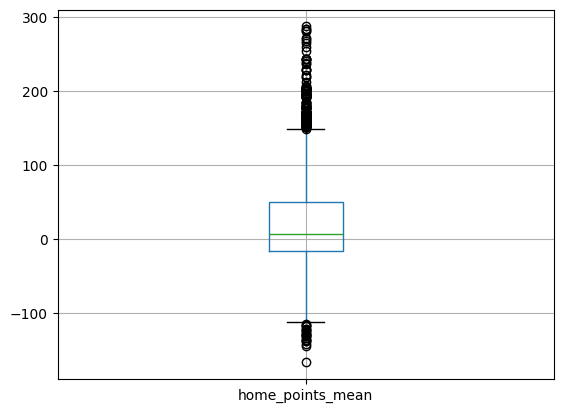

In [77]:
df[['home_points_mean']].boxplot()
df['home_points_mean'].describe()
# Les valeurs aberrantes sont tres elevees , ce qui tire la moyenne vers le quartile superieur; La mediane serait preferable 
df['home_points_mean'] = df['home_points_mean'].fillna(df['home_points_mean'].median())

In [78]:
df['away_goals_suf_mean'].describe()
# la distribution n est pas tres asymetrique, l imputation par la moyenne est donc possible
df['away_goals_suf_mean'] = df['away_goals_suf_mean'].fillna(df['away_goals_suf_mean'].mean())

In [79]:
df.isnull().sum()

date                      0
home_team                 0
away_team                 0
rank_change_home          0
rank_change_away          0
home_goals_mean           0
home_goals_mean_l5        0
home_goals_suf_mean       0
home_goals_suf_mean_l5    0
home_rank_mean            0
home_rank_mean_l5         0
home_points_mean          0
home_points_mean_l5       0
away_goals_mean           0
away_goals_mean_l5        0
away_goals_suf_mean       0
away_goals_suf_mean_l5    0
away_rank_mean            0
away_rank_mean_l5         0
away_points_mean          0
away_points_mean_l5       0
target                    0
match_type                0
dtype: int64

2. Valeurs aberrantes

In [80]:
df['away_points_mean'].describe()

count    3777.000000
mean       10.293439
std        57.171734
min      -170.340000
25%       -21.890000
50%         2.000000
75%        37.570000
max       287.290000
Name: away_points_mean, dtype: float64

Potential outliers in rank_change_home:
1         5.0
16        5.0
19       13.0
21       -9.0
39        7.0
        ...  
3736    -11.0
3741     -6.0
3751    187.0
3756     -5.0
3762      8.0
Name: rank_change_home, Length: 262, dtype: float64
(262, 23)


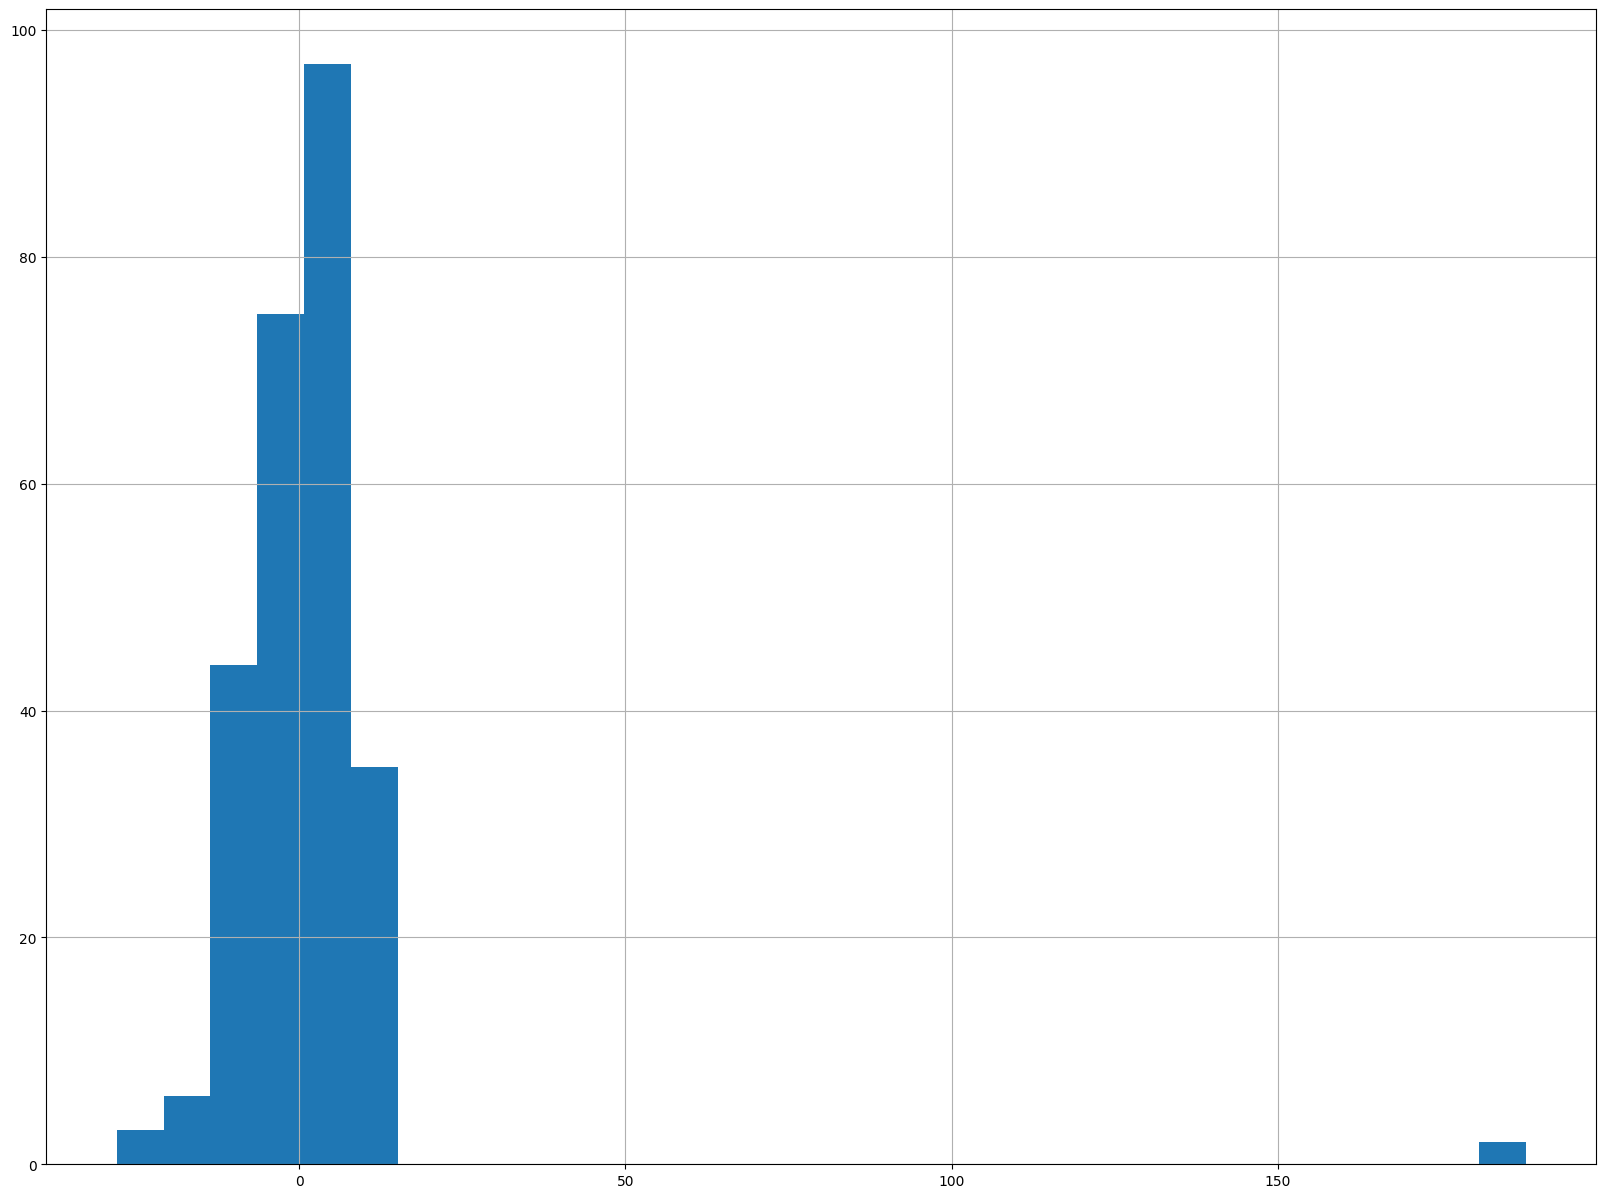

Potential outliers in rank_change_away:
0       -5.0
6        1.0
8       -2.0
14     -16.0
22      -1.0
        ... 
3758     1.0
3761    -1.0
3765    -1.0
3770    -7.0
3774     4.0
Name: rank_change_away, Length: 966, dtype: float64
(966, 23)


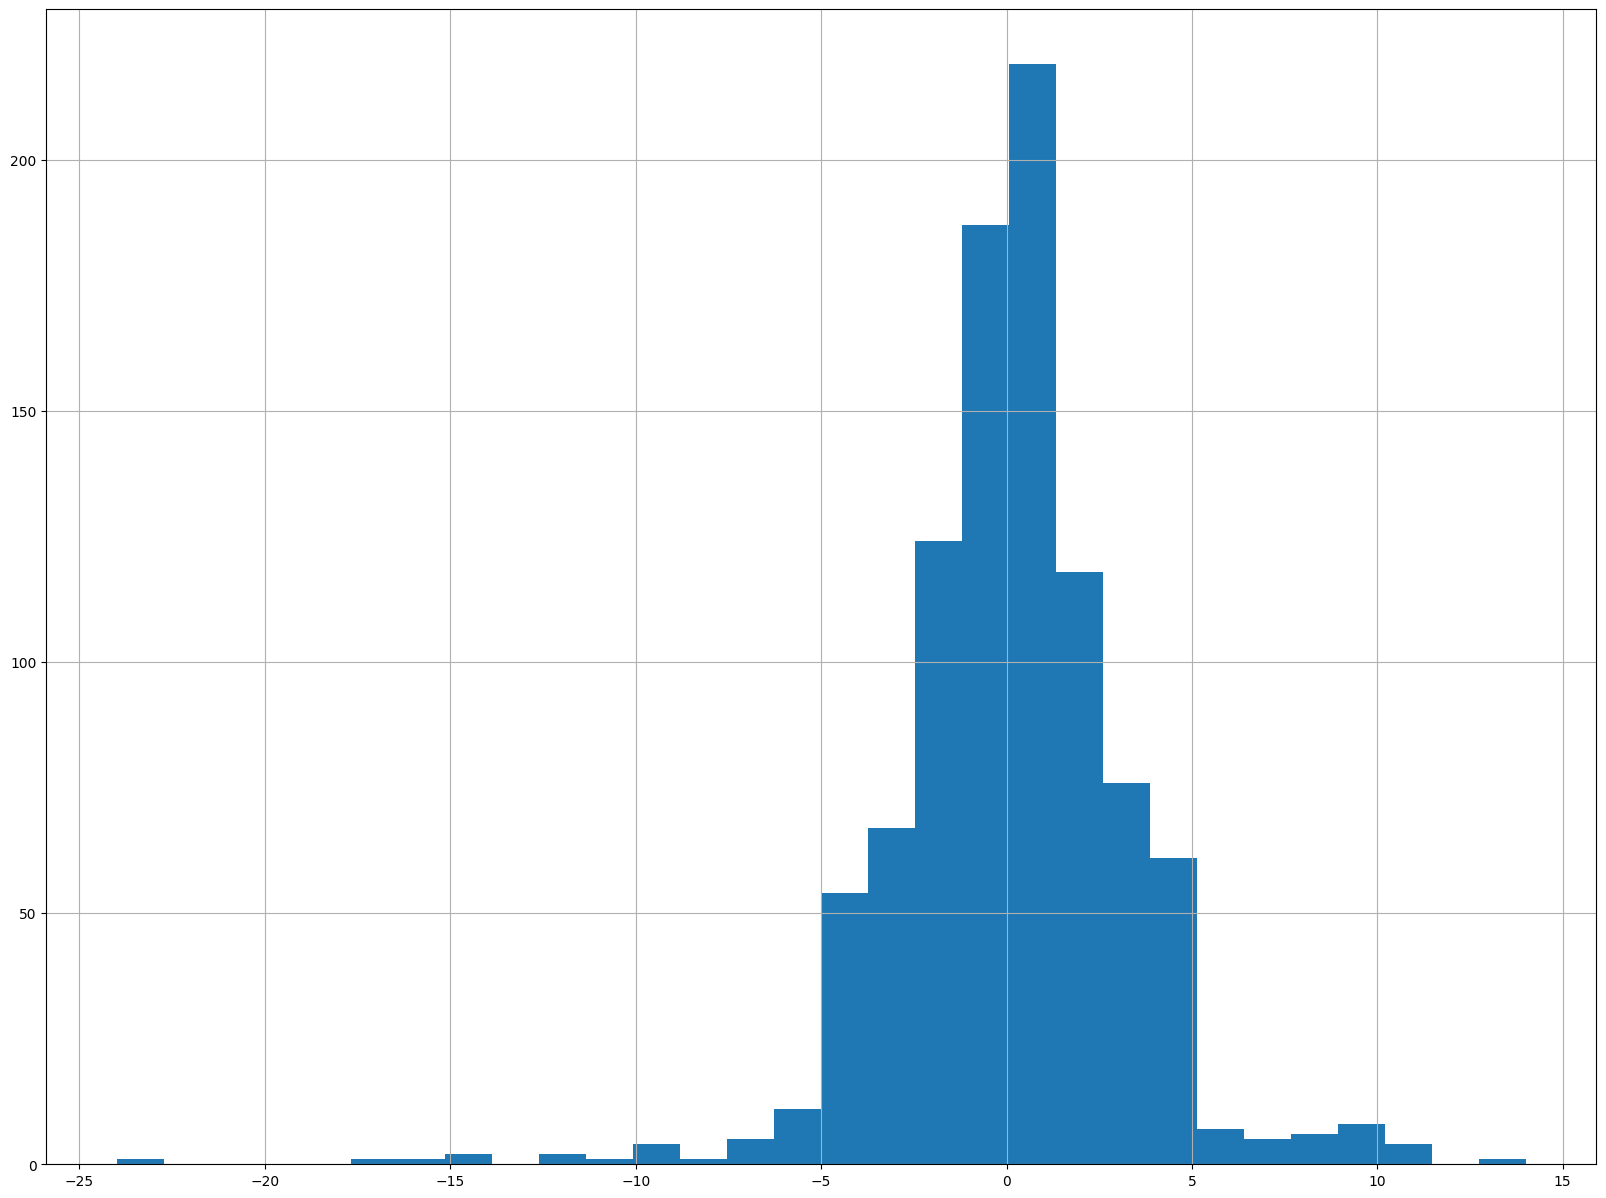

Potential outliers in home_goals_mean:
69      3.333333
114     2.857143
117     2.866667
162     4.000000
170     3.000000
          ...   
3619    3.142857
3646    2.941176
3665    3.000000
3705    4.000000
3730    3.000000
Name: home_goals_mean, Length: 64, dtype: float64
(64, 23)


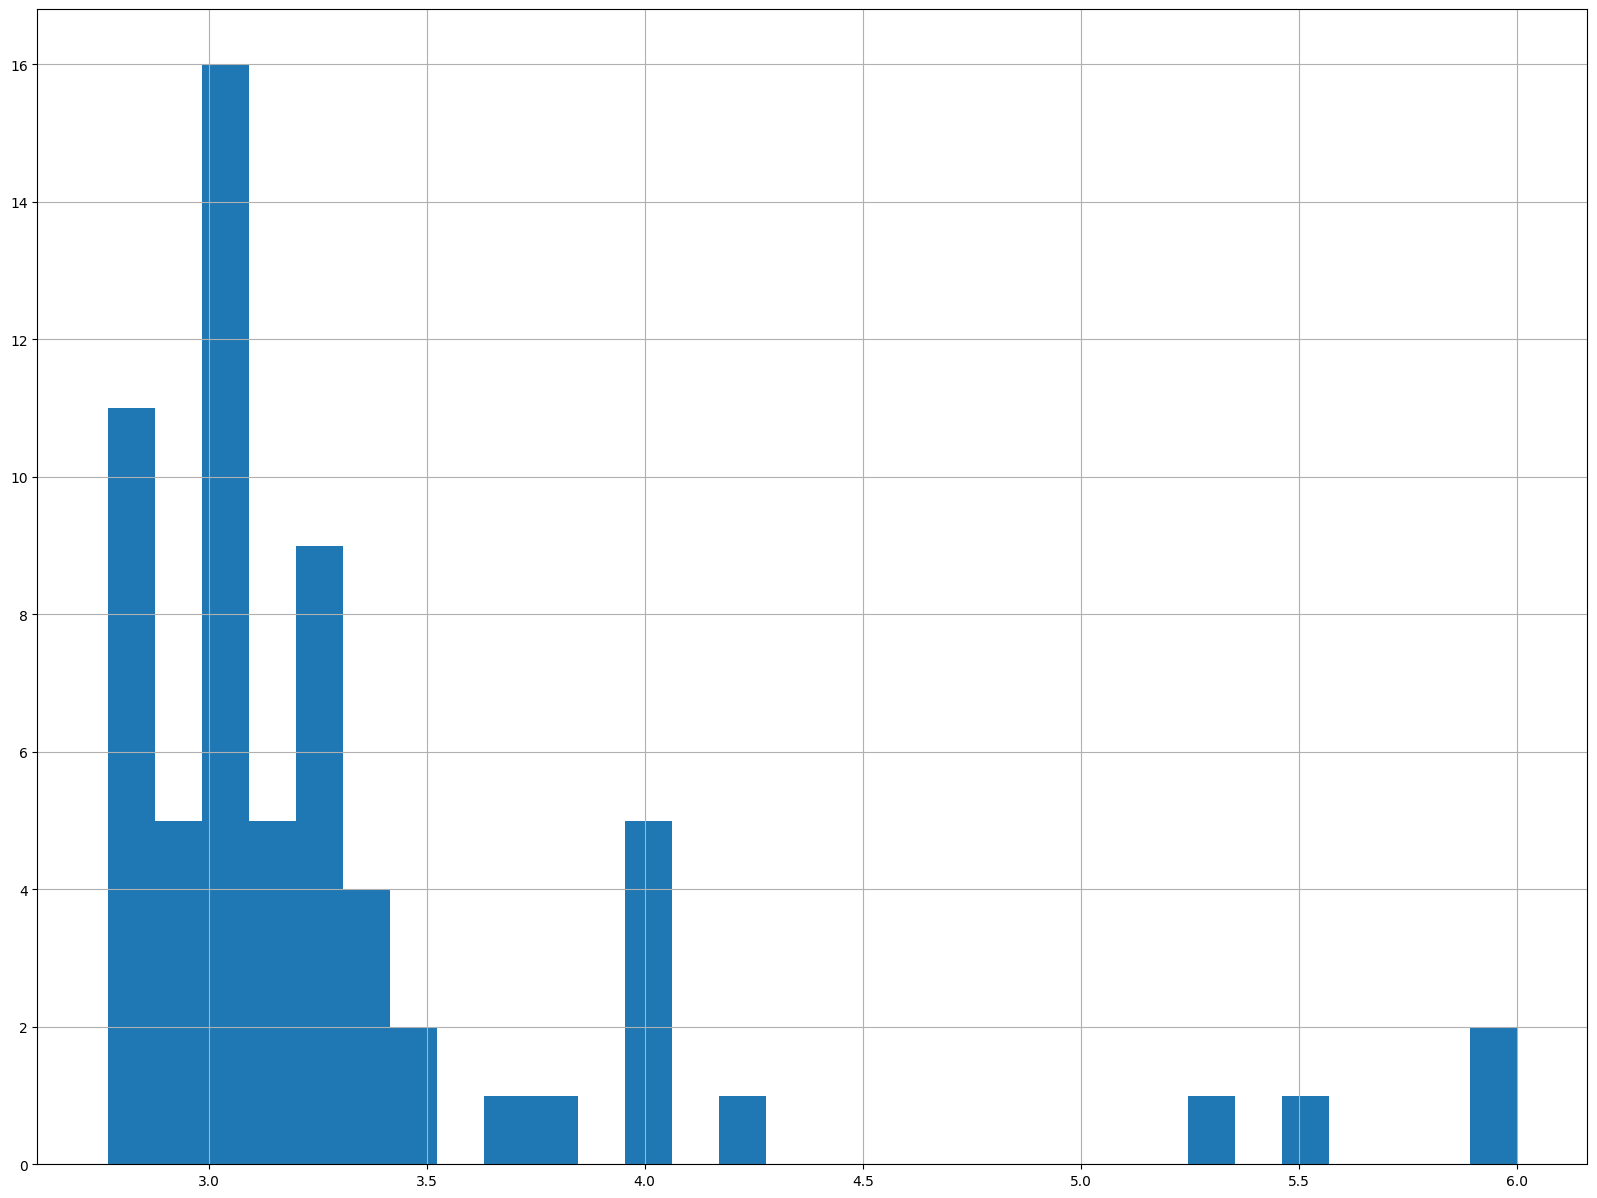

Potential outliers in home_goals_mean_l5:
69      5.0
72      3.4
86      3.6
118     4.6
162     4.0
       ... 
3605    3.4
3651    3.8
3705    5.4
3717    4.4
3741    3.4
Name: home_goals_mean_l5, Length: 103, dtype: float64
(103, 23)


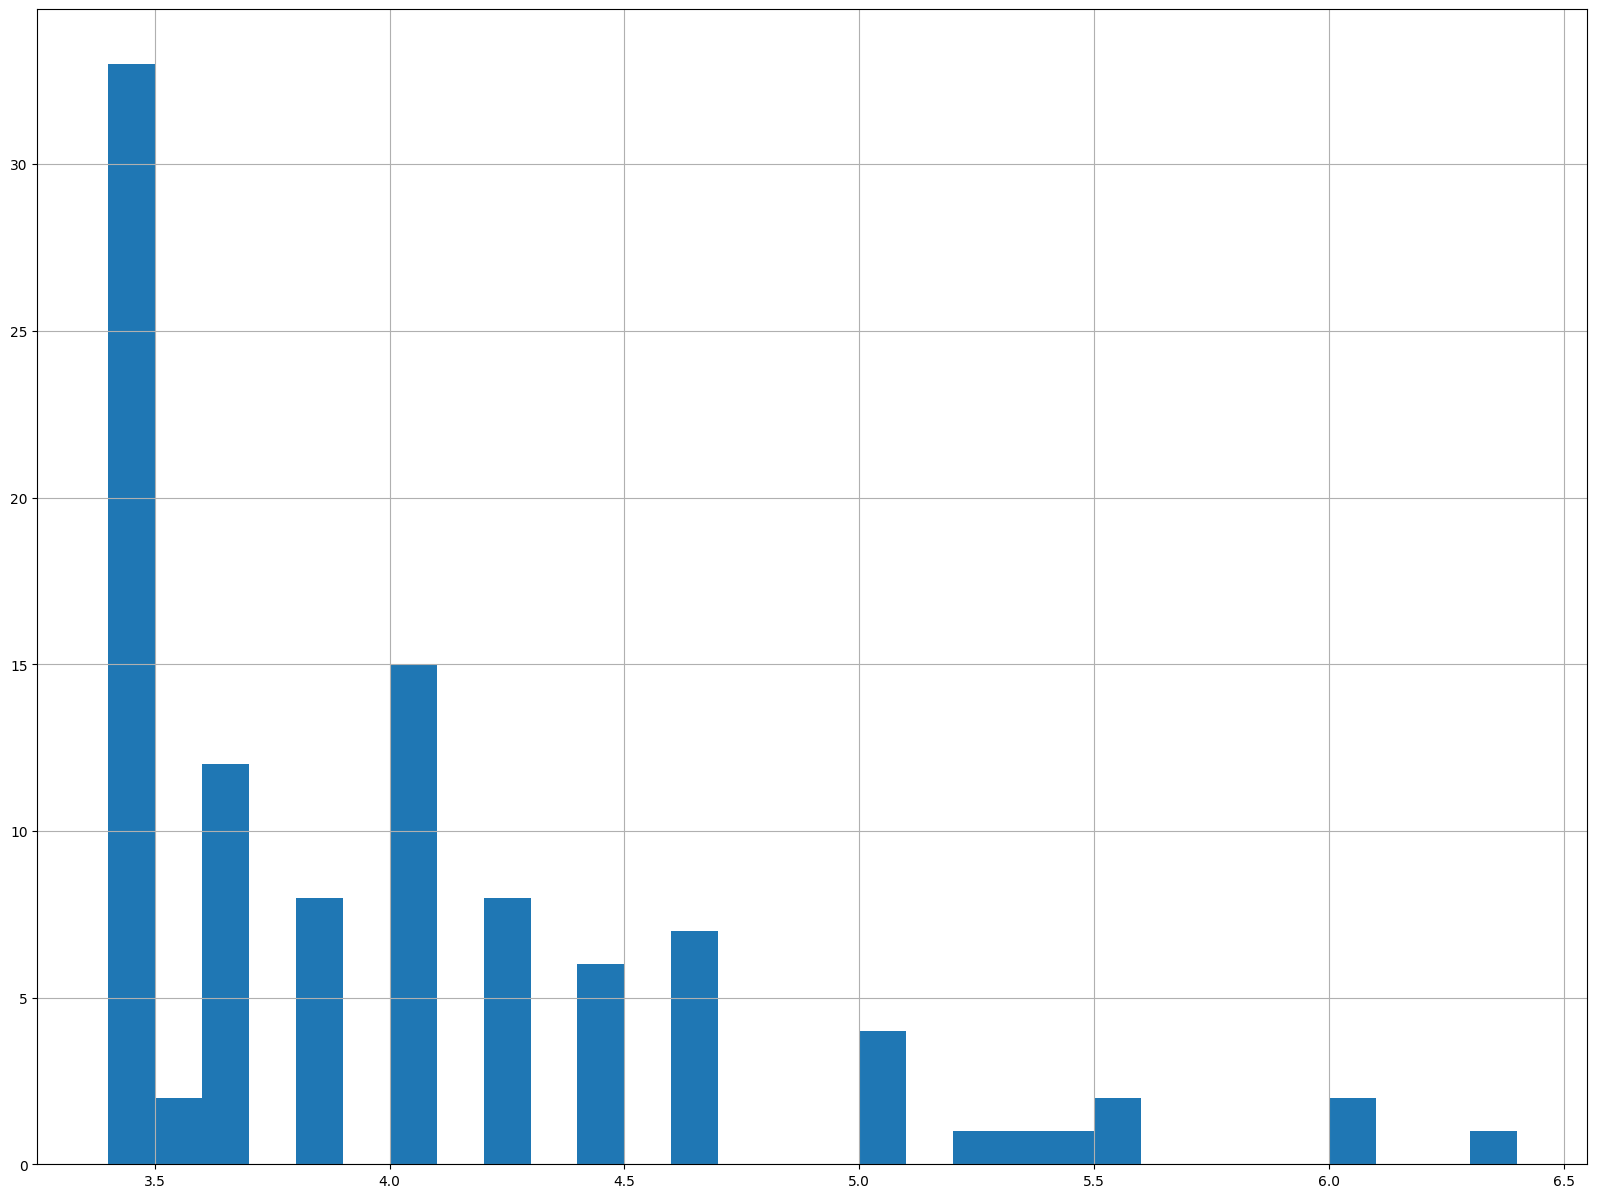

Potential outliers in home_goals_suf_mean:
50      3.000000
54      2.666667
71      2.571429
96      2.486486
149     2.533333
          ...   
3748    3.090909
3751    3.333333
3753    3.666667
3758    3.000000
3771    3.000000
Name: home_goals_suf_mean, Length: 193, dtype: float64
(193, 23)


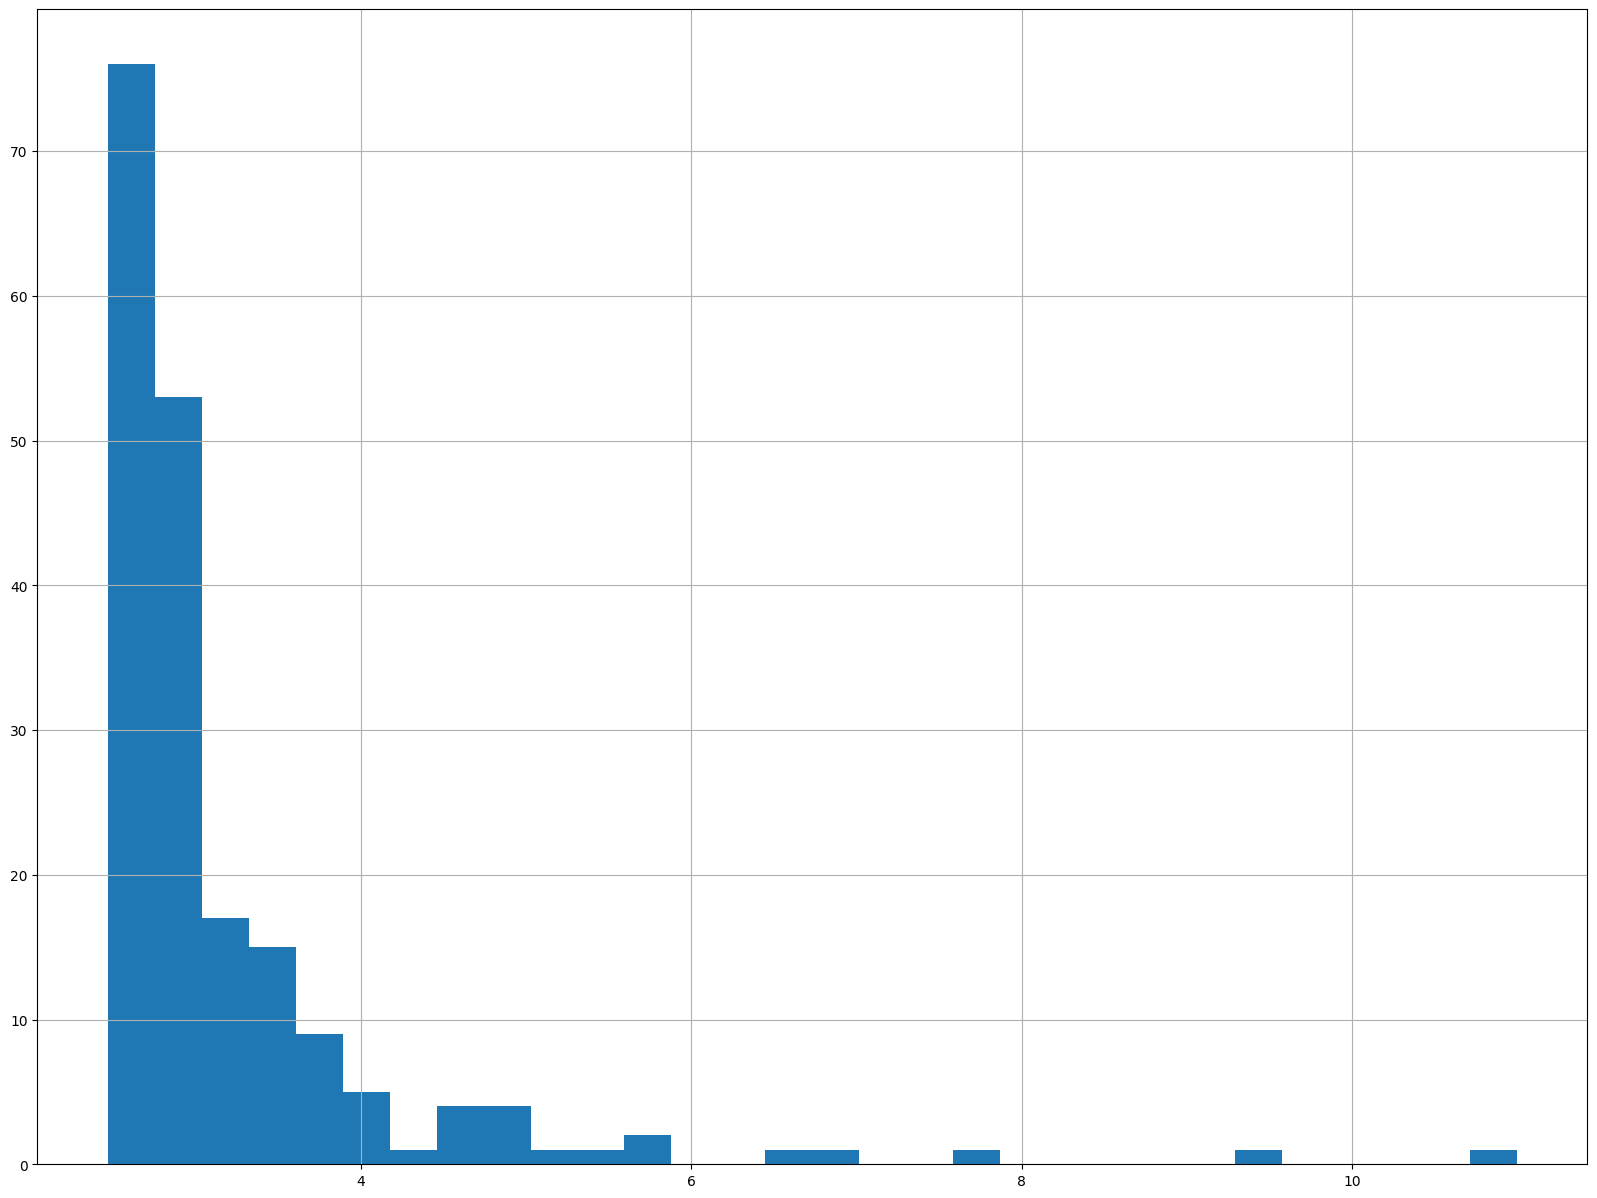

Potential outliers in home_goals_suf_mean_l5:
50      3.000000
56      4.000000
60      3.000000
63      3.200000
78      3.600000
          ...   
3739    3.000000
3748    3.400000
3753    3.666667
3758    3.000000
3771    3.000000
Name: home_goals_suf_mean_l5, Length: 177, dtype: float64
(177, 23)


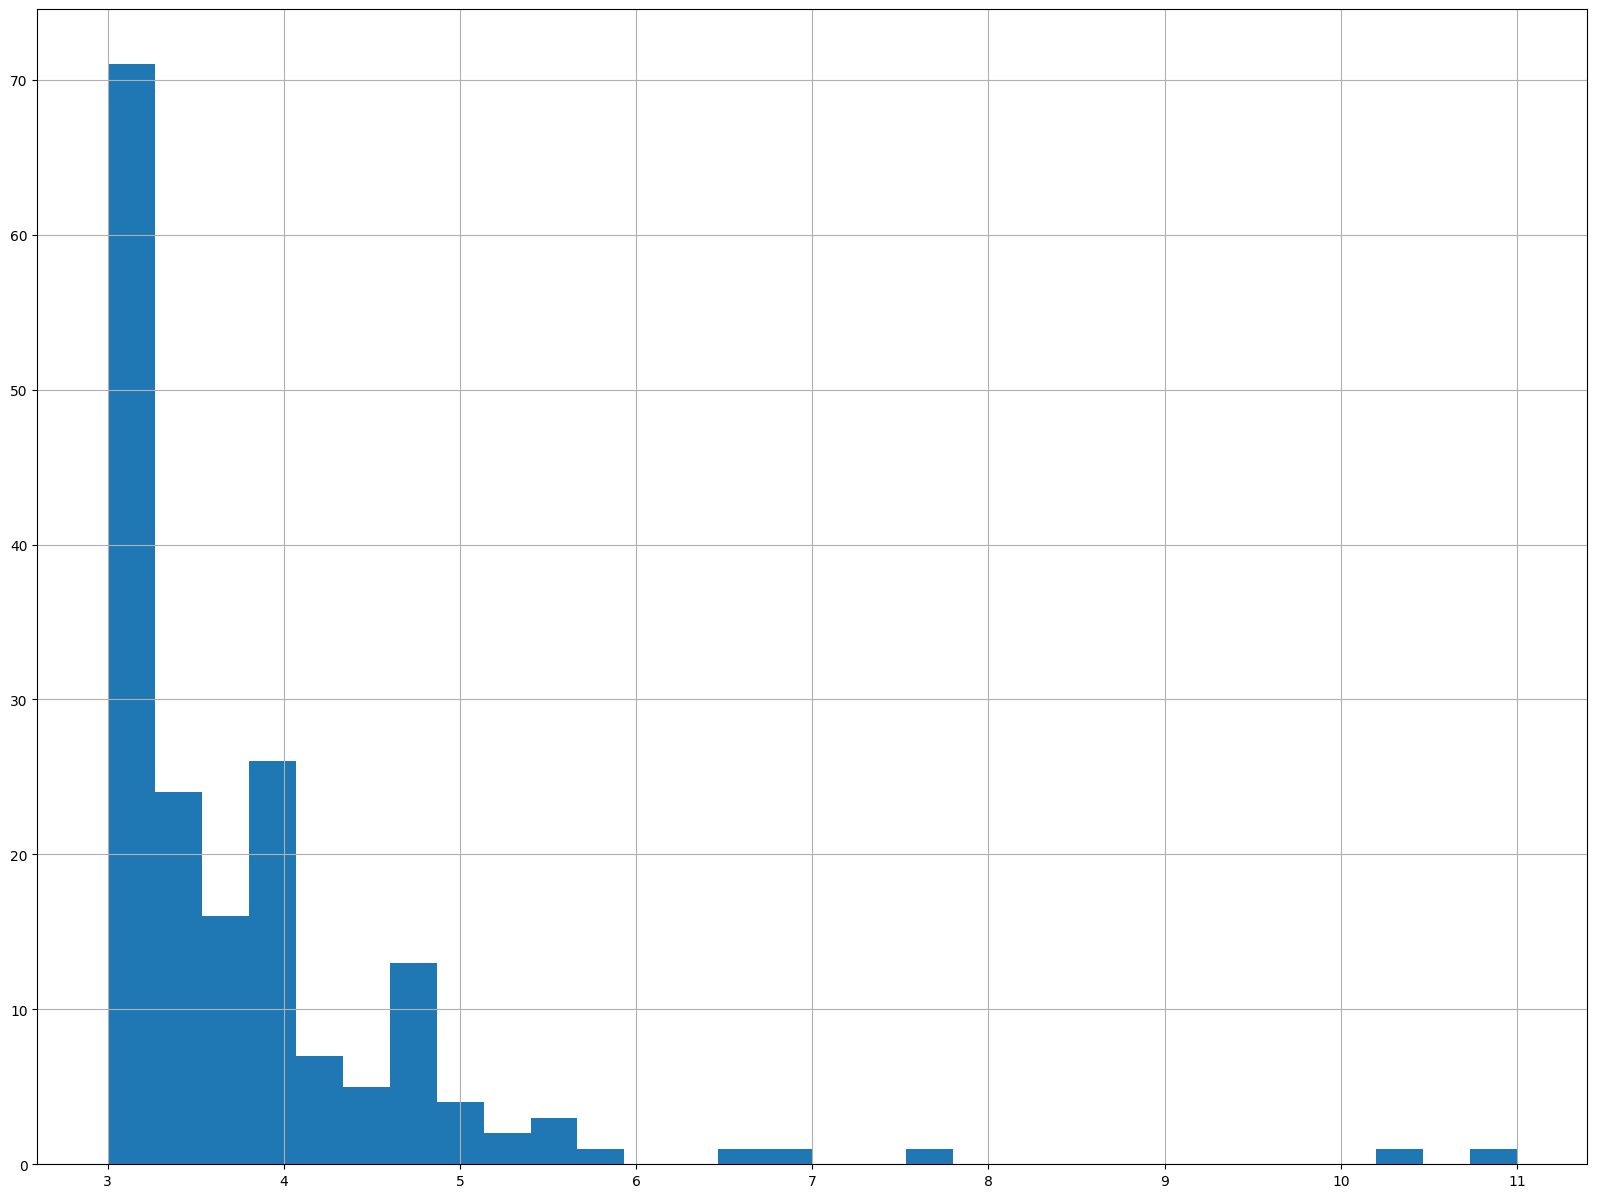

Potential outliers in home_rank_mean:
50      186.500000
53      190.750000
54      181.166667
76      189.500000
162     179.000000
265     179.888889
423     180.500000
428     185.000000
582     183.200000
588     190.000000
639     180.166667
693     192.500000
729     181.000000
742     181.300000
756     179.250000
795     185.666667
828     179.454545
841     182.500000
876     184.600000
890     179.000000
897     195.000000
898     195.000000
1078    201.000000
1165    185.000000
1229    186.666667
1636    179.000000
1667    185.333333
1835    182.222222
2146    184.615385
2243    188.000000
2519    181.750000
2526    183.166667
2661    192.666667
2705    188.000000
2774    185.000000
3003    181.000000
3009    195.000000
3077    195.000000
3142    191.500000
3308    180.000000
3344    183.500000
3415    200.000000
3441    180.400000
3455    194.666667
3577    182.555556
Name: home_rank_mean, dtype: float64
(45, 23)


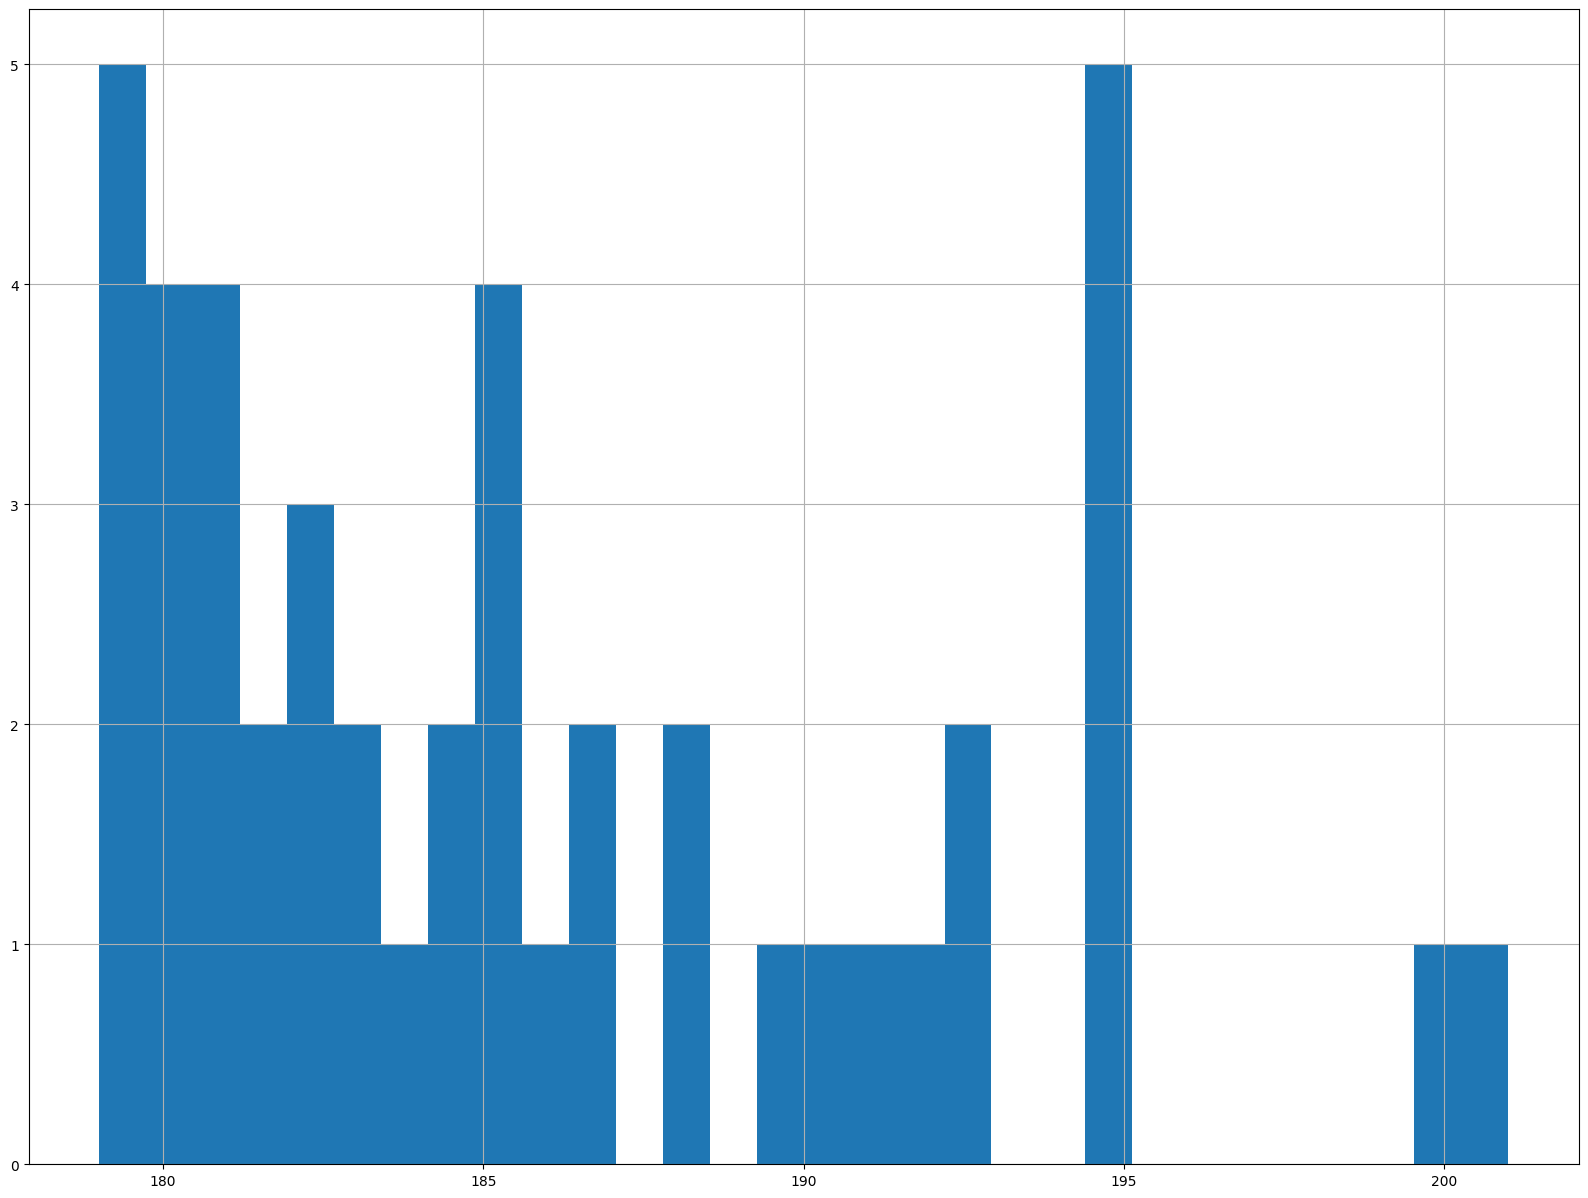

Potential outliers in home_rank_mean_l5:
711     206.200000
897     195.000000
898     195.000000
939     198.600000
1078    201.000000
2902    195.800000
3009    195.000000
3077    195.000000
3415    200.000000
3455    194.666667
Name: home_rank_mean_l5, dtype: float64
(10, 23)


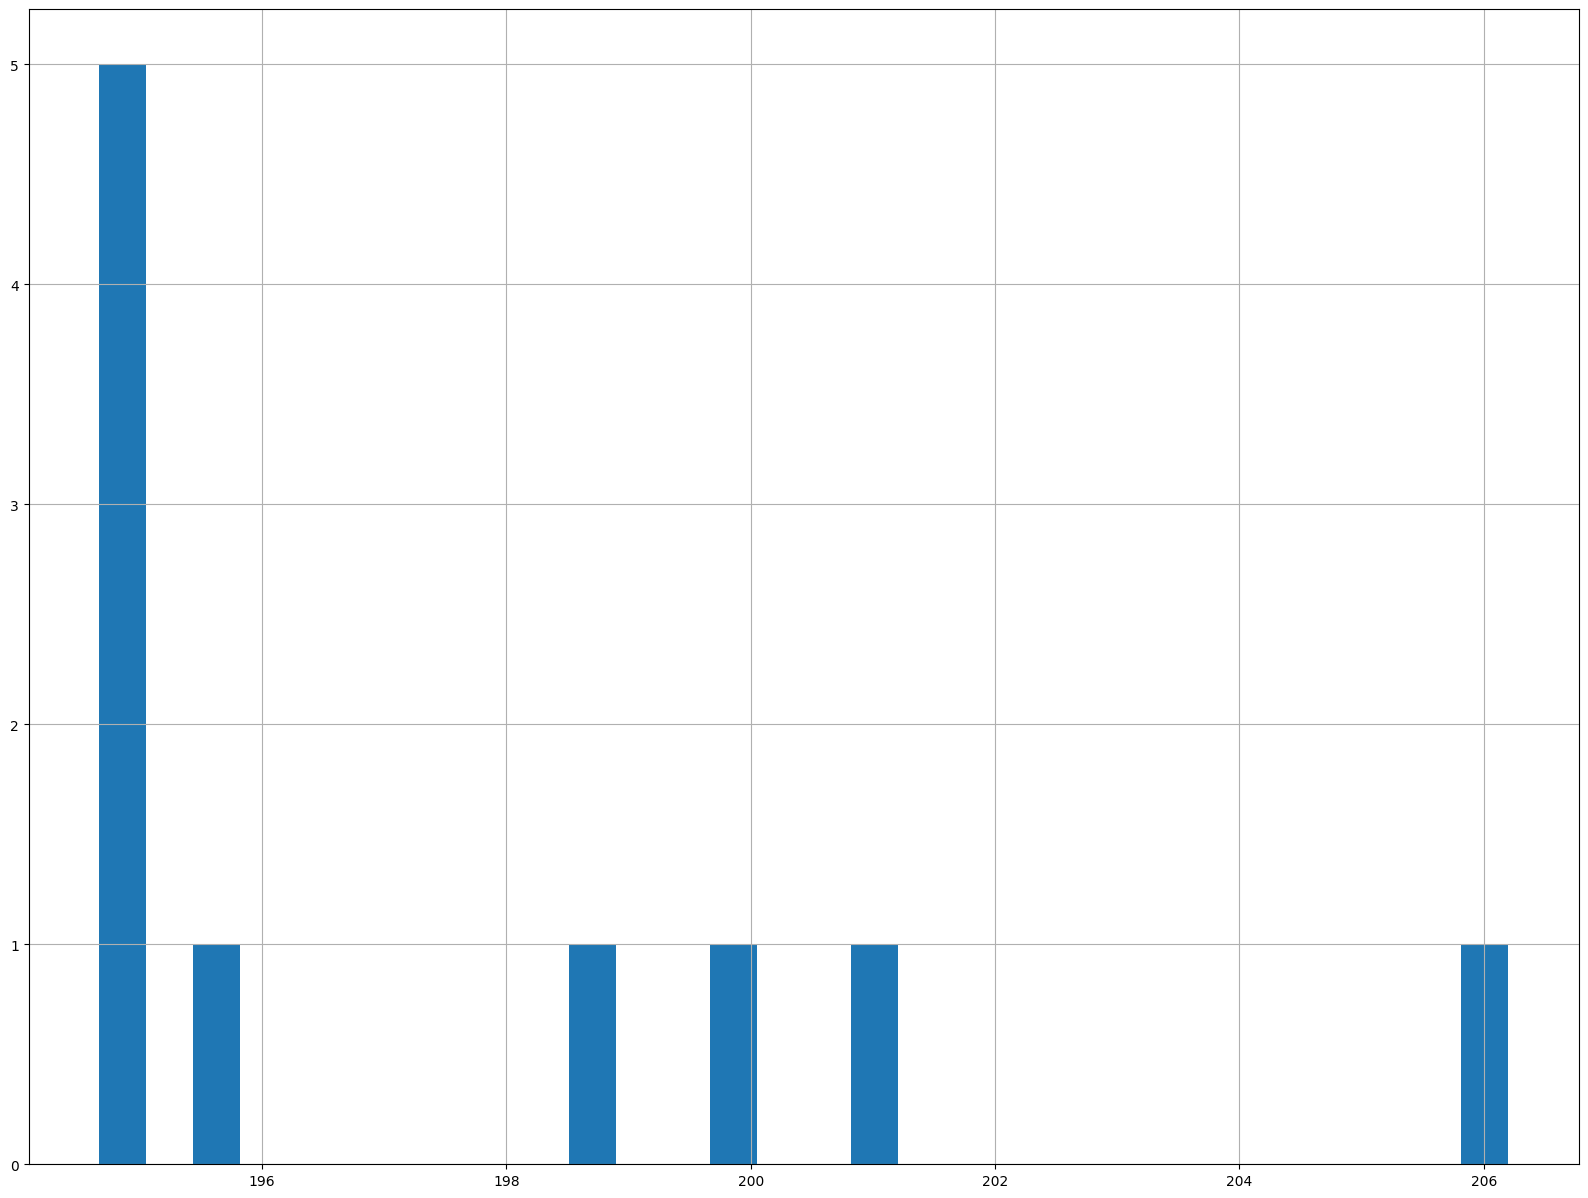

Potential outliers in home_points_mean:
21      196.43
33      167.54
61      177.21
86      180.56
93      179.83
         ...  
3718    284.00
3750    153.70
3752    161.44
3760    149.01
3765    172.00
Name: home_points_mean, Length: 200, dtype: float64
(200, 23)


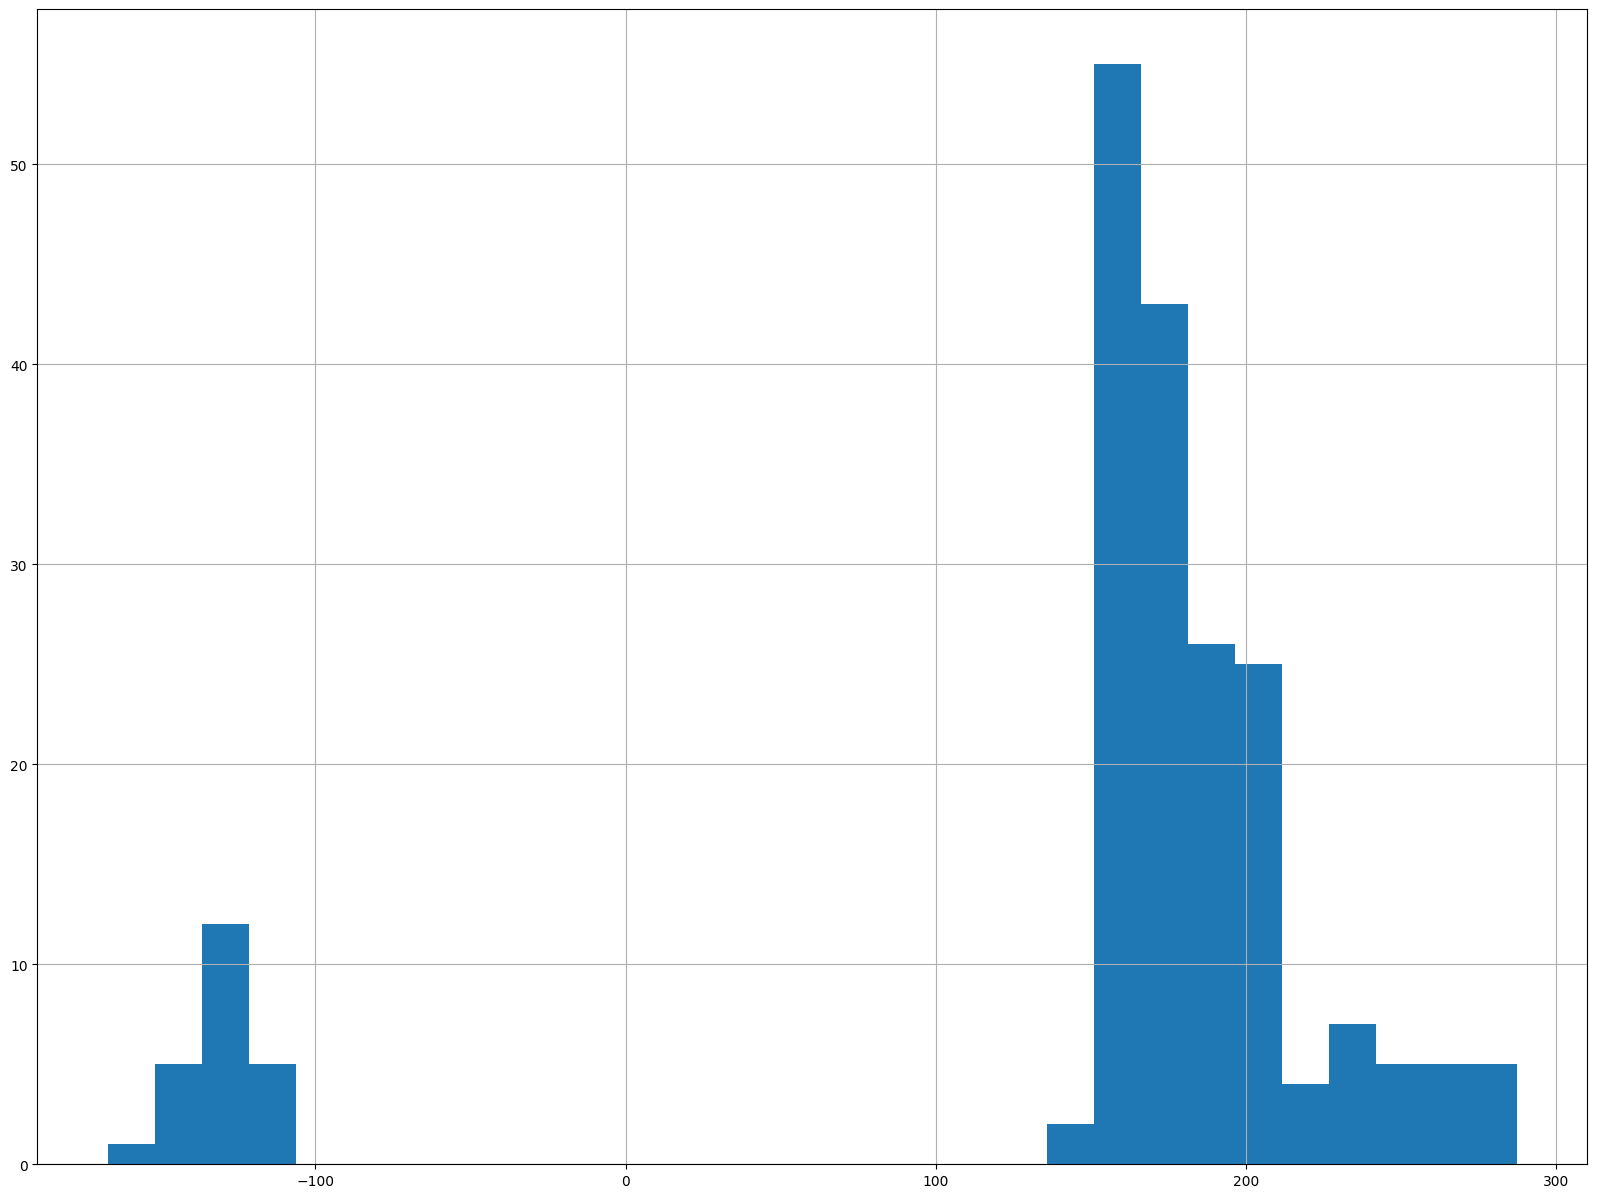

Potential outliers in home_points_mean_l5:
0       55.02
19     -40.02
38     -58.46
59      40.00
74     -33.00
        ...  
3713   -66.57
3736   -41.00
3742    46.00
3743    78.67
3755    37.68
Name: home_points_mean_l5, Length: 206, dtype: float64
(206, 23)


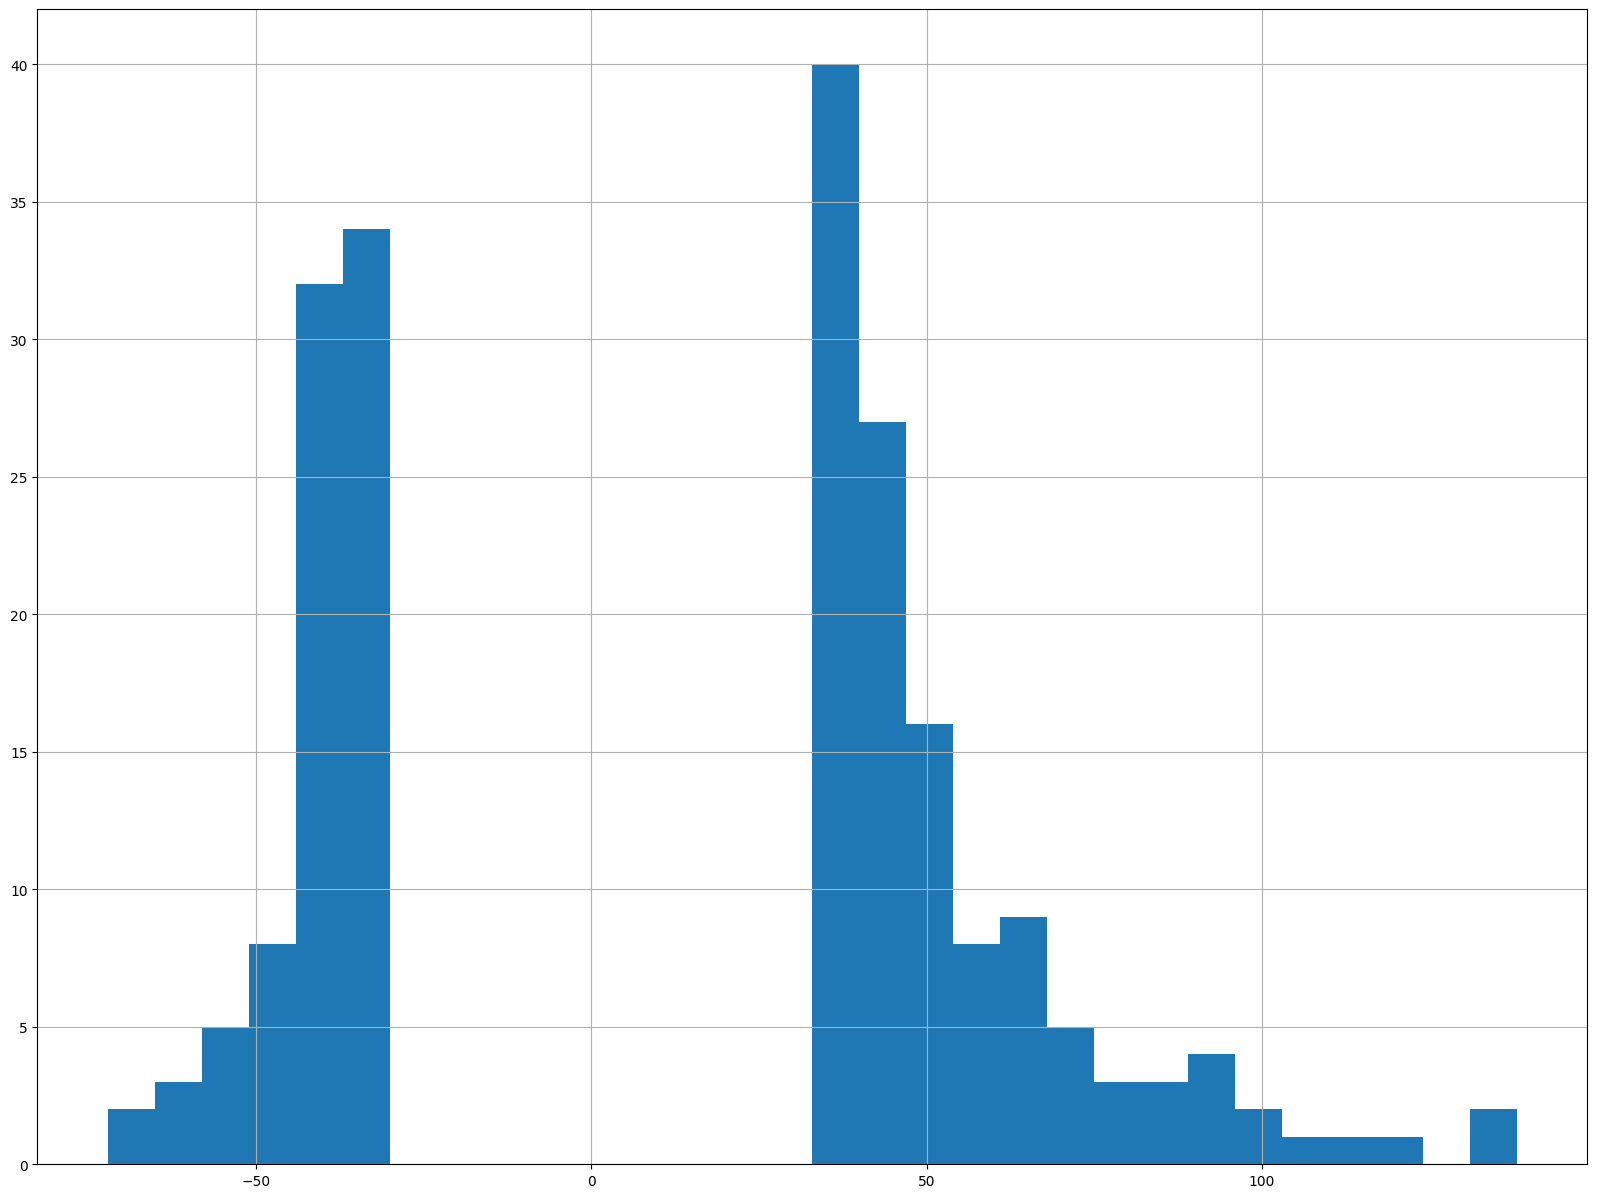

Potential outliers in away_goals_mean:
12      2.846154
167     3.000000
191     2.800000
371     3.000000
416     3.000000
          ...   
3603    2.700000
3666    3.142857
3705    3.500000
3730    3.000000
3772    3.181818
Name: away_goals_mean, Length: 77, dtype: float64
(77, 23)


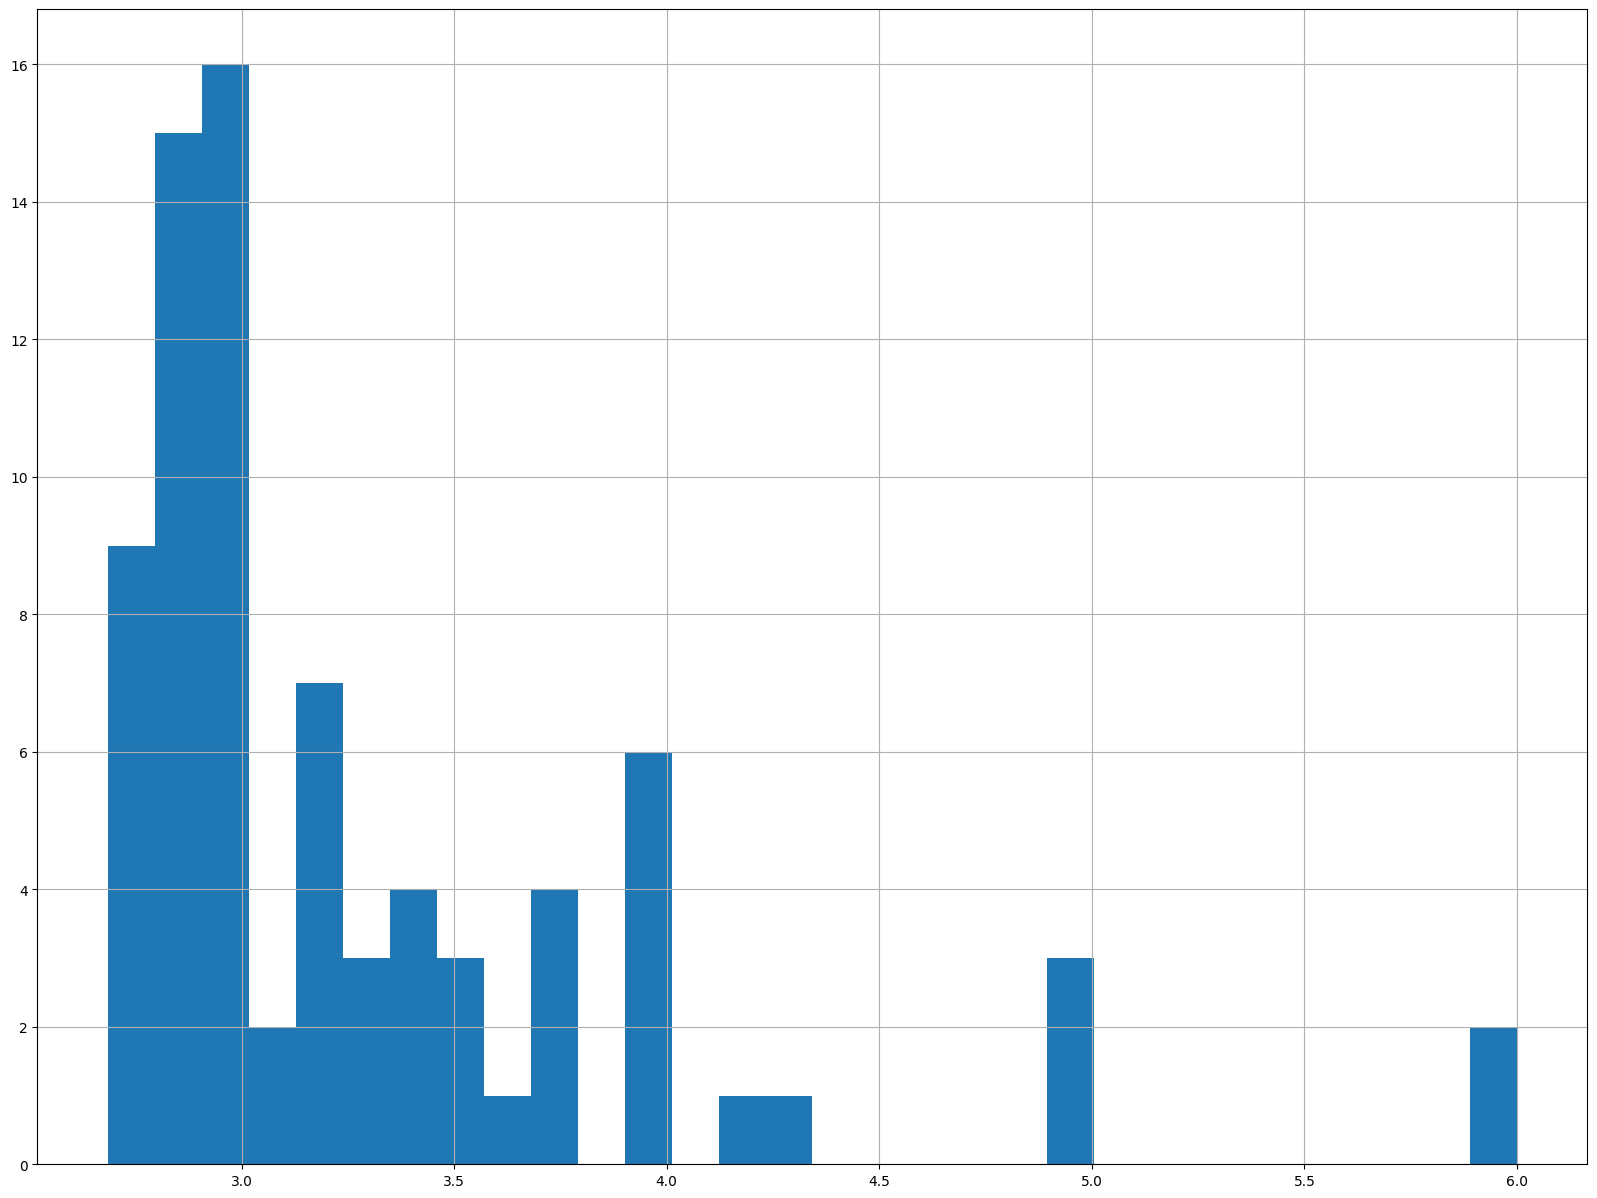

Potential outliers in away_goals_mean_l5:
5       3.8
91      3.4
138     3.6
204     3.8
253     3.8
       ... 
3531    4.0
3577    3.8
3705    4.2
3752    3.6
3772    3.4
Name: away_goals_mean_l5, Length: 100, dtype: float64
(100, 23)


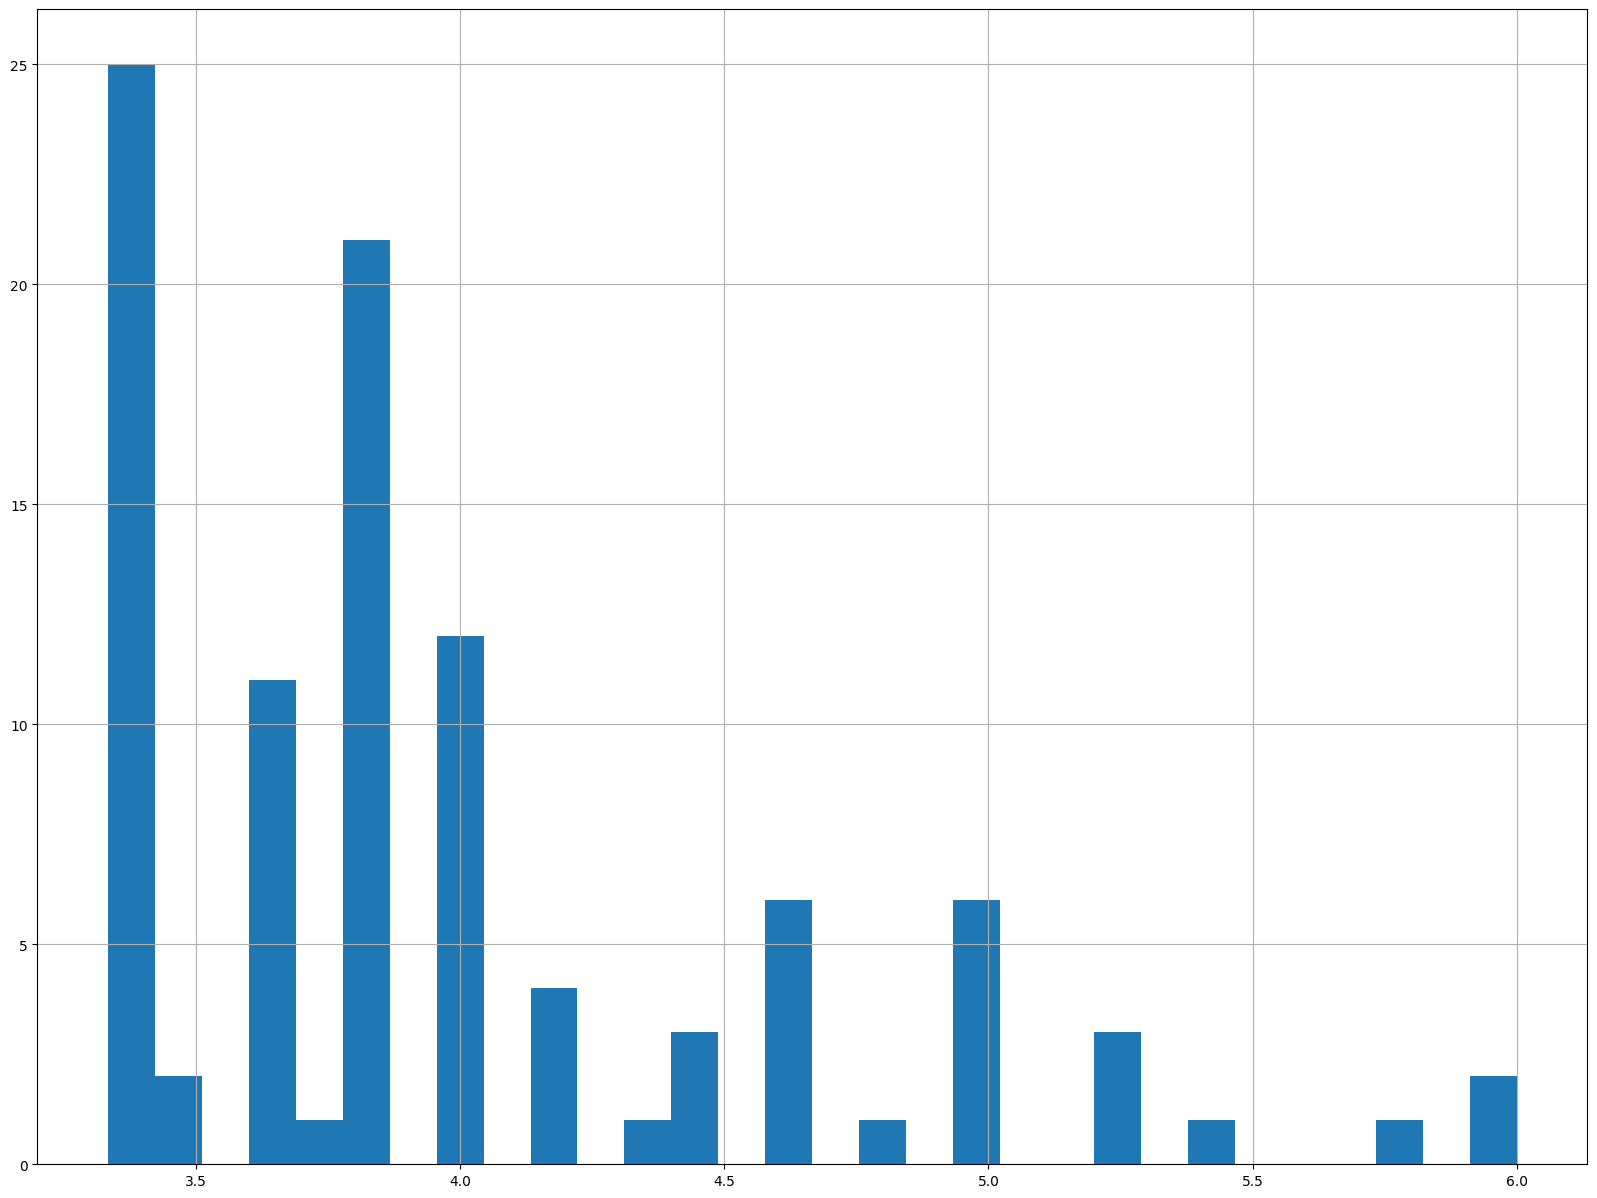

Potential outliers in away_goals_suf_mean:
28      5.666667
37      2.709677
54      3.666667
71      3.294118
76      2.666667
          ...   
3734    3.285714
3738    2.625000
3751    4.333333
3753    9.500000
3761    2.727273
Name: away_goals_suf_mean, Length: 184, dtype: float64
(184, 23)


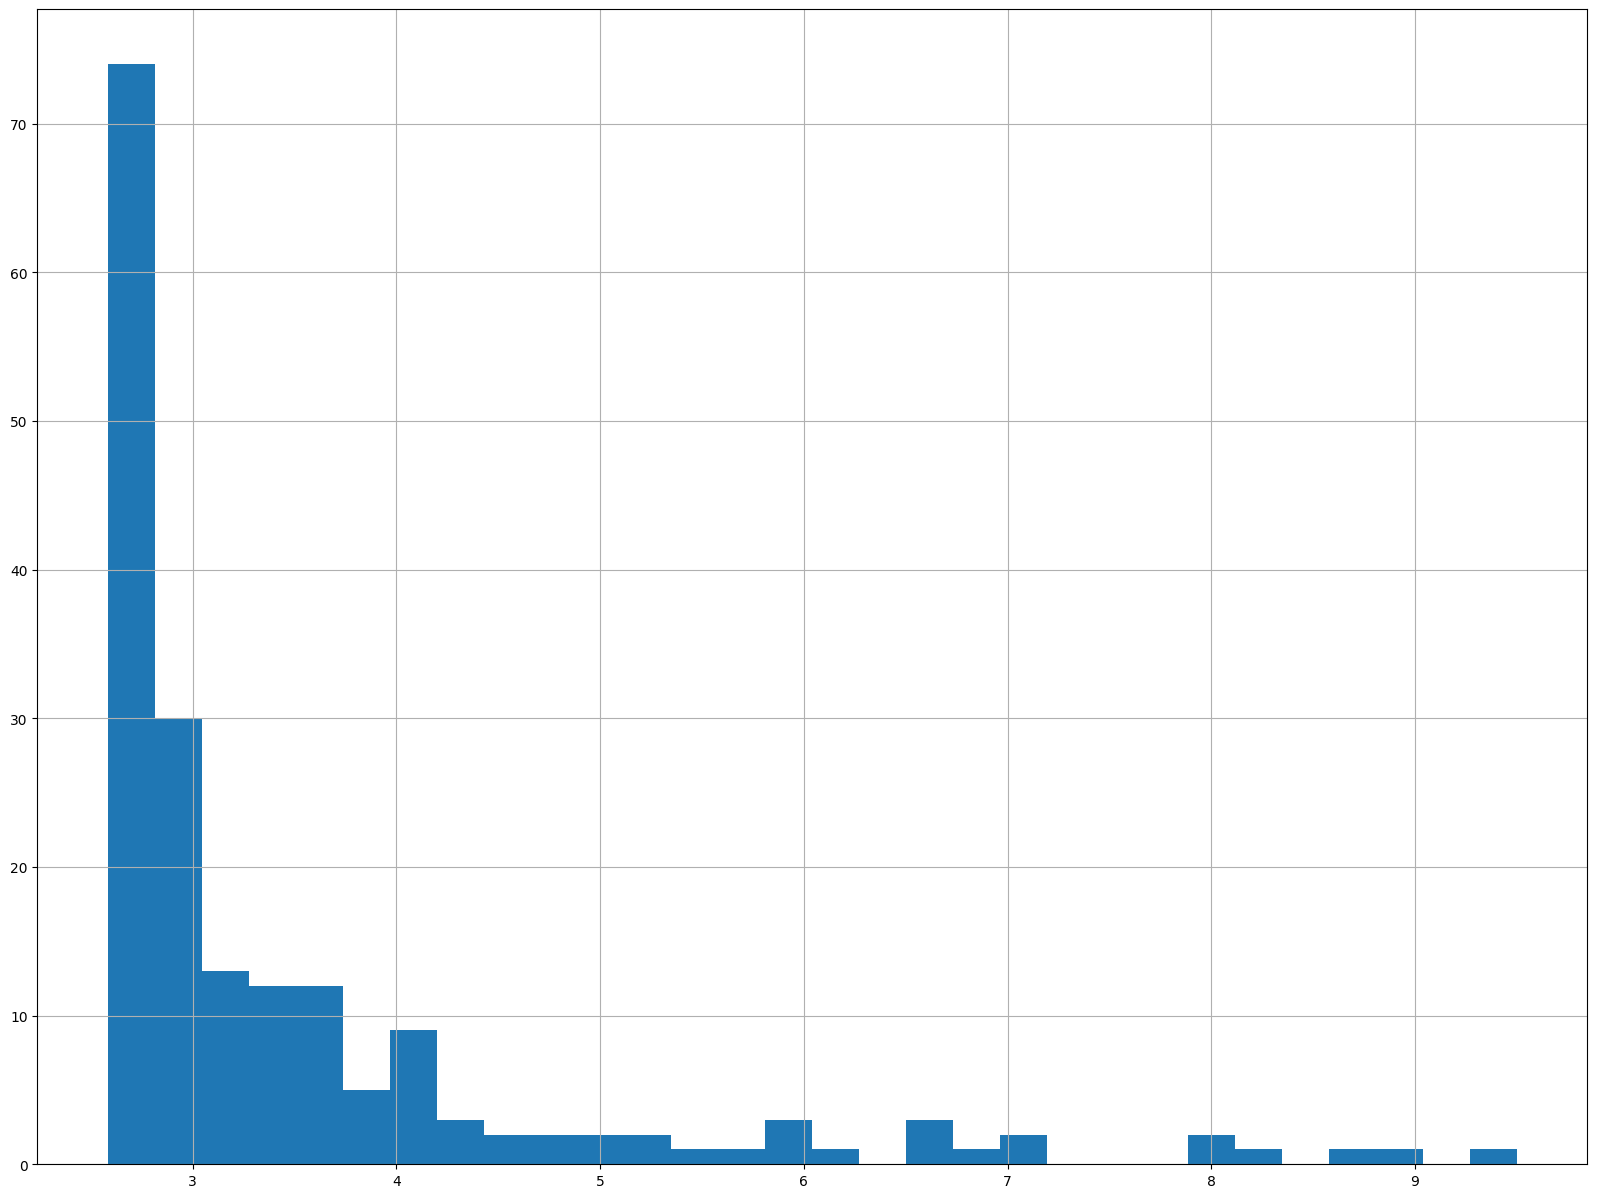

Potential outliers in away_goals_suf_mean_l5:
28      5.666667
54      3.666667
71      3.800000
162     8.000000
172     4.000000
          ...   
3704    3.600000
3736    4.200000
3751    4.800000
3753    9.500000
3761    3.600000
Name: away_goals_suf_mean_l5, Length: 122, dtype: float64
(122, 23)


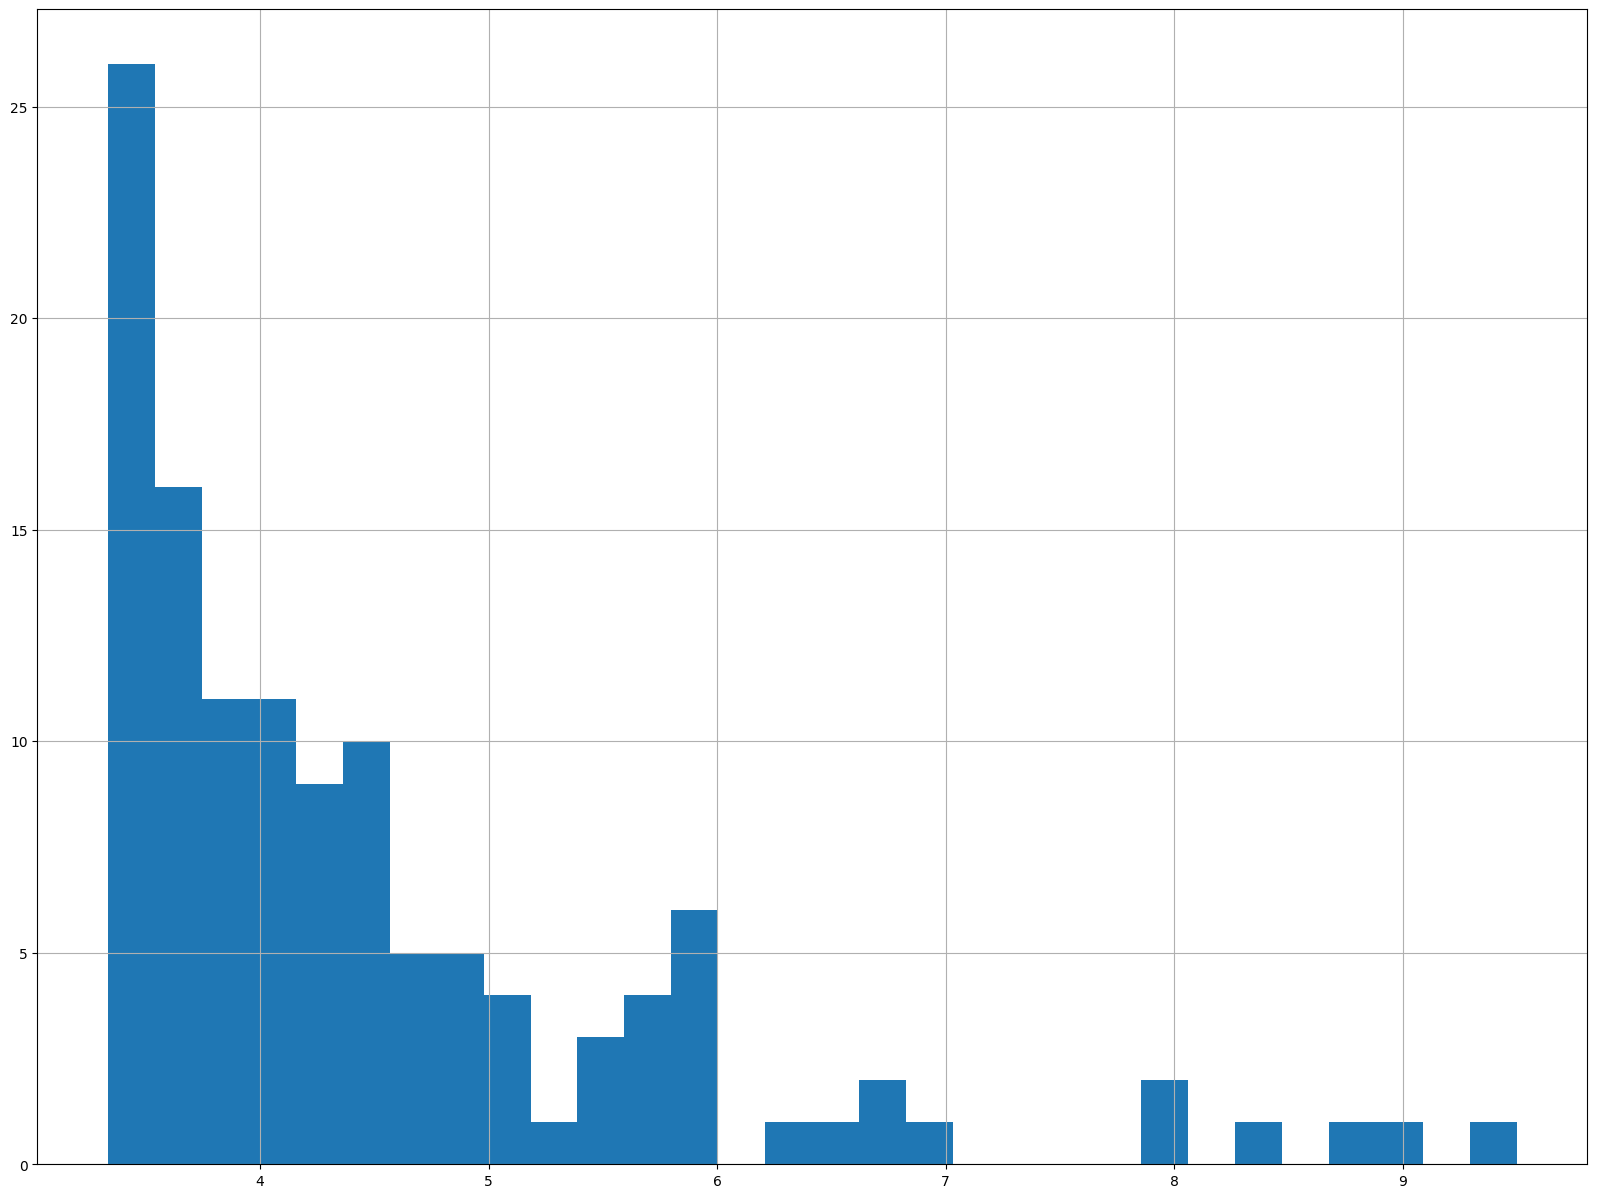

Potential outliers in away_rank_mean:
54      189.666667
265     188.166667
332     186.000000
351     204.000000
394     191.000000
461     182.750000
570     182.000000
711     181.583333
756     188.400000
795     187.250000
807     180.250000
828     183.083333
895     182.285714
898     180.000000
939     183.181818
946     184.000000
1078    194.000000
1093    182.666667
1165    185.000000
1260    187.200000
1294    190.000000
1667    185.500000
1829    203.000000
2144    183.875000
2334    185.000000
2440    181.769231
2516    183.571429
2575    185.800000
2774    195.333333
3125    180.000000
3161    187.500000
3178    183.400000
3274    183.666667
3399    206.000000
3404    210.000000
3415    200.000000
3455    192.000000
3518    187.875000
3696    186.250000
3730    202.000000
3753    181.500000
Name: away_rank_mean, dtype: float64
(41, 23)


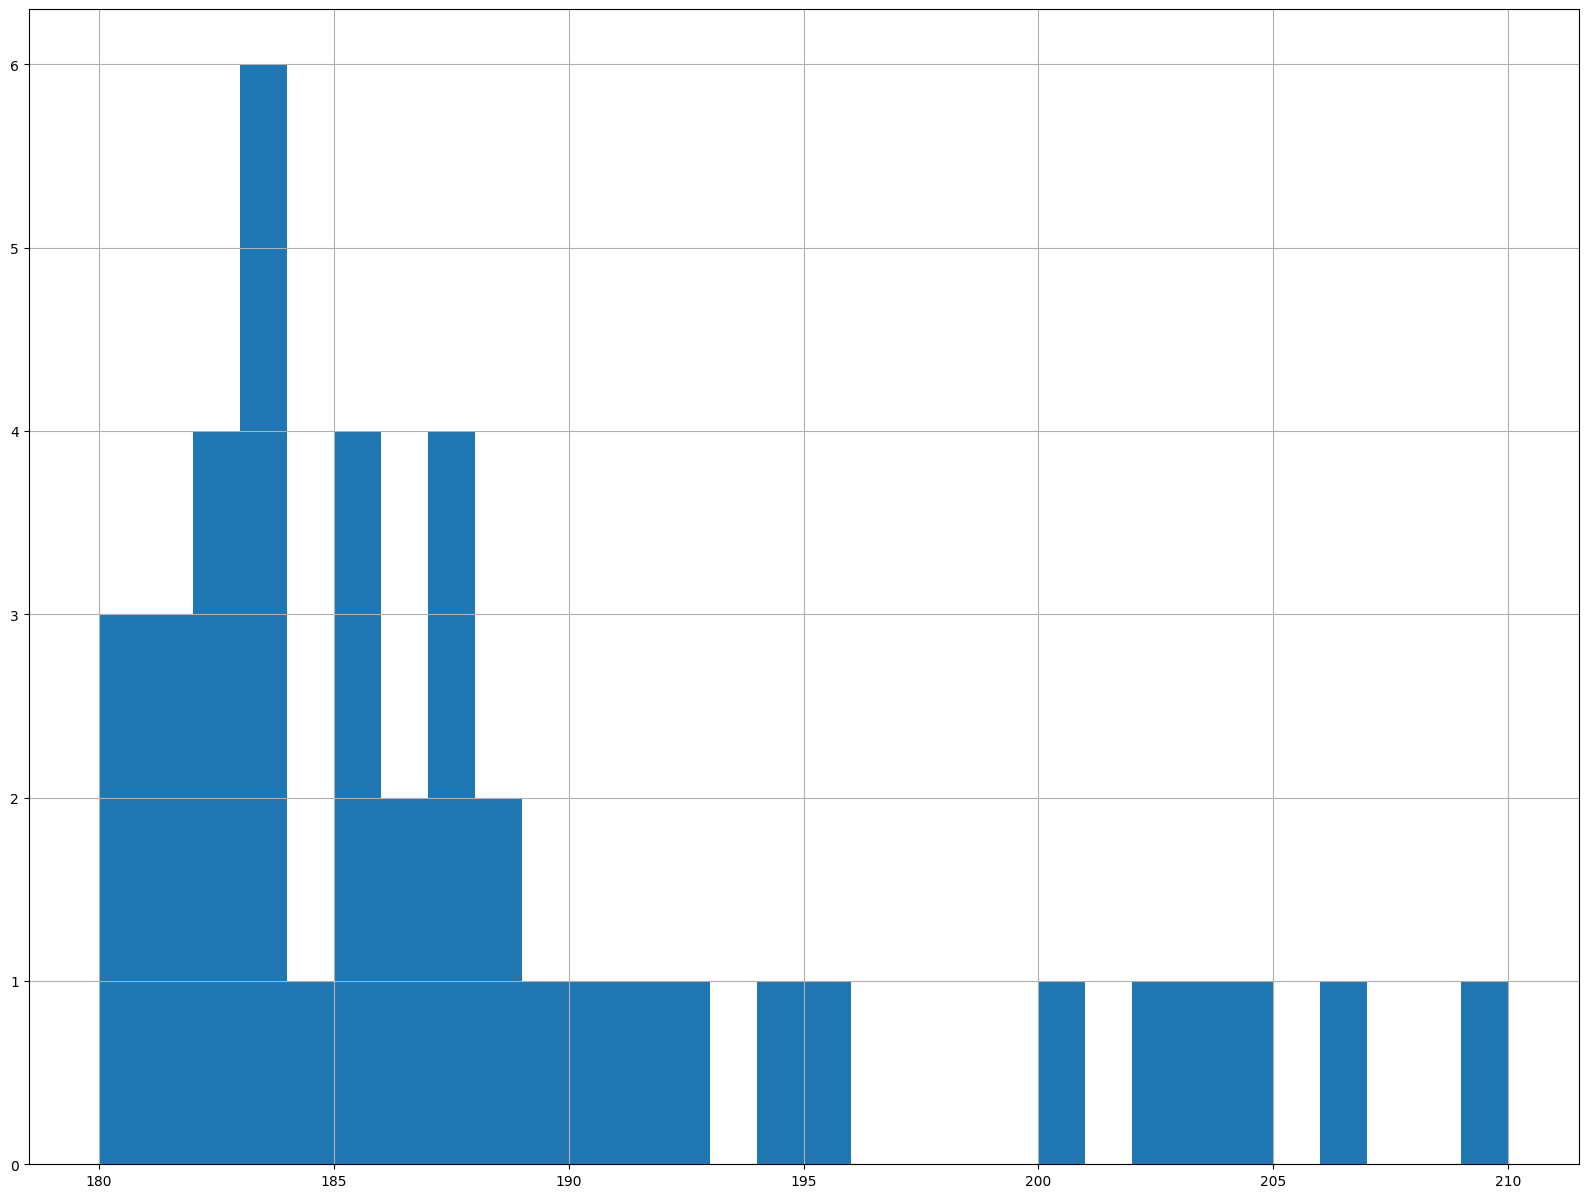

Potential outliers in away_rank_mean_l5:
351     204.0
1829    203.0
2334    201.0
3399    206.0
3404    210.0
3730    202.0
Name: away_rank_mean_l5, dtype: float64
(6, 23)


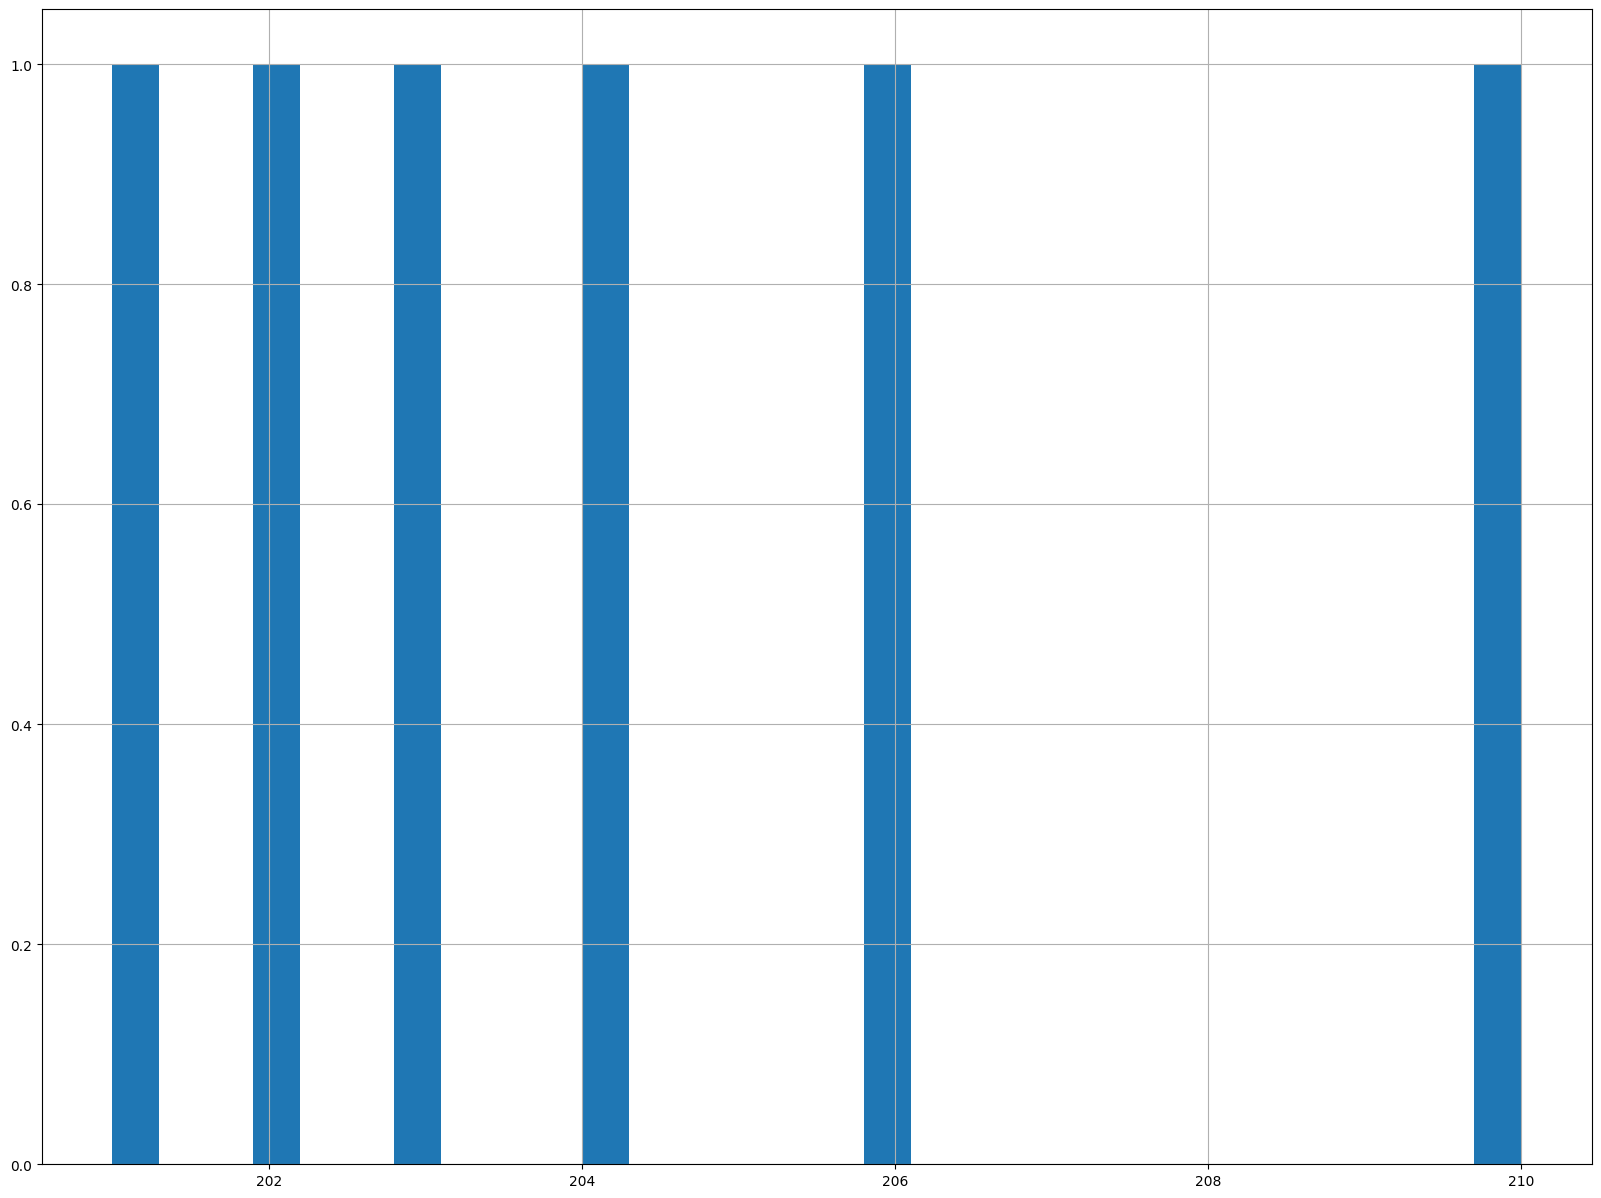

Potential outliers in away_points_mean:
14      219.23
60     -165.90
98      135.10
107     219.23
115    -111.42
         ...  
3699    135.44
3710    135.22
3731    243.69
3752    175.69
3765    201.91
Name: away_points_mean, Length: 209, dtype: float64
(209, 23)


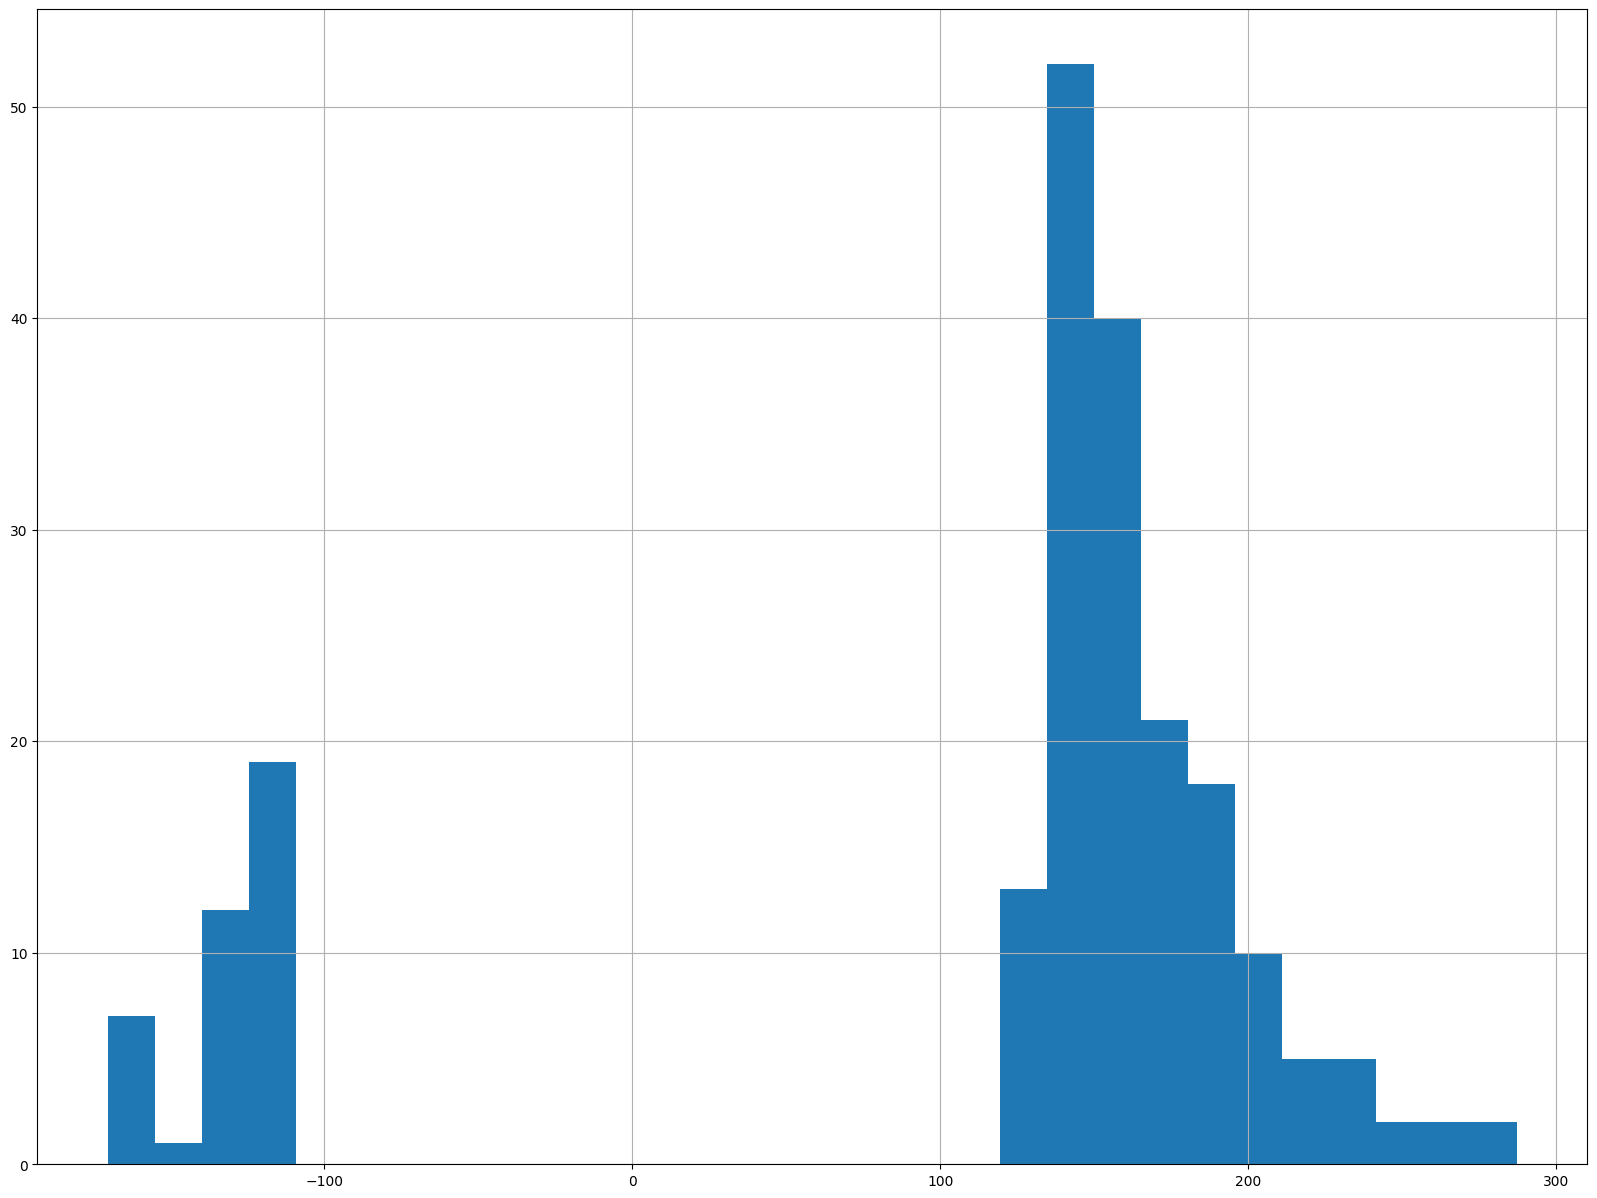

Potential outliers in away_points_mean_l5:
14      57.31
19      53.15
41     -34.67
52      40.61
75     -34.87
        ...  
3699    43.46
3705    37.43
3756   -37.41
3772    37.43
3776    44.41
Name: away_points_mean_l5, Length: 197, dtype: float64
(197, 23)


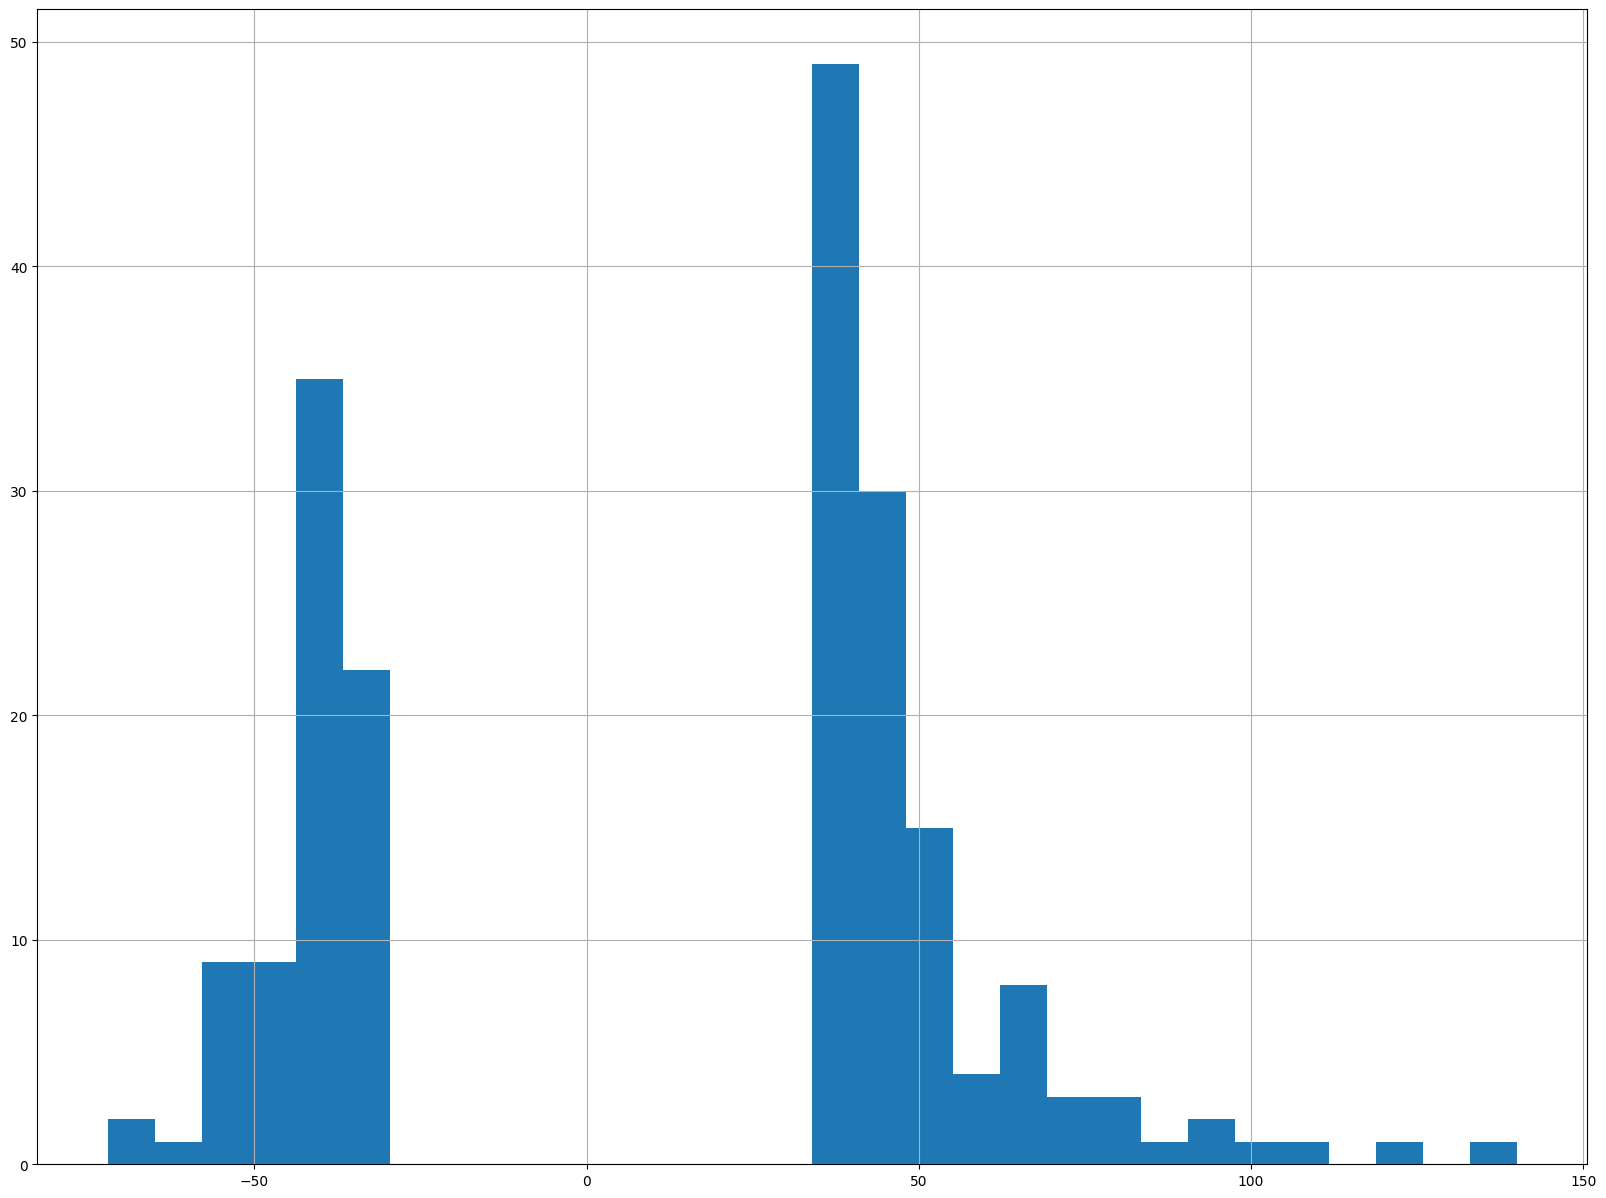

In [81]:

col_num  = [
    'rank_change_home', 'rank_change_away', 'home_goals_mean',
       'home_goals_mean_l5', 'home_goals_suf_mean', 'home_goals_suf_mean_l5',
       'home_rank_mean', 'home_rank_mean_l5', 'home_points_mean',
       'home_points_mean_l5', 'away_goals_mean', 'away_goals_mean_l5',
       'away_goals_suf_mean', 'away_goals_suf_mean_l5', 'away_rank_mean',
       'away_rank_mean_l5', 'away_points_mean', 'away_points_mean_l5'
]

# detection des valeurs extremes
for col in col_num:
    # Calculate Q1, Q3, and IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    #  calcul de la borne inferieure et superieure
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Potentielles valeurs extremes
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    # Verifier si les valeurs extremes sont coherentes avec le contexte
    if len(outliers) > 0:
        print(f"Potential outliers in {col}:")
        print(outliers[col])
        print(outliers.shape)
        # distribution des valeurs extremes 
        outliers[col].hist(bins=30, figsize=(20, 15))
        plt.show()
#  d apres la visuaisation des valeurs extremes , on peut conclure que les valeurs extremes sont coherentes avec le contexte des matchs de football. Peu de valeurs extremes sont a imputer
      



In [82]:
# une equipe a au moins 0 buts et au plus 3 buts
df['away_points_mean'] = df['away_points_mean'].clip(0, 3)
df['away_points_mean_l5'] = df['away_points_mean_l5'].clip(0, 3)
df['home_points_mean_l5'] = df['home_points_mean_l5'].clip(0, 3)
df['home_points_mean'] = df['home_points_mean'].clip(0, 3)


In [83]:
df.describe()

,rank_change_home,rank_change_away,home_goals_mean,home_goals_mean_l5,home_goals_suf_mean,home_goals_suf_mean_l5,home_rank_mean,home_rank_mean_l5,home_points_mean,home_points_mean_l5,away_goals_mean,away_goals_mean_l5,away_goals_suf_mean,away_goals_suf_mean_l5,away_rank_mean,away_rank_mean_l5,away_points_mean,away_points_mean_l5,target
count,3777.000000,3777.000000,3777.000000,3777.000000,3777.000000,3777.000000,3777.000000,3777.000000,3777.000000,3777.000000,3777.000000,3777.000000,3777.000000,3777.000000,3777.000000,3777.000000,3777.000000,3777.000000,3777.000000
mean,0.079958,0.042651,1.363972,1.356985,1.249860,1.290778,85.690572,84.750613,1.693381,1.322881,1.305654,1.303954,1.320218,1.343800,88.096724,87.014606,1.524326,1.252952,0.523167
std,4.990718,1.645716,0.605170,0.834692,0.681384,0.867303,36.061328,40.272798,1.474433,1.450090,0.601565,0.818420,0.735725,0.907621,36.338822,40.854255,1.484329,1.438358,0.499529
min,-28.000000,-24.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.750000,4.750000,0.000000,0.000000,0.000000
25%,-1.000000,0.000000,1.000000,0.800000,0.857143,0.800000,55.818182,54.800000,0.000000,0.000000,0.923077,0.800000,0.911111,0.800000,58.964286,56.600000,0.000000,0.000000,0.000000
50%,0.000000,0.042651,1.285714,1.200000,1.125000,1.200000,85.842105,81.800000,3.000000,0.000000,1.212121,1.200000,1.183673,1.200000,88.583333,84.000000,2.000000,0.000000,1.000000
75%,1.000000,0.042651,1.704545,1.800000,1.500000,1.600000,104.707317,110.600000,3.000000,3.000000,1.625000,1.800000,1.575758,1.800000,107.333333,114.200000,3.000000,3.000000,1.000000
max,188.000000,14.000000,6.000000,6.400000,11.000000,11.000000,201.000000,206.200000,3.000000,3.000000,6.000000,6.000000,9.500000,9.500000,210.000000,210.000000,3.000000,3.000000,1.000000


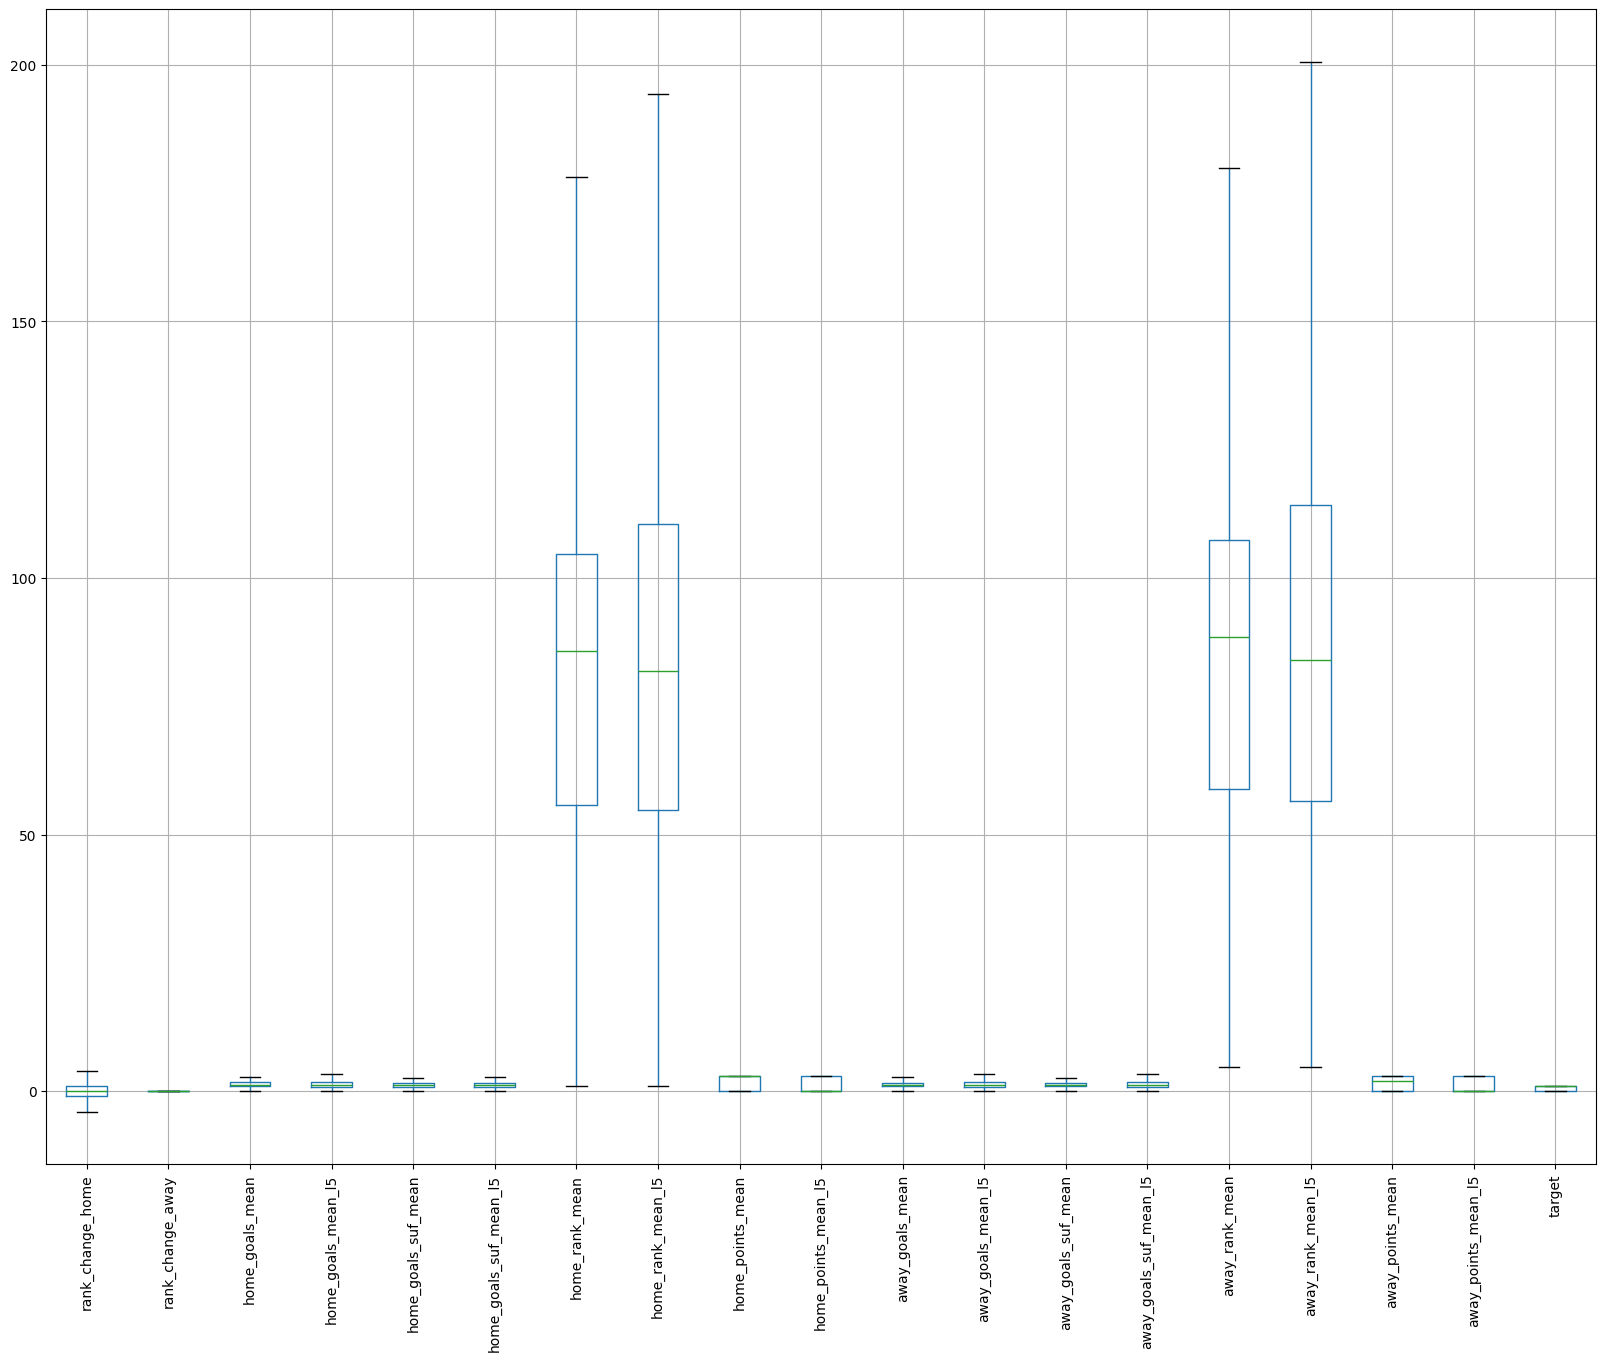

In [84]:
# Imputation des valeurs extremes
for column  in col_num :
    IQR = df[column].quantile(0.75) - df[column].quantile(0.25)
    valeur_min = df[column].quantile(0.25) - 1.5 * IQR
    valeur_max = df[column].quantile(0.75) + 1.5 * IQR
    # plafonner les valeurs 
    df[column] = df[column].clip(valeur_min, valeur_max)
   
df.boxplot(figsize=(20, 15))
plt.xticks(rotation=90)
plt.show()

In [85]:
# # plafond 99e percentile 
# extremes=['rank_change_home', 'rank_change_away', 'home_points_mean','away_points_mean','home_goals_suf_mean','away_goals_suf_mean']
# for col in extremes  :
#     percentile_99 = df[col].quantile(0.99)
#     percentile_1 = df[col].quantile(0.01)
#     df[col] = df[col].clip(lower = percentile_1 , upper=percentile_99)

In [86]:
df.describe()

,rank_change_home,rank_change_away,home_goals_mean,home_goals_mean_l5,home_goals_suf_mean,home_goals_suf_mean_l5,home_rank_mean,home_rank_mean_l5,home_points_mean,home_points_mean_l5,away_goals_mean,away_goals_mean_l5,away_goals_suf_mean,away_goals_suf_mean_l5,away_rank_mean,away_rank_mean_l5,away_points_mean,away_points_mean_l5,target
count,3777.000000,3777.000000,3777.000000,3777.000000,3777.000000,3777.000000,3777.000000,3777.000000,3777.000000,3777.000000,3777.000000,3777.000000,3777.000000,3777.000000,3777.000000,3777.000000,3777.000000,3777.000000,3777.000000
mean,0.005295,0.029507,1.354202,1.338298,1.212139,1.245217,85.596544,84.741806,1.693381,1.322881,1.292600,1.285787,1.274168,1.305944,88.006398,87.008675,1.524326,1.252952,0.523167
std,1.800416,0.046186,0.569804,0.773747,0.532509,0.717318,35.803321,40.248029,1.474433,1.450090,0.554703,0.757668,0.539220,0.759003,36.090693,40.837314,1.484329,1.438358,0.499529
min,-4.000000,-0.063977,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.750000,4.750000,0.000000,0.000000,0.000000
25%,-1.000000,0.000000,1.000000,0.800000,0.857143,0.800000,55.818182,54.800000,0.000000,0.000000,0.923077,0.800000,0.911111,0.800000,58.964286,56.600000,0.000000,0.000000,0.000000
50%,0.000000,0.042651,1.285714,1.200000,1.125000,1.200000,85.842105,81.800000,3.000000,0.000000,1.212121,1.200000,1.183673,1.200000,88.583333,84.000000,2.000000,0.000000,1.000000
75%,1.000000,0.042651,1.704545,1.800000,1.500000,1.600000,104.707317,110.600000,3.000000,3.000000,1.625000,1.800000,1.575758,1.800000,107.333333,114.200000,3.000000,3.000000,1.000000
max,4.000000,0.106628,2.761364,3.300000,2.464286,2.800000,178.041020,194.300000,3.000000,3.000000,2.677885,3.300000,2.572727,3.300000,179.886905,200.600000,3.000000,3.000000,1.000000


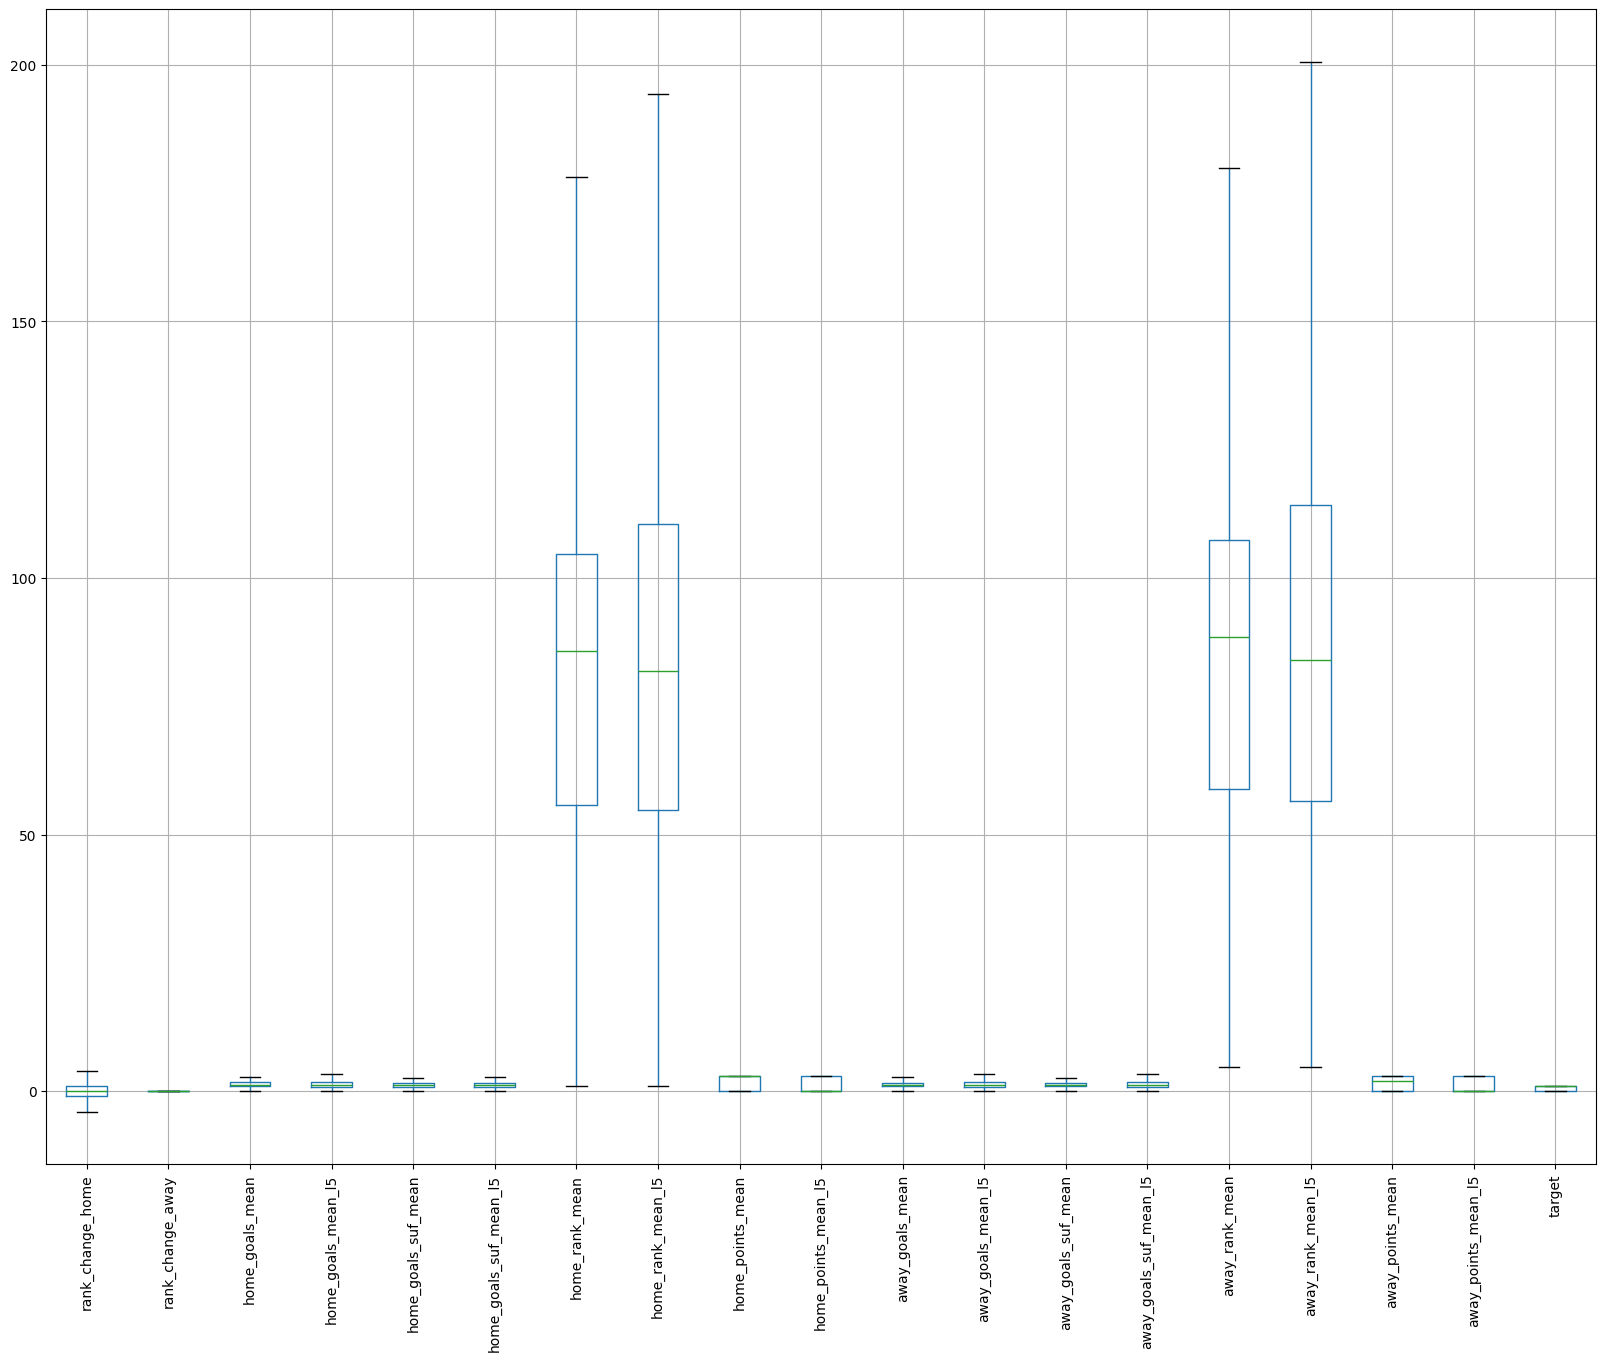

In [87]:
df.boxplot(figsize=(20, 15))
plt.xticks(rotation=90)
plt.show()

In [88]:
df.describe()

,rank_change_home,rank_change_away,home_goals_mean,home_goals_mean_l5,home_goals_suf_mean,home_goals_suf_mean_l5,home_rank_mean,home_rank_mean_l5,home_points_mean,home_points_mean_l5,away_goals_mean,away_goals_mean_l5,away_goals_suf_mean,away_goals_suf_mean_l5,away_rank_mean,away_rank_mean_l5,away_points_mean,away_points_mean_l5,target
count,3777.000000,3777.000000,3777.000000,3777.000000,3777.000000,3777.000000,3777.000000,3777.000000,3777.000000,3777.000000,3777.000000,3777.000000,3777.000000,3777.000000,3777.000000,3777.000000,3777.000000,3777.000000,3777.000000
mean,0.005295,0.029507,1.354202,1.338298,1.212139,1.245217,85.596544,84.741806,1.693381,1.322881,1.292600,1.285787,1.274168,1.305944,88.006398,87.008675,1.524326,1.252952,0.523167
std,1.800416,0.046186,0.569804,0.773747,0.532509,0.717318,35.803321,40.248029,1.474433,1.450090,0.554703,0.757668,0.539220,0.759003,36.090693,40.837314,1.484329,1.438358,0.499529
min,-4.000000,-0.063977,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.750000,4.750000,0.000000,0.000000,0.000000
25%,-1.000000,0.000000,1.000000,0.800000,0.857143,0.800000,55.818182,54.800000,0.000000,0.000000,0.923077,0.800000,0.911111,0.800000,58.964286,56.600000,0.000000,0.000000,0.000000
50%,0.000000,0.042651,1.285714,1.200000,1.125000,1.200000,85.842105,81.800000,3.000000,0.000000,1.212121,1.200000,1.183673,1.200000,88.583333,84.000000,2.000000,0.000000,1.000000
75%,1.000000,0.042651,1.704545,1.800000,1.500000,1.600000,104.707317,110.600000,3.000000,3.000000,1.625000,1.800000,1.575758,1.800000,107.333333,114.200000,3.000000,3.000000,1.000000
max,4.000000,0.106628,2.761364,3.300000,2.464286,2.800000,178.041020,194.300000,3.000000,3.000000,2.677885,3.300000,2.572727,3.300000,179.886905,200.600000,3.000000,3.000000,1.000000


3. Données catégorielles (OHE, ordinal, etc.)

In [89]:
df.select_dtypes(include=["object", "category"]).columns # Nous avons les colonnes date home_team away_team match_type comme valeurs categoriques

Index(['date', 'home_team', 'away_team', 'match_type'], dtype='object')

In [90]:
df['home_team'].nunique
# d apres la distribution, nous avons un nombre eleve de valeurs uniques pour ces deux caracteristiques, 

<bound method IndexOpsMixin.nunique of 0           Brazil
1          Comoros
2           Serbia
3          Senegal
4             Peru
           ...    
3772       Jamaica
3773      Colombia
3774    Mozambique
3775      Colombia
3776     Australia
Name: home_team, Length: 3777, dtype: object>

In [ ]:
#  encodage de frequence 
compte_home = df['home_team'].value_counts().to_dict()
compte_away = df['away_team'].value_counts().to_dict()
# le to_dict() permet de convertir les valeurs en dictionnaire pour eviter les erreurs de type
print(compte_home)
print(compte_away)
df['home_team'] = df['home_team'].map(compte_home)
df['away_team'] = df['away_team'].map(compte_away)

df

{'Mexico': 50, 'United States': 49, 'Qatar': 45, 'Bahrain': 44, 'Japan': 43, 'South Korea': 41, 'Argentina': 40, 'South Africa': 40, 'Brazil': 38, 'Morocco': 38, 'United Arab Emirates': 38, 'Saudi Arabia': 35, 'Iraq': 33, 'England': 32, 'France': 32, 'Vietnam': 32, 'Netherlands': 32, 'Poland': 31, 'Denmark': 31, 'Spain': 31, 'Hungary': 30, 'Algeria': 30, 'Malta': 30, 'Germany': 30, 'Indonesia': 30, 'Belgium': 29, 'Thailand': 29, 'Portugal': 29, 'Turkey': 29, 'Sweden': 28, 'Peru': 28, 'Costa Rica': 28, 'Italy': 28, 'Malaysia': 28, 'China PR': 28, 'Wales': 28, 'Croatia': 28, 'Egypt': 27, 'Oman': 27, 'Austria': 27, 'Republic of Ireland': 27, 'Georgia': 27, 'Guatemala': 26, 'Senegal': 26, 'North Macedonia': 26, 'Tunisia': 26, 'Switzerland': 26, 'Mauritania': 26, 'Kosovo': 25, 'Jordan': 25, 'Singapore': 25, 'Montenegro': 25, 'Romania': 25, 'Greece': 25, 'Iran': 25, 'Slovenia': 25, 'Luxembourg': 25, 'Uzbekistan': 25, 'Bosnia and Herzegovina': 25, 'Azerbaijan': 25, 'El Salvador': 24, 'Albania

,date,home_team,away_team,rank_change_home,rank_change_away,home_goals_mean,home_goals_mean_l5,home_goals_suf_mean,home_goals_suf_mean_l5,home_rank_mean,home_rank_mean_l5,home_points_mean,home_points_mean_l5,away_goals_mean,away_goals_mean_l5,away_goals_suf_mean,away_goals_suf_mean_l5,away_rank_mean,away_rank_mean_l5,away_points_mean,away_points_mean_l5,target,match_type
0,2021-09-09,38,29,-1.0,-0.063977,2.028571,0.8,0.371429,0.4,33.057143,25.4,3.0,3.0,1.027778,1.4,1.583333,1.6,24.388889,21.2,3.0,3.0,0,Friendly
1,2019-05-29,17,9,4.0,0.042651,1.166667,1.2,1.666667,1.8,76.833333,82.8,3.0,3.0,1.200000,1.2,1.200000,1.2,159.800000,159.8,0.0,0.0,0,Friendly
2,2020-11-18,19,18,-1.0,0.042651,1.608696,1.2,1.347826,1.2,54.130435,44.0,3.0,3.0,2.136364,0.8,1.045455,1.2,65.681818,62.0,3.0,0.0,0,Friendly
3,2021-09-01,26,10,-1.0,0.042651,1.482759,1.4,0.620690,0.8,97.551724,113.6,3.0,0.0,0.857143,0.8,1.214286,1.2,104.500000,82.0,0.0,0.0,0,Friendly
4,2024-03-22,28,20,-2.0,0.042651,0.968750,0.2,1.265625,1.6,31.531250,34.8,0.0,0.0,1.600000,3.0,1.244444,0.2,132.200000,169.4,0.0,3.0,0,Competition
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,2021-07-12,23,10,0.0,0.042651,2.000000,1.0,1.090909,2.0,103.909091,71.0,3.0,0.0,2.677885,3.3,1.320218,1.0,154.636364,153.6,3.0,3.0,0,Friendly
3773,2019-06-28,23,28,1.0,0.042651,1.909091,2.0,0.545455,0.0,33.000000,39.4,3.0,3.0,1.545455,1.8,1.272727,0.8,39.090909,44.2,0.0,0.0,1,Friendly
3774,2021-10-11,24,18,3.0,0.106628,1.000000,0.6,1.153846,1.6,113.538462,103.2,0.0,0.0,1.086957,1.2,0.478261,0.2,88.260870,86.2,0.0,0.0,1,Friendly
3775,2022-11-19,23,28,0.0,0.042651,1.319149,2.4,0.872340,0.6,31.957447,62.6,3.0,3.0,0.909091,0.8,1.272727,0.6,34.886364,31.2,0.0,3.0,0,Competition


In [92]:
pd.set_option('display.max_columns', None)
df.head()

,date,home_team,away_team,rank_change_home,rank_change_away,home_goals_mean,home_goals_mean_l5,home_goals_suf_mean,home_goals_suf_mean_l5,home_rank_mean,home_rank_mean_l5,home_points_mean,home_points_mean_l5,away_goals_mean,away_goals_mean_l5,away_goals_suf_mean,away_goals_suf_mean_l5,away_rank_mean,away_rank_mean_l5,away_points_mean,away_points_mean_l5,target,match_type
0,2021-09-09,38,29,-1.0,-0.063977,2.028571,0.8,0.371429,0.4,33.057143,25.4,3.0,3.0,1.027778,1.4,1.583333,1.6,24.388889,21.2,3.0,3.0,0,Friendly
1,2019-05-29,17,9,4.0,0.042651,1.166667,1.2,1.666667,1.8,76.833333,82.8,3.0,3.0,1.200000,1.2,1.200000,1.2,159.800000,159.8,0.0,0.0,0,Friendly
2,2020-11-18,19,18,-1.0,0.042651,1.608696,1.2,1.347826,1.2,54.130435,44.0,3.0,3.0,2.136364,0.8,1.045455,1.2,65.681818,62.0,3.0,0.0,0,Friendly
3,2021-09-01,26,10,-1.0,0.042651,1.482759,1.4,0.620690,0.8,97.551724,113.6,3.0,0.0,0.857143,0.8,1.214286,1.2,104.500000,82.0,0.0,0.0,0,Friendly
4,2024-03-22,28,20,-2.0,0.042651,0.968750,0.2,1.265625,1.6,31.531250,34.8,0.0,0.0,1.600000,3.0,1.244444,0.2,132.200000,169.4,0.0,3.0,0,Competition


In [93]:
# Encodage de la date 
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month  
df['day'] = df['date'].dt.day

# suppression de la colonne de format datetime apres encodage 
df = df.drop(columns=['date'])
df

df['match_type'].value_counts()
# match_type a 2 valeurs uniques, nous pouvons donc le transformer en colonnes binaires

# Nous transformons la colonne match_type en colonnes binaires

df = pd.get_dummies(df, columns=['match_type']) 


In [94]:

df

,home_team,away_team,rank_change_home,rank_change_away,home_goals_mean,home_goals_mean_l5,home_goals_suf_mean,home_goals_suf_mean_l5,home_rank_mean,home_rank_mean_l5,home_points_mean,home_points_mean_l5,away_goals_mean,away_goals_mean_l5,away_goals_suf_mean,away_goals_suf_mean_l5,away_rank_mean,away_rank_mean_l5,away_points_mean,away_points_mean_l5,target,year,month,day,match_type_Competition,match_type_Friendly
0,38,29,-1.0,-0.063977,2.028571,0.8,0.371429,0.4,33.057143,25.4,3.0,3.0,1.027778,1.4,1.583333,1.6,24.388889,21.2,3.0,3.0,0,2021,9,9,False,True
1,17,9,4.0,0.042651,1.166667,1.2,1.666667,1.8,76.833333,82.8,3.0,3.0,1.200000,1.2,1.200000,1.2,159.800000,159.8,0.0,0.0,0,2019,5,29,False,True
2,19,18,-1.0,0.042651,1.608696,1.2,1.347826,1.2,54.130435,44.0,3.0,3.0,2.136364,0.8,1.045455,1.2,65.681818,62.0,3.0,0.0,0,2020,11,18,False,True
3,26,10,-1.0,0.042651,1.482759,1.4,0.620690,0.8,97.551724,113.6,3.0,0.0,0.857143,0.8,1.214286,1.2,104.500000,82.0,0.0,0.0,0,2021,9,1,False,True
4,28,20,-2.0,0.042651,0.968750,0.2,1.265625,1.6,31.531250,34.8,0.0,0.0,1.600000,3.0,1.244444,0.2,132.200000,169.4,0.0,3.0,0,2024,3,22,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,23,10,0.0,0.042651,2.000000,1.0,1.090909,2.0,103.909091,71.0,3.0,0.0,2.677885,3.3,1.320218,1.0,154.636364,153.6,3.0,3.0,0,2021,7,12,False,True
3773,23,28,1.0,0.042651,1.909091,2.0,0.545455,0.0,33.000000,39.4,3.0,3.0,1.545455,1.8,1.272727,0.8,39.090909,44.2,0.0,0.0,1,2019,6,28,False,True
3774,24,18,3.0,0.106628,1.000000,0.6,1.153846,1.6,113.538462,103.2,0.0,0.0,1.086957,1.2,0.478261,0.2,88.260870,86.2,0.0,0.0,1,2021,10,11,False,True
3775,23,28,0.0,0.042651,1.319149,2.4,0.872340,0.6,31.957447,62.6,3.0,3.0,0.909091,0.8,1.272727,0.6,34.886364,31.2,0.0,3.0,0,2022,11,19,True,False


4. Séparation des données : Répartition entraînement/test

In [95]:
# separation de l'etiqutte et des caracteristiques
X = df.drop(columns=['target'])
y = df['target']

4.2 Séparer les données en données d'entrainement et de test

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42 ) # Le random_state permet d'Avoir le même résultat à chaque fois


print("Class distribution in full dataset:\n", y.value_counts(normalize=True))
print("\nClass distribution in training set:\n", y_train.value_counts(normalize=True))
print("\nClass distribution in test set:\n", y_test.value_counts(normalize=True))

Class distribution in full dataset:
 target
1    0.523167
0    0.476833
Name: proportion, dtype: float64

Class distribution in training set:
 target
1    0.522599
0    0.477401
Name: proportion, dtype: float64

Class distribution in test set:
 target
1    0.524868
0    0.475132
Name: proportion, dtype: float64


In [97]:
X_train.describe()

,home_team,away_team,rank_change_home,rank_change_away,home_goals_mean,home_goals_mean_l5,home_goals_suf_mean,home_goals_suf_mean_l5,home_rank_mean,home_rank_mean_l5,home_points_mean,home_points_mean_l5,away_goals_mean,away_goals_mean_l5,away_goals_suf_mean,away_goals_suf_mean_l5,away_rank_mean,away_rank_mean_l5,away_points_mean,away_points_mean_l5,year,month,day
count,2832.000000,2832.000000,2832.000000,2832.000000,2832.000000,2832.000000,2832.000000,2832.000000,2832.000000,2832.000000,2832.000000,2832.000000,2832.000000,2832.000000,2832.000000,2832.000000,2832.000000,2832.000000,2832.000000,2832.000000,2832.000000,2832.000000,2832.000000
mean,24.217161,22.040607,0.016243,0.033291,1.351731,1.332486,1.214803,1.254679,85.640314,84.448152,1.682673,1.310918,1.295513,1.286764,1.277508,1.306738,88.024950,86.937129,1.545989,1.253598,2021.180085,7.374294,15.038136
std,9.600966,6.124354,1.820373,0.040371,0.564308,0.760413,0.527953,0.717297,35.872154,40.496375,1.476302,1.450844,0.549870,0.755807,0.541380,0.760552,35.959523,40.891082,1.482464,1.439815,1.765496,3.266414,7.750523
min,2.000000,1.000000,-4.000000,-0.063977,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.750000,4.750000,0.000000,0.000000,2018.000000,1.000000,1.000000
25%,19.000000,18.000000,-1.000000,0.042651,1.000000,0.800000,0.864214,0.800000,55.737275,54.350000,0.000000,0.000000,0.930131,0.800000,0.916667,0.800000,58.862132,56.400000,0.000000,0.000000,2019.000000,6.000000,9.000000
50%,24.000000,23.000000,0.000000,0.042651,1.294118,1.200000,1.127466,1.200000,85.908462,81.400000,3.000000,0.000000,1.214286,1.200000,1.186343,1.200000,88.534976,84.100000,2.980000,0.000000,2021.000000,9.000000,14.000000
75%,29.000000,26.000000,1.000000,0.042651,1.700000,1.800000,1.500000,1.600000,104.316138,110.600000,3.000000,3.000000,1.625000,1.666667,1.576923,1.800000,107.503571,114.050000,3.000000,3.000000,2023.000000,10.000000,21.000000
max,50.000000,36.000000,4.000000,0.106628,2.761364,3.300000,2.464286,2.800000,178.041020,194.300000,3.000000,3.000000,2.677885,3.300000,2.572727,3.300000,179.886905,200.600000,3.000000,3.000000,2024.000000,12.000000,31.000000


In [98]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.set_output(transform='pandas')
X_train = scaler.fit_transform(X_train)
# Cela permet de centrer et reduire les donnees pour eviter les biais
X_test = scaler.transform(X_test)

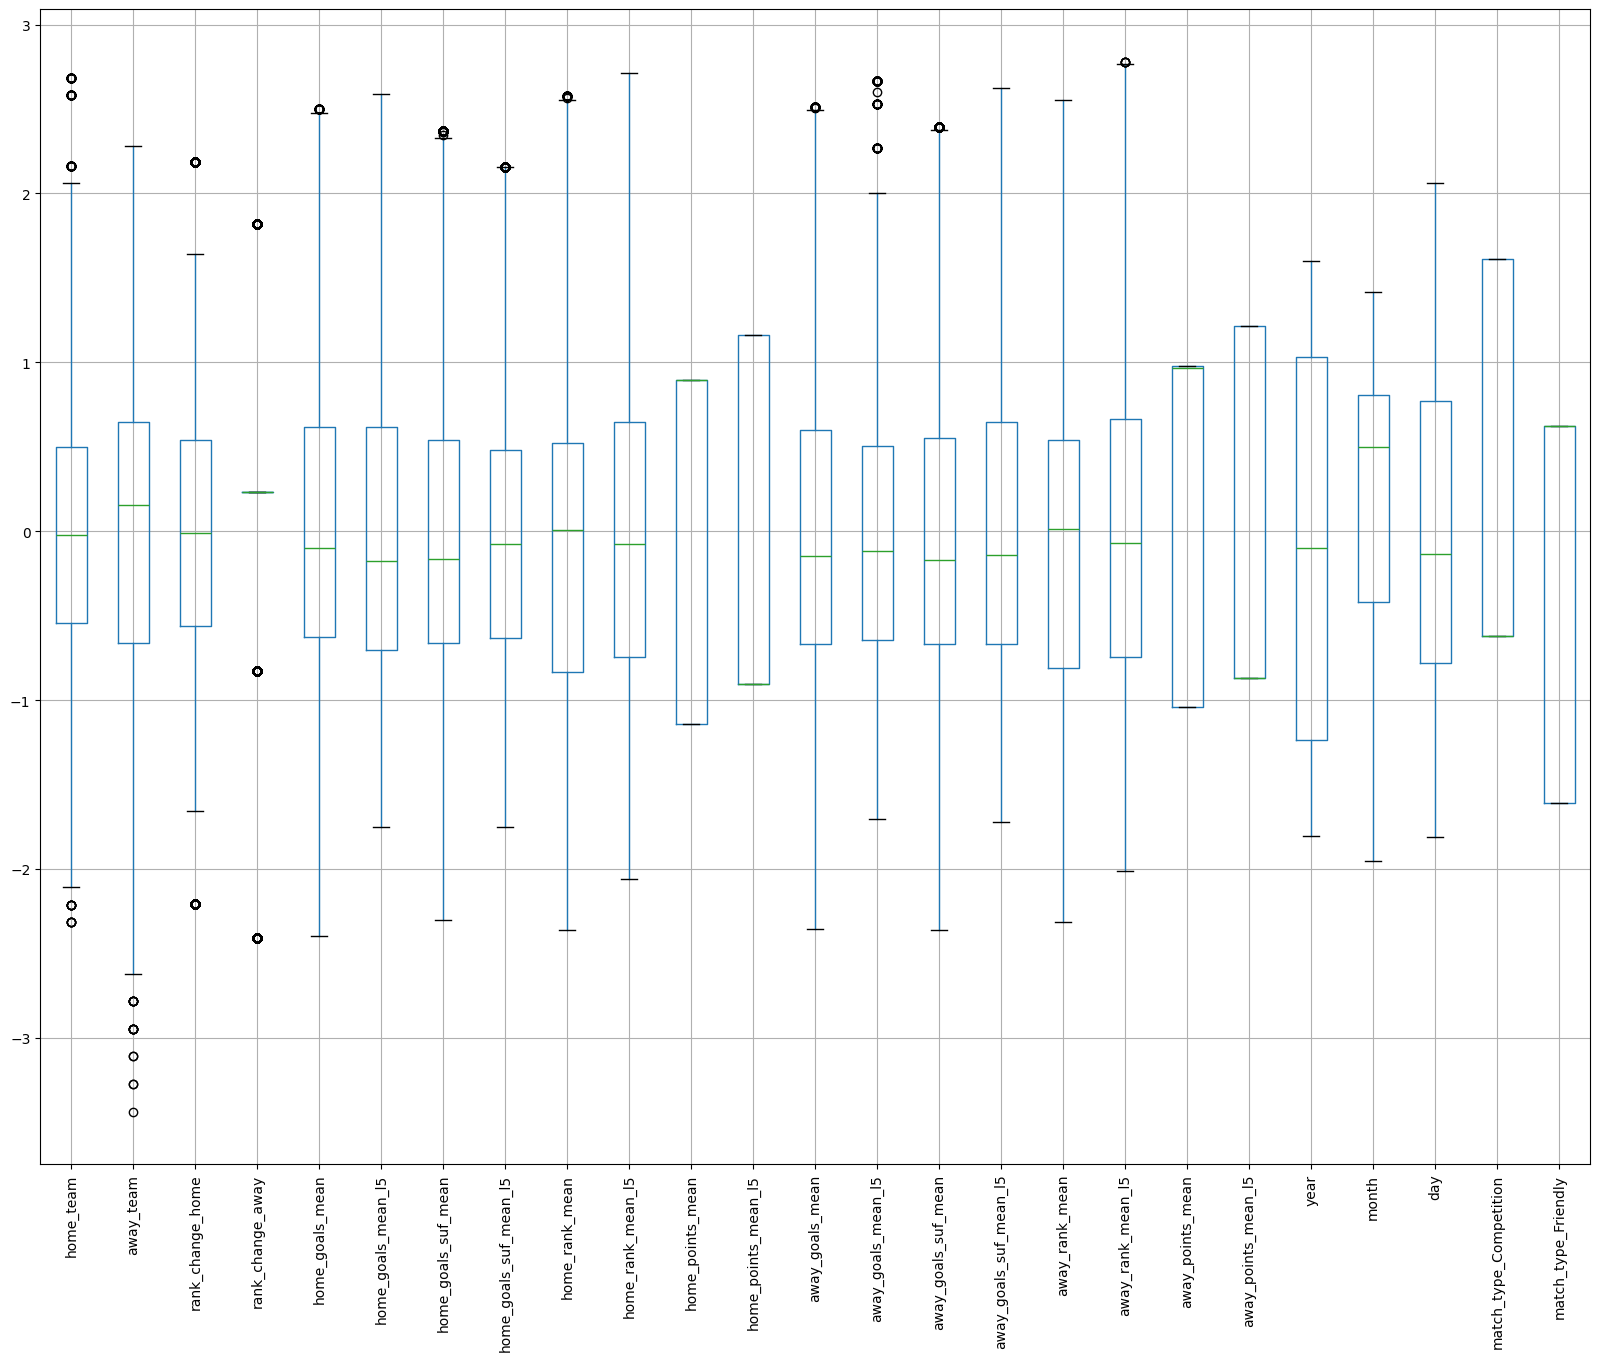

In [99]:
X_train.describe()
X_train.boxplot(figsize=(20, 15))
plt.xticks(rotation=90)
plt.show()

In [100]:
# # normalisation des donnees
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# scaler.set_output(transform='pandas')
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# 3.Développement des modèles et expérimentation

1. Modèle linéaire/régularisé

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


2. Different model 

In [102]:
model = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest ": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "KNN": KNeighborsClassifier()
}

for name, model in model.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} a une précision de {acc}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))    
    print("--" * 40)

Logistic Regression a une précision de 0.7333333333333333
[[323 126]
 [126 370]]
              precision    recall  f1-score   support

           0       0.72      0.72      0.72       449
           1       0.75      0.75      0.75       496

    accuracy                           0.73       945
   macro avg       0.73      0.73      0.73       945
weighted avg       0.73      0.73      0.73       945

--------------------------------------------------------------------------------
Random Forest  a une précision de 0.6751322751322751
[[301 148]
 [159 337]]
              precision    recall  f1-score   support

           0       0.65      0.67      0.66       449
           1       0.69      0.68      0.69       496

    accuracy                           0.68       945
   macro avg       0.67      0.67      0.67       945
weighted avg       0.68      0.68      0.68       945

--------------------------------------------------------------------------------
SVM a une précision de 0.71

In [103]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [5,10,25,50,80,100],         
    'weights': ['uniform', 'distance'],    
    'metric': ['euclidean', 'manhattan']
}

# Recherche des meilleurs parametres
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Meilleur modele
best_knn = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
# represente le score apres la cross validation (plus representatif de la performance reelle du modele )
print("Best Score:", grid_search.best_score_)
# prediction des donnees de test 
y_pred = best_knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))



Best Parameters: {'metric': 'manhattan', 'n_neighbors': 80, 'weights': 'uniform'}
Best Score: 0.6659611992945326
Accuracy: 0.7047619047619048


In [104]:
# logistic regression avec l1 et l2 
log_reg_l1 = LogisticRegression(random_state=42, C=0.1, penalty='l1', 
     solver = 'saga', max_iter=1000)
log_reg_l2 = LogisticRegression(random_state=42, C=0.1, penalty='l2', 
     solver = 'saga', max_iter=1000)
log_reg_l1.fit(X_train, y_train) 
log_reg_l2.fit(X_train, y_train)
y_pred_l1 = log_reg_l1.predict(X_test)
y_pred_l2 = log_reg_l2.predict(X_test)
print('l1:',accuracy_score(y_test, y_pred_l1))
print('l2:',accuracy_score(y_test, y_pred_l2))
# validation croisee 
from sklearn.model_selection import cross_val_score
scores_l1 = cross_val_score(log_reg_l1, X_train, y_train, cv=5)
scores_l2 = cross_val_score(log_reg_l2, X_train, y_train, cv=5)
print('score moyen apres validation croisee')
print('l1:',scores_l1.mean())
print('l2:',scores_l2.mean()) 
# Le meilleur modele est celui avec le meilleur score apres validation croisee pas celui avec le meilleur score sur les donnees de test

l1: 0.726984126984127
l2: 0.7312169312169312
score moyen apres validation croisee
l1: 0.7051539003246895
l2: 0.6984494674718468


In [105]:
# optimisation  logistic regression a l aide de  GridSearchCV
log_reg = LogisticRegression(random_state=42, max_iter=10000)
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1','l2'],
    'solver': ['liblinear', 'saga']  
}
#  Recherche des meilleurs parametres
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)   
# Meilleur modele
best_log_reg = grid_search.best_estimator_
print("Meilleur Parametres:", grid_search.best_params_)
print("Score:", grid_search.best_score_)
# prediction des donnees de test
y_pred = best_log_reg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Meilleur Parametres: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Score: 0.7051539003246895
Accuracy: 0.726984126984127


In [106]:
param_grid = { 'C': [0.01,0.1,0.5, 0.6,1],
    'penalty': ['elasticnet'],
    'l1_ratio': [0.01,0.5,0.1,0.9,1],
    'solver': ['saga']  
    }
# definir GridSearchCV pour trouver les meilleurs parametres
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
# trouver le meilleur modele et ses parametres
best_log_reg = grid_search.best_estimator_
print("Meilleur Parametres:", grid_search.best_params_)
print("Score:", grid_search.best_score_)


Meilleur Parametres: {'C': 0.1, 'l1_ratio': 1, 'penalty': 'elasticnet', 'solver': 'saga'}
Score: 0.7051539003246895


In [107]:
y_pred = best_log_reg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.726984126984127


In [108]:
# optimisation du modele random forest
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100],
    'max_depth': [10, 30],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2]
}
# recherche des meilleurs parametres
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
# Meilleur modele et ses parametres
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)
y_pred = best_rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best Score: 0.6984538299025932
Accuracy: 0.6984126984126984


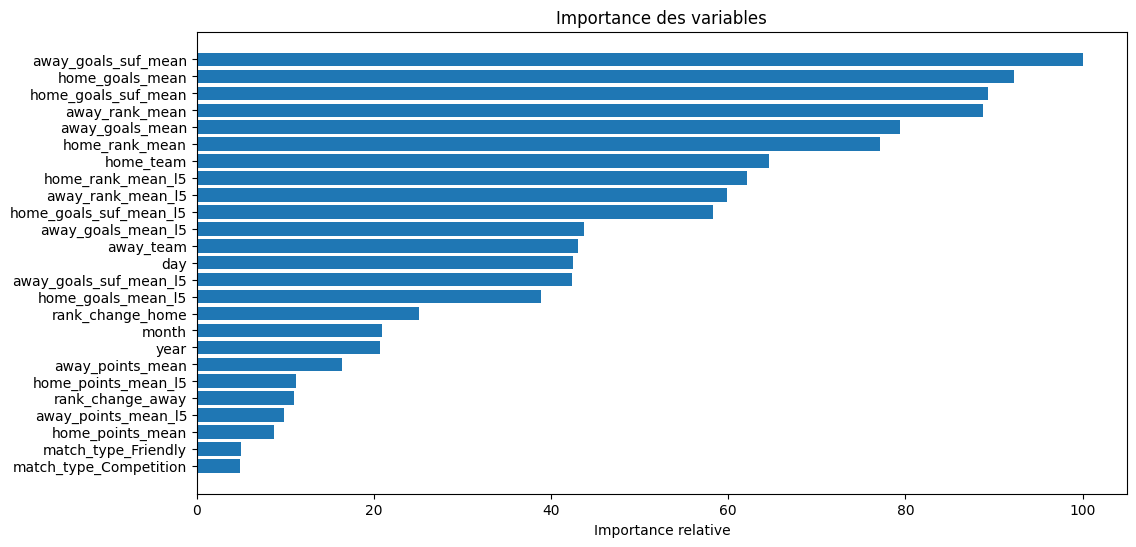

In [109]:
# importance des variables
feature_importance = best_rf.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(12, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Importance relative')
plt.title('Importance des variables')
plt.show()




Modele Final 

In [110]:
model = {
    "Logistic Regression": best_log_reg,
    "Random Forest ": best_rf,
    "SVM": SVC(random_state=42, C=0.1, kernel='linear'),
    "KNN": best_knn
}

for name, model in model.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} a une précision de {acc}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))    
    print("--" * 40)

Logistic Regression a une précision de 0.726984126984127
[[318 131]
 [127 369]]
              precision    recall  f1-score   support

           0       0.71      0.71      0.71       449
           1       0.74      0.74      0.74       496

    accuracy                           0.73       945
   macro avg       0.73      0.73      0.73       945
weighted avg       0.73      0.73      0.73       945

--------------------------------------------------------------------------------
Random Forest  a une précision de 0.6984126984126984
[[302 147]
 [138 358]]
              precision    recall  f1-score   support

           0       0.69      0.67      0.68       449
           1       0.71      0.72      0.72       496

    accuracy                           0.70       945
   macro avg       0.70      0.70      0.70       945
weighted avg       0.70      0.70      0.70       945

--------------------------------------------------------------------------------
SVM a une précision de 0.731

In [111]:
competition = pd.read_csv('competition.csv', index_col='id')

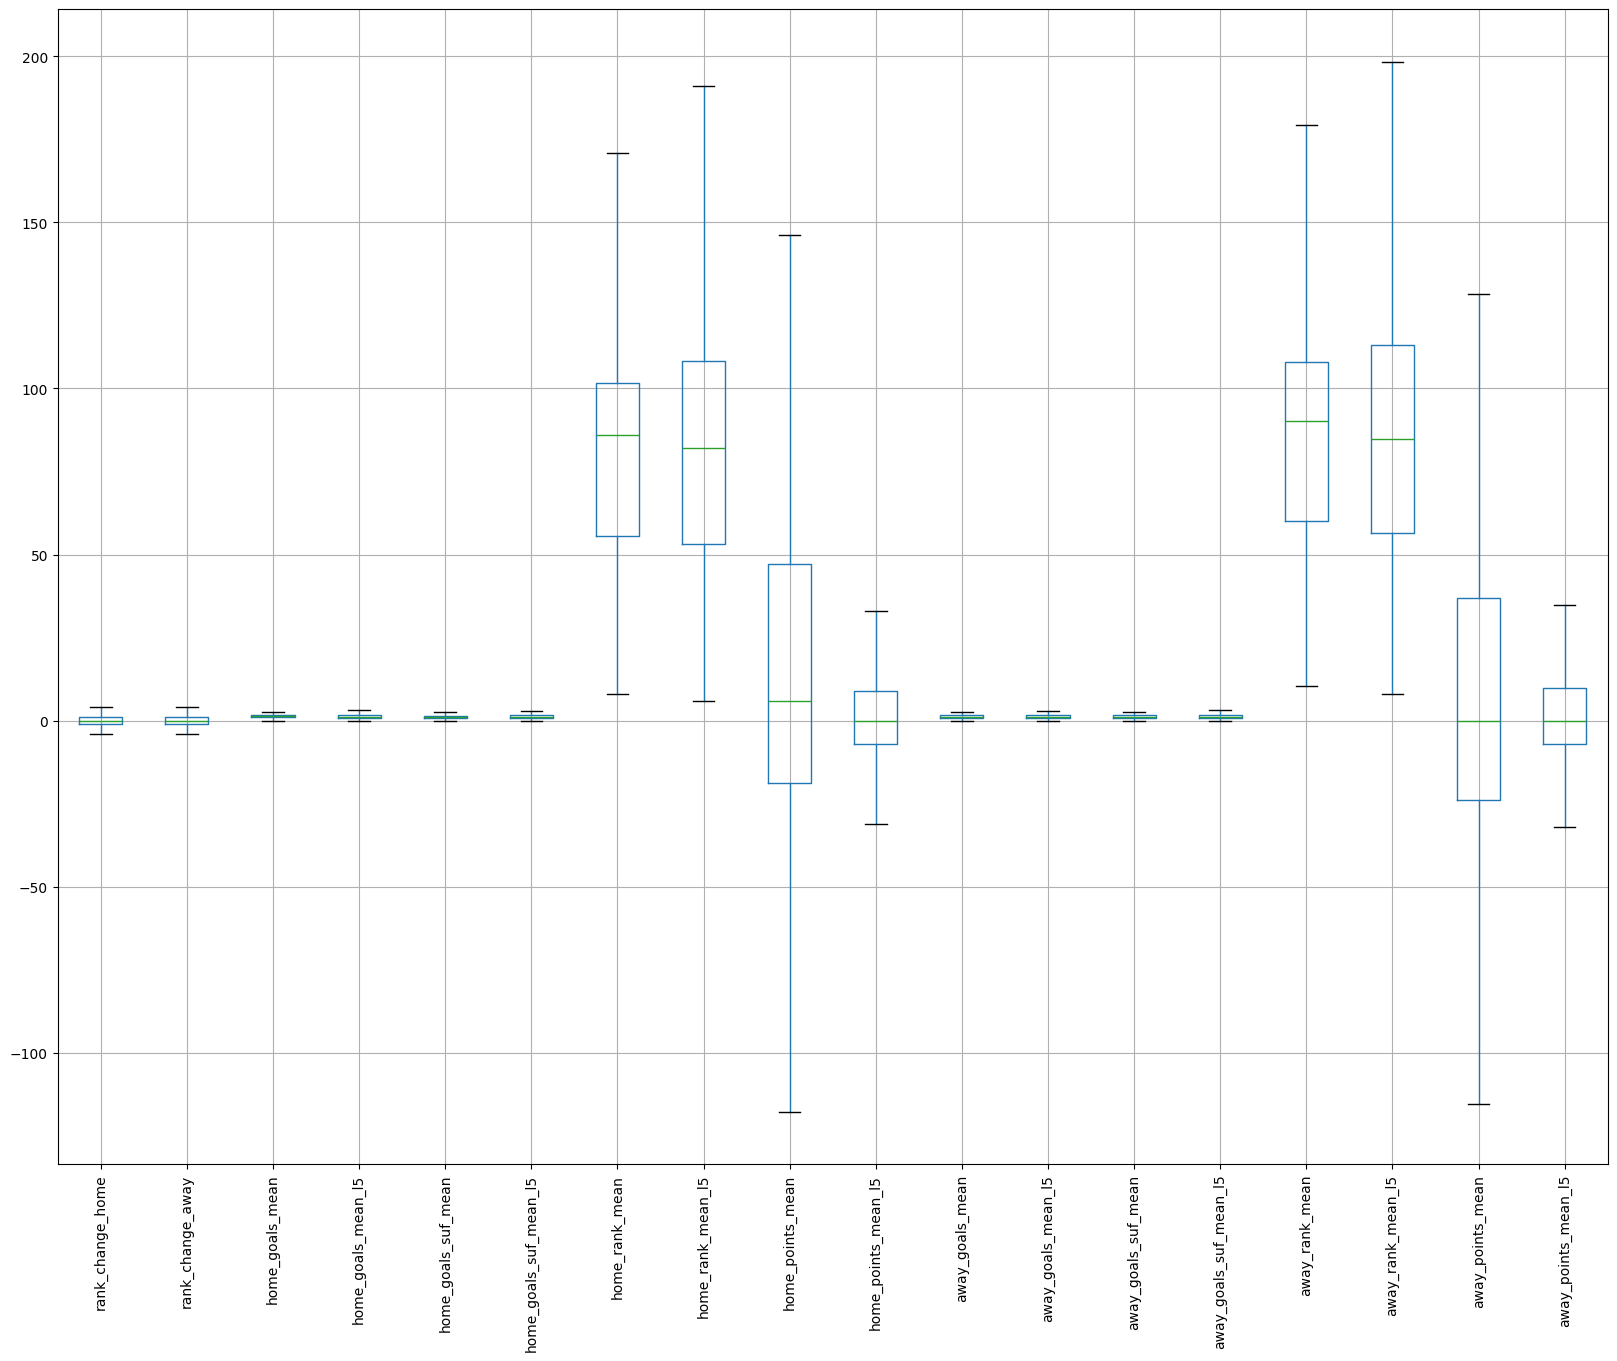

In [112]:
# observation  et gestion des valeurs aberrantes 
col_num  = competition.select_dtypes(include=['number']).columns.to_list()
col_num
for column  in col_num :
    IQR = competition[column].quantile(0.75) - competition[column].quantile(0.25)
    valeur_min = competition[column].quantile(0.25) - 1.5 * IQR
    valeur_max = competition[column].quantile(0.75) + 1.5 * IQR
    # plafonner les valeurs 
    competition[column] = competition[column].clip(valeur_min, valeur_max)
   
competition.boxplot(figsize=(20, 15))
plt.xticks(rotation=90)
plt.show()

In [113]:
#  encodage de frequence 
compte_home = competition['home_team'].value_counts().to_dict()
compte_away = competition['away_team'].value_counts().to_dict()
print(compte_home)
print(compte_away)
competition['home_team'] = competition['home_team'].map(compte_home)
competition['away_team'] = competition['away_team'].map(compte_away)

competition

{'Slovakia': 14, 'United States': 14, 'Senegal': 12, 'Kuwait': 12, 'Iraq': 11, 'Qatar': 11, 'Tunisia': 11, 'Jordan': 11, 'United Arab Emirates': 10, 'Finland': 10, 'Saudi Arabia': 10, 'Egypt': 10, 'Iran': 10, 'Japan': 10, 'Bolivia': 10, 'Germany': 10, 'Scotland': 10, 'South Korea': 9, 'Serbia': 9, 'England': 9, 'Sweden': 9, 'Chile': 9, 'Norway': 9, 'Italy': 9, 'Niger': 9, 'El Salvador': 9, 'Latvia': 8, 'Nigeria': 8, 'Morocco': 8, 'Moldova': 8, 'Mali': 8, 'Portugal': 8, 'Sudan': 8, 'San Marino': 8, 'Belarus': 8, 'Panama': 7, 'Colombia': 7, 'Switzerland': 7, 'Oman': 7, 'Zambia': 7, 'Togo': 7, 'France': 7, 'Ecuador': 7, 'Malaysia': 7, 'Kazakhstan': 7, 'Slovenia': 7, 'Uzbekistan': 7, 'Lithuania': 7, 'Ghana': 7, 'Croatia': 7, 'Andorra': 7, 'Kosovo': 7, 'Mexico': 7, 'Montenegro': 7, 'Spain': 7, 'Albania': 7, 'Algeria': 7, 'Cameroon': 7, 'Iceland': 6, 'Eswatini': 6, 'Netherlands': 6, 'Palestine': 6, 'Libya': 6, 'Grenada': 6, 'Israel': 6, 'Romania': 6, 'Denmark': 6, 'India': 6, 'Thailand': 6, 

,date,home_team,away_team,rank_change_home,rank_change_away,home_goals_mean,home_goals_mean_l5,home_goals_suf_mean,home_goals_suf_mean_l5,home_rank_mean,home_rank_mean_l5,home_points_mean,home_points_mean_l5,away_goals_mean,away_goals_mean_l5,away_goals_suf_mean,away_goals_suf_mean_l5,away_rank_mean,away_rank_mean_l5,away_points_mean,away_points_mean_l5,match_type
id,,,,,,,,,,,,,,,,,,,,,,
3233,2022-09-27,9,6,0.0,0.0,1.761905,1.400000,0.880952,1.000000,63.547619,38.6,82.57,25.07,1.800000,2.200000,1.111111,1.0,54.533333,42.0,90.530,2.00,Friendly
2432,2021-11-13,5,7,4.0,-4.0,0.709677,0.600000,1.096774,1.400000,103.483871,83.4,13.50,-8.89,1.083333,1.400000,0.458333,0.2,89.416667,82.8,-11.540,-0.41,Friendly
245,2018-11-18,8,9,4.0,-2.0,0.025000,0.000000,2.526786,2.800000,117.800000,117.8,-14.00,-14.00,1.600000,1.600000,0.000000,0.0,143.400000,143.4,1.000,1.00,Friendly
465,2019-03-24,9,5,3.0,0.0,1.500000,1.400000,1.333333,1.400000,133.500000,119.4,-5.00,-5.00,2.600000,2.600000,1.200000,1.2,148.600000,148.6,1.000,1.00,Friendly
2419,2021-11-12,5,7,3.0,0.0,1.421053,1.200000,1.052632,1.400000,53.631579,85.8,2.82,-30.30,1.806452,2.600000,1.612903,2.2,60.870968,74.6,54.330,22.11,Friendly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3007,2022-06-11,7,4,-2.0,-1.0,1.575758,2.000000,1.090909,1.200000,90.696970,128.4,39.55,4.28,1.000000,1.400000,1.826087,1.8,146.739130,177.4,-22.500,-5.42,Friendly
108,2018-10-14,6,8,0.0,-1.0,1.333333,1.333333,1.666667,1.666667,19.000000,19.0,-1.00,-1.00,0.666667,0.666667,1.000000,1.0,18.000000,18.0,-6.000,-6.00,Friendly
4398,2024-03-21,6,11,0.0,2.0,1.711538,1.000000,1.615385,0.800000,68.461538,84.8,80.34,12.53,1.144928,1.800000,1.623188,1.2,64.898551,87.8,-115.515,-13.54,Friendly


In [114]:
# Encodage de la date 
# Conversion de la colonne 'date' au format datetime
competition['date'] = pd.to_datetime(competition['date'])

# Extraction des informations d'année, de mois et de jour
competition['year'] = competition['date'].dt.year
competition['month'] = competition['date'].dt.month  
competition['day'] = competition['date'].dt.day

# Suppression de la colonne 'date' après encodage
competition = competition.drop(columns=['date'])

# Comptage des valeurs uniques dans 'match_type'
print(competition['match_type'].value_counts())
# Si 'match_type' a deux valeurs uniques, nous le transformons en colonnes binaires
competition = pd.get_dummies(competition, columns=['match_type'])


match_type
Friendly       692
Competition    253
Name: count, dtype: int64


In [115]:
competition['away_points_mean'] = competition['away_points_mean'].clip(0, 3)
competition['away_points_mean_l5'] = competition['away_points_mean_l5'].clip(0, 3)
competition['home_points_mean_l5'] = competition['home_points_mean_l5'].clip(0, 3)
competition['home_points_mean'] = competition['home_points_mean'].clip(0, 3)

In [116]:
scaler = StandardScaler()
scaler.set_output(transform="pandas")

competition = scaler.fit_transform(competition)

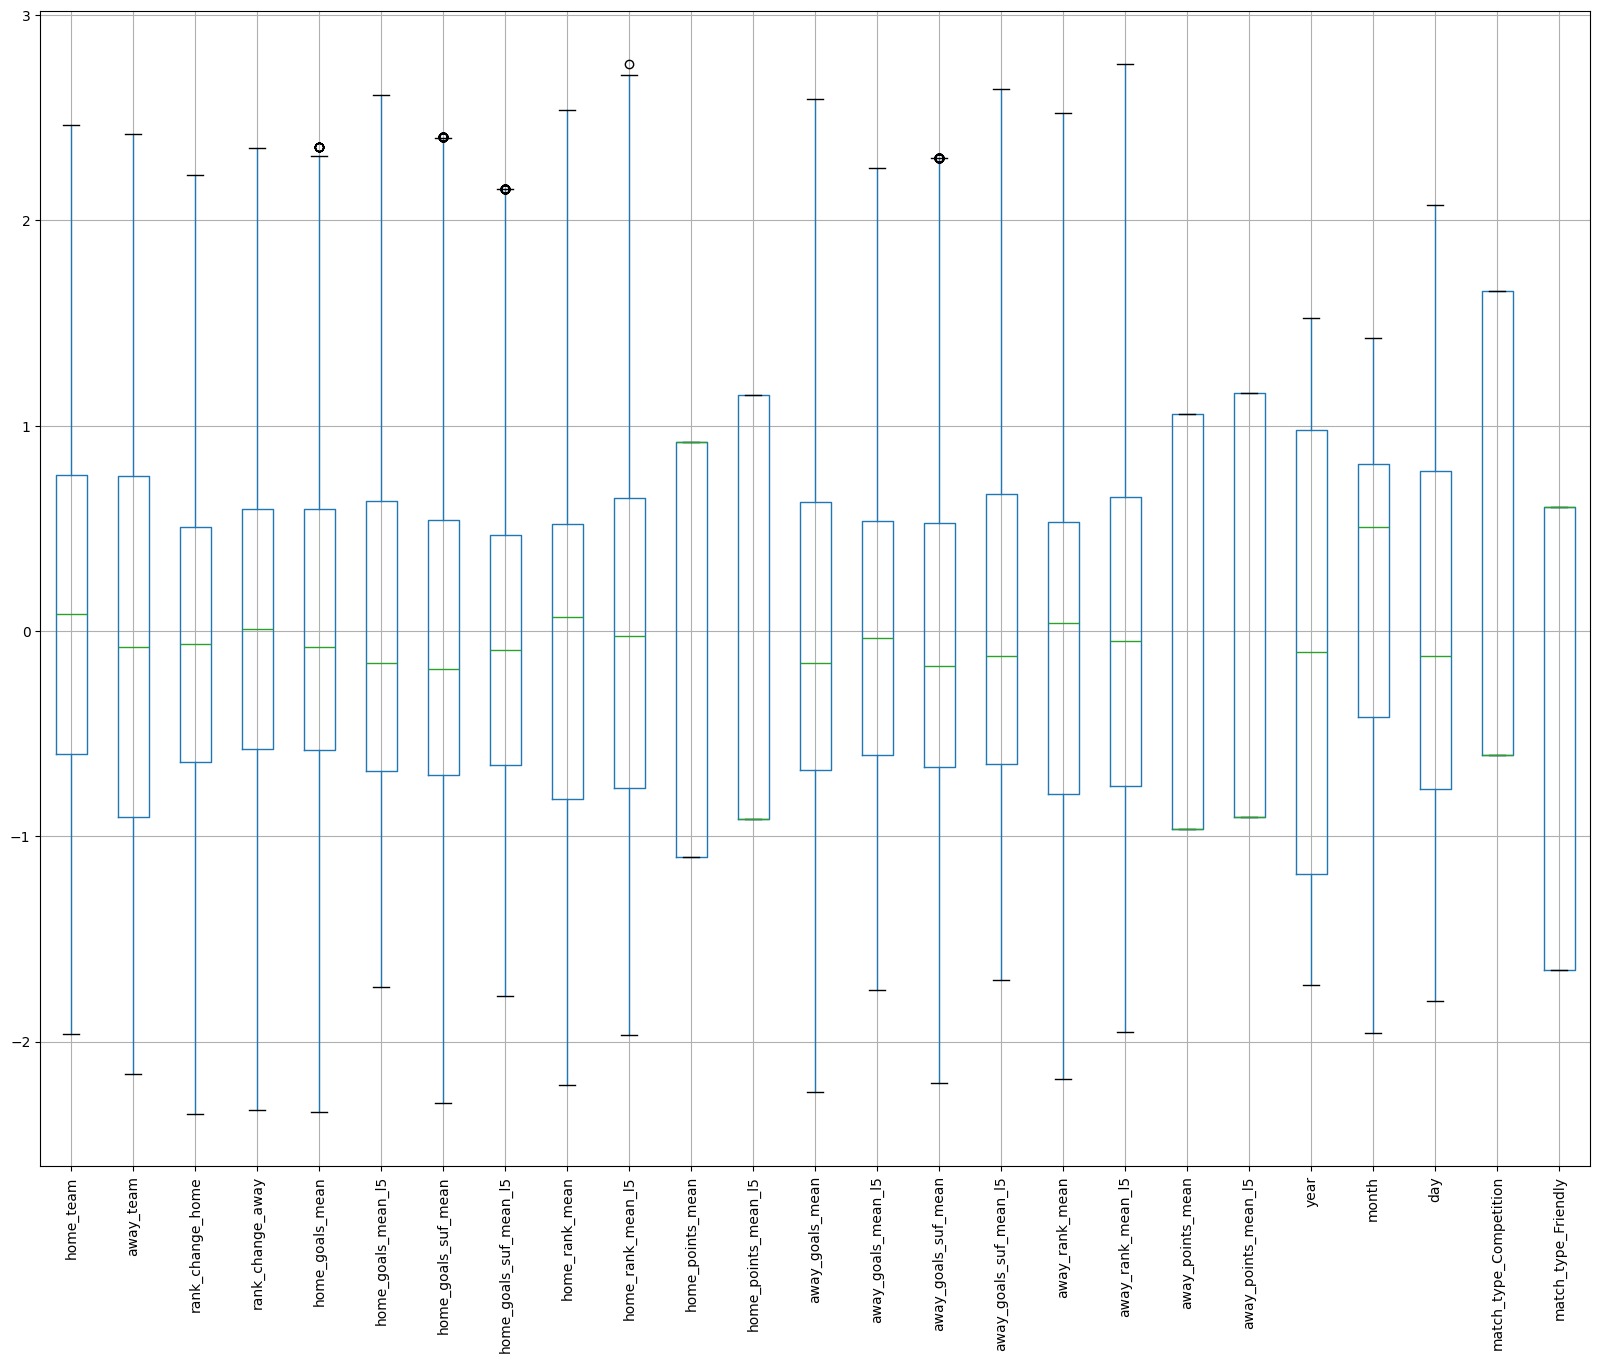

In [117]:
competition.boxplot(figsize=(20, 15))
plt.xticks(rotation=90)
plt.show()

In [118]:
# prediction de competition 
y_pred = best_log_reg.predict(competition)
y_pred  = pd.DataFrame(y_pred, columns=['target'])
y_pred_df = y_pred.set_index(competition.index)
y_pred_df.to_csv('predictions.csv' )
y_pred_df

,target
id,
3233,1
2432,1
245,1
465,1
2419,1
...,...
3007,0
108,1
4398,1


# Discussion Finale

## 1. Exploration des Données
L'analyse exploratoire a permis d'identifier les tendances générales et les valeurs aberrantes dans les données. Nous avons utilisé des visualisations et des statistiques descriptives pour mieux comprendre la distribution des variables. Certaines variables ont montré des corrélations significatives avec la variable cible, influençant ainsi le choix des modèles.

### Actions réalisées :
- Détection des valeurs aberrantes via les boxplots et la matrice de corrélation.
- Identification et gestion des valeurs manquantes.
- Analyse des corrélations pour sélectionner les variables pertinentes.

## 2. Prétraitement des Données
Plusieurs techniques ont été testées pour améliorer la qualité des données avant l'entraînement des modèles.

### Techniques appliquées :
- **Gestion des valeurs manquantes** : Suppression ou imputation des données absentes.
- **Traitement des valeurs aberrantes** : Détection et imputation via la methode de plafonnement par les percentiles .
- **Normalisation/Standardisation** : Application sur les variables numériques pour améliorer la convergence des modèles.
- **Encodage des variables catégorielles** : Utilisation de l'encodage par fréquence et du one-hot encoding.
- **Transformation des variables temporelles** : Conversion en caractéristiques exploitables (année, mois, jour).
- **Séparation des ensembles de données** : Division en ensembles d'entraînement et de test avec un `random_state` pour la reproductibilité.
- **Vérification de l'équilibre des classes** : Assurer une répartition homogène des classes cibles pour éviter les biais.

Certaines techniques ont mieux fonctionné que d'autres. Par exemple, la standardisation a amélioré les performances des modèles basés sur les distances.

## 3. Modèles Testés
Plusieurs modèles d’apprentissage supervisé ont été entraînés et évalués.

### Modèles explorés :
- **Régression Logistique**
- **Random Forest**
- **SVM (Support Vector Machine)**
- **KNN (K-Nearest Neighbors)**

Chaque modèle a été testé avec différents hyperparamètres pour identifier la meilleure configuration. Certains modèles ont mieux performé en raison de leur capacité à capturer des relations complexes dans les données.

## 4. Performance des Modèles
L’évaluation des modèles a été réalisée à l’aide des métriques suivantes :
- **Précision** (Accuracy)
- **Rappel** (Recall)
- **F1-score**
- **Matrice de confusion**

Certains modèles étaient plus sensibles aux déséquilibres dans les données, ce qui a influencé leurs performances globales.

### Comparaison des modèles :
- **Meilleurs modèles :** Les modèle de régression logistique et svm montrent des performances remarquables, avec une excellente capacité de généralisation aux données. Les problèmes de surapprentissage et les biais y sont efficacement traités. La performance peut s'expliquer à la fois par la simplicité d'optimisation du modèle de regression logistique  et par son adaptabilité à différents ensembles de données.

D'autres modèles, tels que le SVM, auraient pu obtenir de bien meilleures performances sur ces données. Cependant, ils nécessitent davantage de temps et d'expertise pour optimiser correctement leurs résultats.

## 5. Conclusions et Améliorations Futures
Les scores equivalents de tous nos modeles d'un pretraitement execute de maniere optimale.
On observe, en moyenne, un score plus élevé sur les données de test que lors de la validation croisée, ce qui témoigne d'une certaine efficacité dans l'entraînement des modèles. Toutefois, malgré des performances globalement satisfaisantes, certaines limites ont été mises en lumière :

-Un temps d'entraînement relativement long pour les modèles les plus complexes, ce qui peut constituer un frein dans des contextes nécessitant une rapidité d'exécution.

-Une difficulté d'interprétation notable pour les modèles non linéaires, limitant parfois leur utilisation dans des domaines où la transparence est cruciale

### Axes d'amélioration :
Optimisation des hyperparamètres : Affiner les performances des modèles en explorant des techniques avancées comme la recherche bayésienne ou l'optimisation par grille.

Gestion des valeurs manquantes et aberrantes : Appliquer des méthodes plus précises telles que l’imputation multiple ou l’utilisation de modèles robustes pour limiter leur impact sur les performances.

Feature engineering : Identifier et créer des variables explicatives pertinentes pour maximiser la capacité prédictive des modèles.

Augmentation des données : Recourir à des techniques de data augmentation, telles que la génération synthétique de données ou les transformations, pour enrichir les jeux de données disponibles.

Exploration de modèles avancés : Tester des modèles plus sophistiqués comme les réseaux neuronaux profonds (deep learning) pour exploiter pleinement la richesse des données complexes.

En mettant en œuvre ces améliorations, nous ambitionnons de renforcer à la fois la précision et la robustesse des modèles, tout en améliorant leu

